# Advanced regression assignment

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Steps to ge followed
1. Read data and understand.
2. Univariate and bivariate analysis
3. Pre processing of data
4. Model building and selection

In [3]:
# Read data and understand

data = pd.read_csv('./train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
data.shape

(1460, 81)

In [5]:
# check for missing values
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### We see some columns have missing values. Count isn't clearly telling how much is missing. Tyying to calculate percentage of missing values

In [6]:
def calculate_missing_value_percentage():
    return (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)

In [7]:
percent_missing = calculate_missing_value_percentage()
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

### We can remove PoolQC, MiscFeature, Alley, Fence and Fireplace as they have high percentage of missing values

In [8]:
# Removing 5 columns
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
data.shape

(1460, 76)

In [9]:
# check percentage missing now
percent_missing = calculate_missing_value_percentage()
percent_missing.head(15)

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
PavedDrive       0.000000
dtype: float64

In [10]:
percent_missing[percent_missing > 0]

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [11]:
# columns to treat 

missing_values_columns = list(percent_missing.index.values)
missing_values_columns

['LotFrontage',
 'GarageType',
 'GarageCond',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'PavedDrive',
 'WoodDeckSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'SaleCondition',
 'BedroomAbvGr',
 'SaleType',
 'YrSold',
 'MoSold',
 'MiscVal',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'PoolArea',
 'ScreenPorch',
 'Functional',
 'Fireplaces',
 '2ndFlrSF',
 '3SsnPorch',
 'EnclosedPorch',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'Id',
 'Heating',
 '1stFlrSF',
 'OverallCond',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'CentralAir',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 '

In [12]:
# check numeric and non numeric in these columns
data[missing_values_columns].dtypes

LotFrontage      float64
GarageType        object
GarageCond        object
GarageYrBlt      float64
GarageFinish      object
GarageQual        object
BsmtFinType2      object
BsmtExposure      object
BsmtFinType1      object
BsmtCond          object
BsmtQual          object
MasVnrArea       float64
MasVnrType        object
Electrical        object
PavedDrive        object
WoodDeckSF         int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
SaleCondition     object
BedroomAbvGr       int64
SaleType          object
YrSold             int64
MoSold             int64
MiscVal            int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
PoolArea           int64
ScreenPorch        int64
Functional        object
Fireplaces         int64
2ndFlrSF           int64
3SsnPorch          int64
EnclosedPorch      int64
GarageCars         int64
GarageArea         int64


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

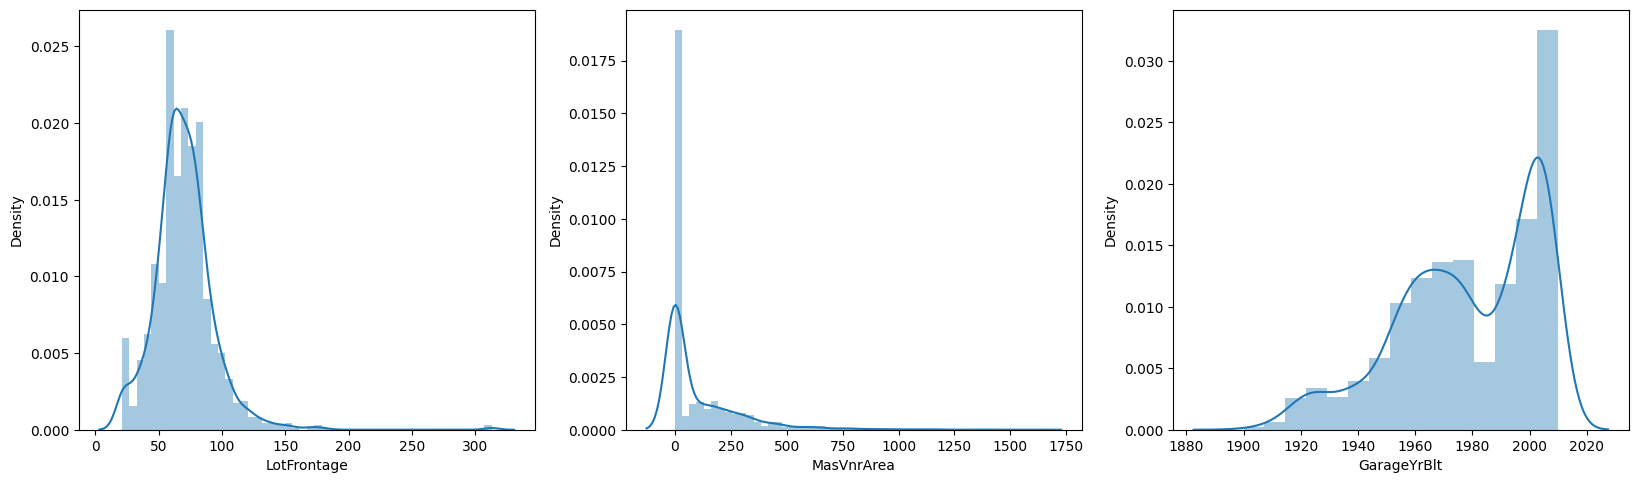

In [13]:
#  plot dataplots for 3 numerical columns for missing value treatment
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])

### Replacing missing values of LotFrontage and MasVnrArea with their corresponding meedian values

In [14]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)

In [15]:
# calculate missong value percentage
percent_missing = calculate_missing_value_percentage()
percent_missing.head(15)

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrType      0.547945
Electrical      0.068493
FullBath        0.000000
TotRmsAbvGrd    0.000000
BsmtHalfBath    0.000000
dtype: float64

In [16]:
missing_values_columns = list(percent_missing.index.values)
missing_values_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'BsmtCond',
 'MasVnrType',
 'Electrical',
 'FullBath',
 'TotRmsAbvGrd',
 'BsmtHalfBath',
 'HalfBath',
 'BsmtFullBath',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'LowQualFinSF',
 '2ndFlrSF',
 'KitchenQual',
 'Id',
 'Functional',
 'ScreenPorch',
 'SaleCondition',
 'SaleType',
 'YrSold',
 'MoSold',
 'MiscVal',
 'PoolArea',
 '3SsnPorch',
 'Fireplaces',
 'EnclosedPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'PavedDrive',
 'GarageArea',
 'GarageCars',
 '1stFlrSF',
 'Heating',
 'CentralAir',
 'LotConfig',
 'HouseStyle',
 'BldgType',
 'Condition2',
 'Condition1',
 'Neighborhood',
 'LandSlope',
 'Utilities',
 'HeatingQC',
 'LandContour',
 'LotShape',
 'Street',
 'LotArea',
 'LotFrontage',
 'MSZoning',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 '

In [17]:
# identify columns dealing with garage and replace null with NA
garage_columns = [ name for name in missing_values_columns if 'Garage' in name ]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageArea',
 'GarageCars']

In [18]:
for column in garage_columns:
    data[column] = data[column].replace(np.nan, 'NA')

percent_missing = calculate_missing_value_percentage()
percent_missing.head(15)

BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrType      0.547945
Electrical      0.068493
BsmtHalfBath    0.000000
FullBath        0.000000
BsmtFullBath    0.000000
Fireplaces      0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
dtype: float64

In [19]:
percent_missing[percent_missing > 0]

BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

### Repeat garage type treatement for Bsmt columns

In [20]:
missing_values_columns = list(percent_missing[percent_missing > 0].index.values)

basement_columns = [ name for name in missing_values_columns if 'Bsmt' in name ]
basement_columns

['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

In [21]:
for column in basement_columns:
    data[column] = data[column].replace(np.nan, 'NA')

percent_missing = calculate_missing_value_percentage()
percent_missing[percent_missing>0].head(15)

MasVnrType    0.547945
Electrical    0.068493
dtype: float64

<AxesSubplot:xlabel='Electrical', ylabel='count'>

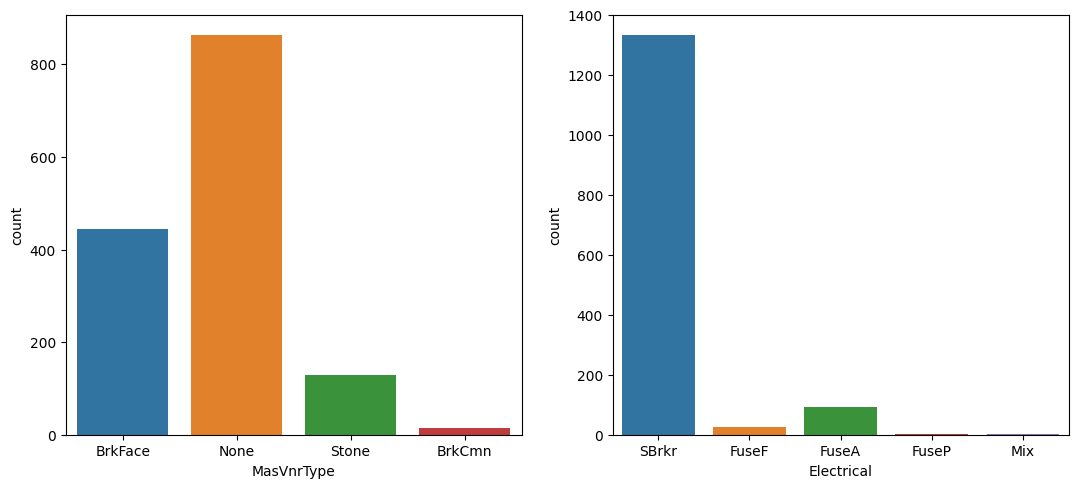

In [22]:
# plotting count plots to check whats median value
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'MasVnrType', data = data)

plt.subplot(2,3,2)
sns.countplot(x = 'Electrical',  data = data)

### Replace with max values



In [23]:
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None')
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr')
percent_missing = calculate_missing_value_percentage()
percent_missing[percent_missing>0]

Series([], dtype: float64)

## All missing values are successfully treated

In [24]:
# splitting dataframe into numeric and categorical column
## Extract numerical columns
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [25]:
## Extract categorical columns
categorical_columns = list(data.select_dtypes(include='object').columns)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Run distplot and box plot on all numeric columns

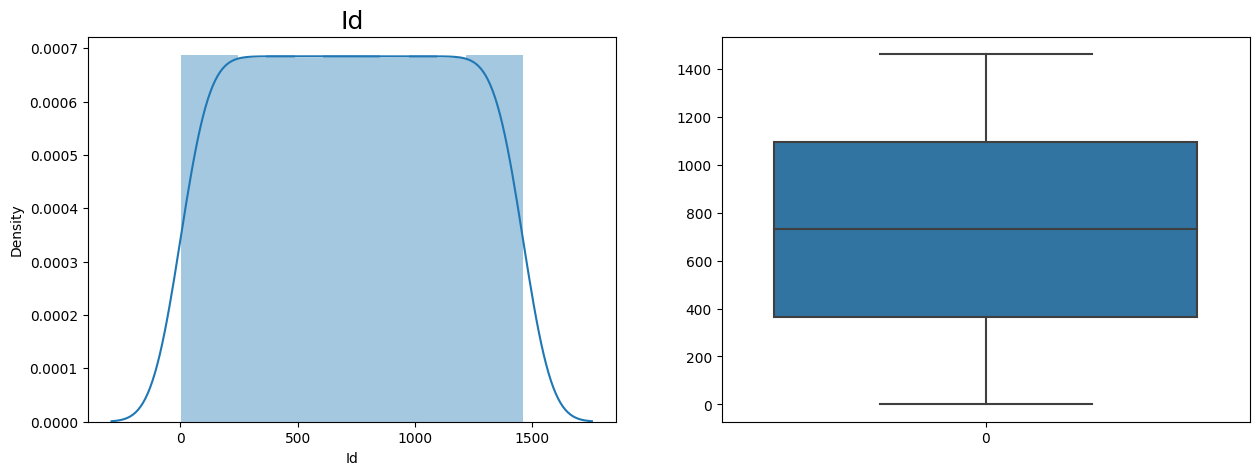

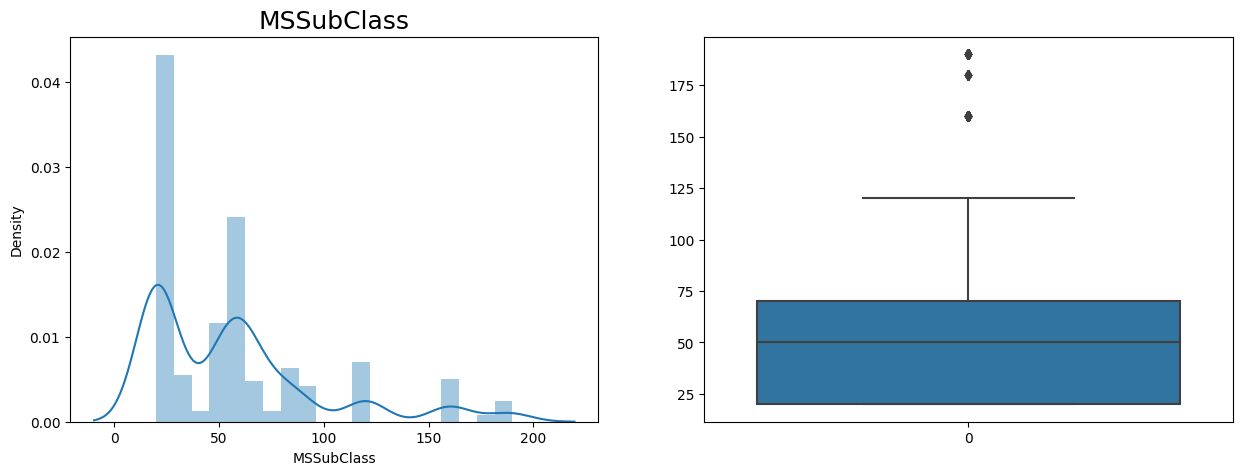

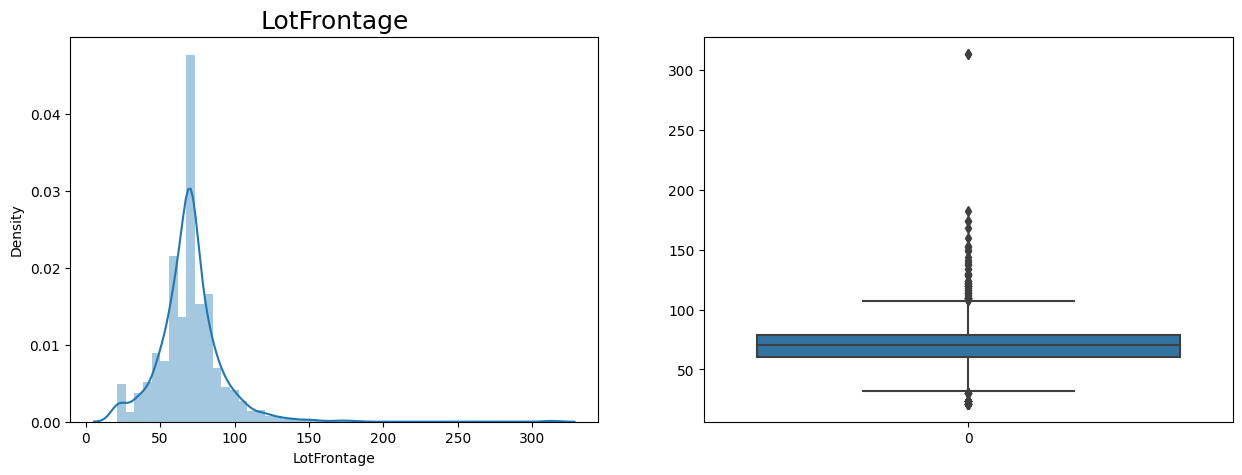

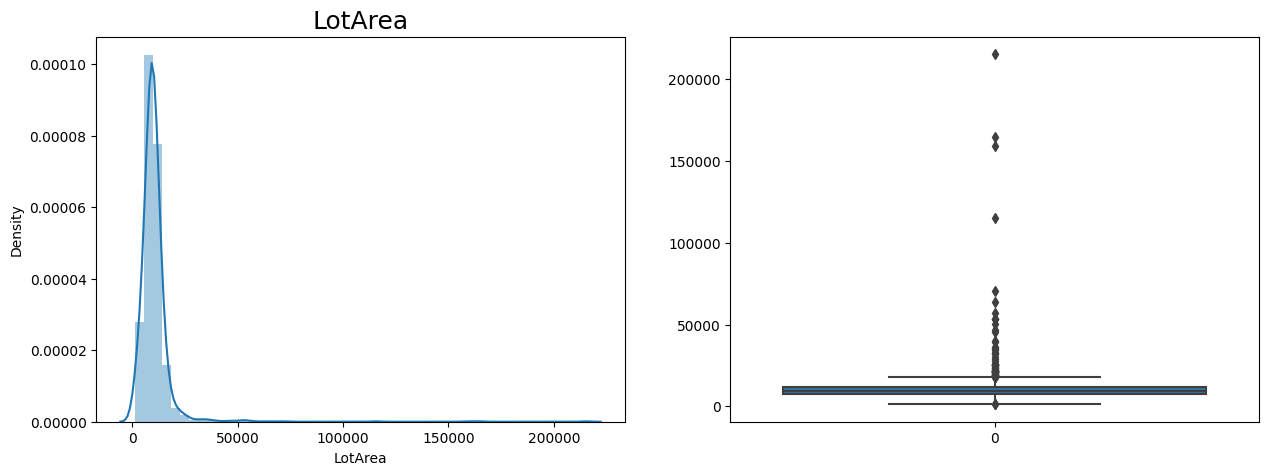

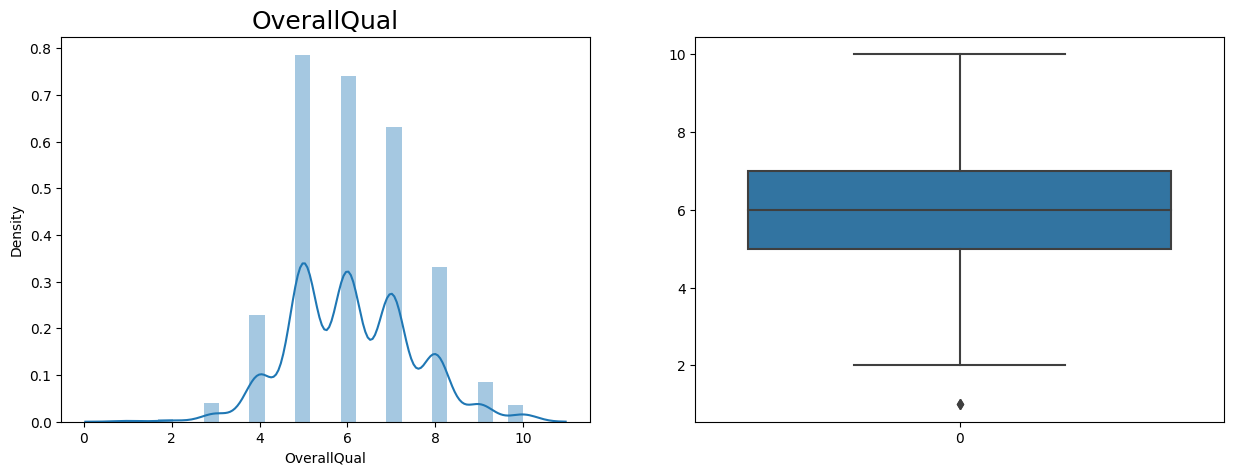

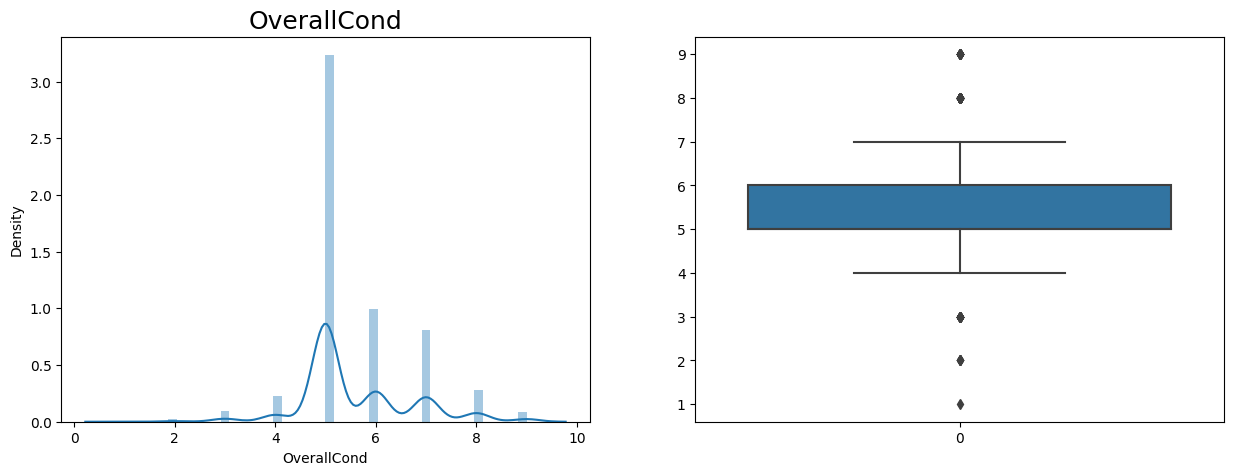

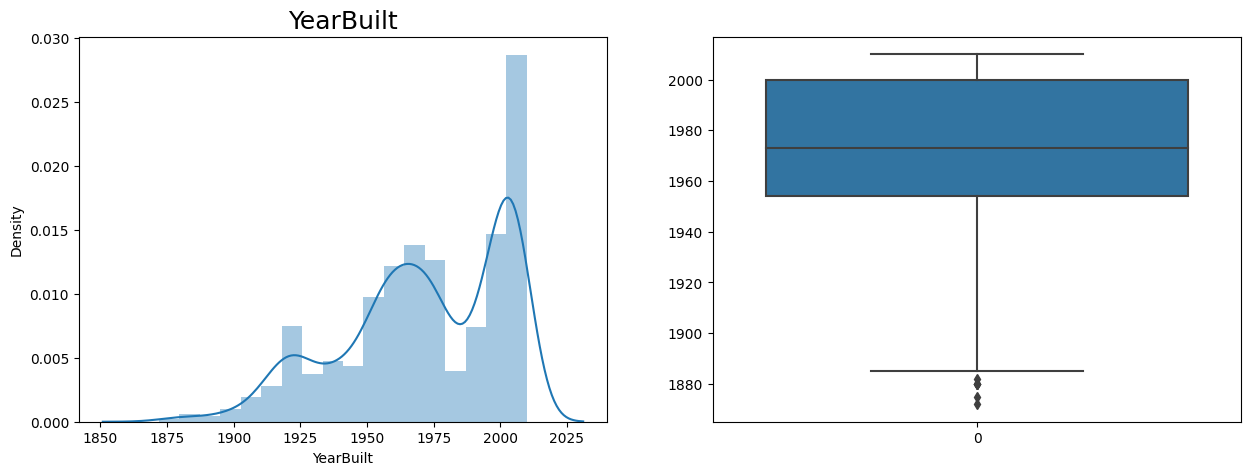

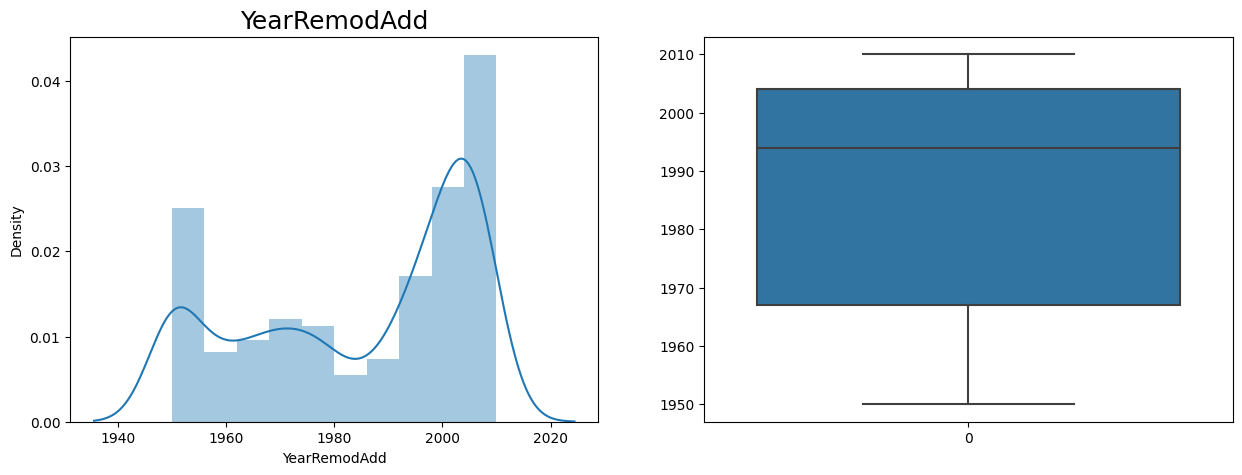

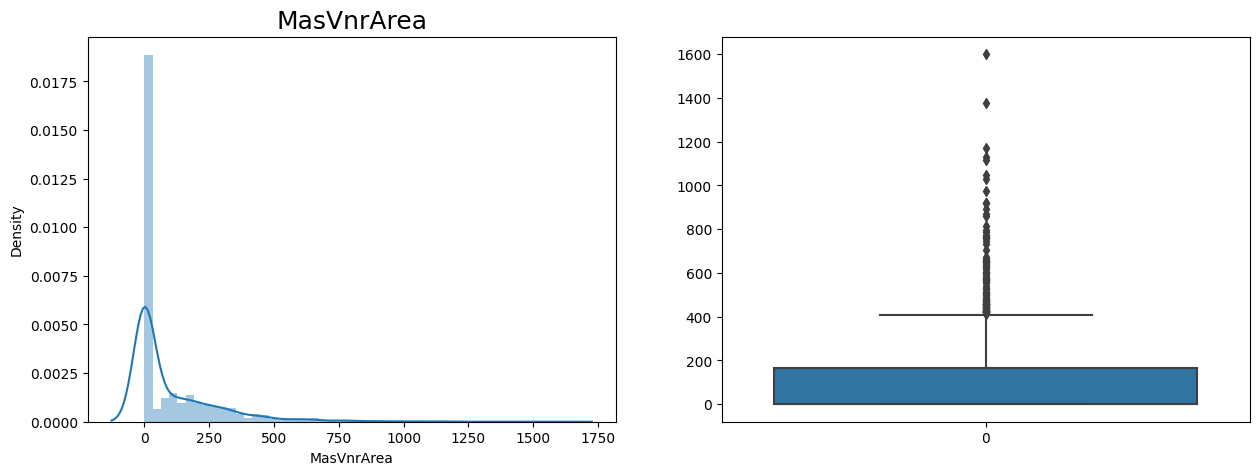

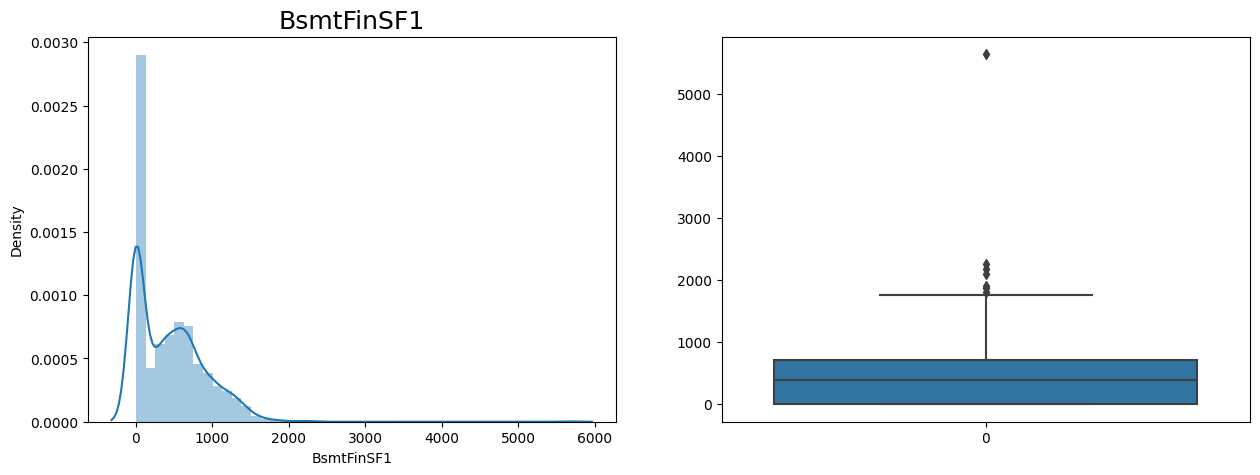

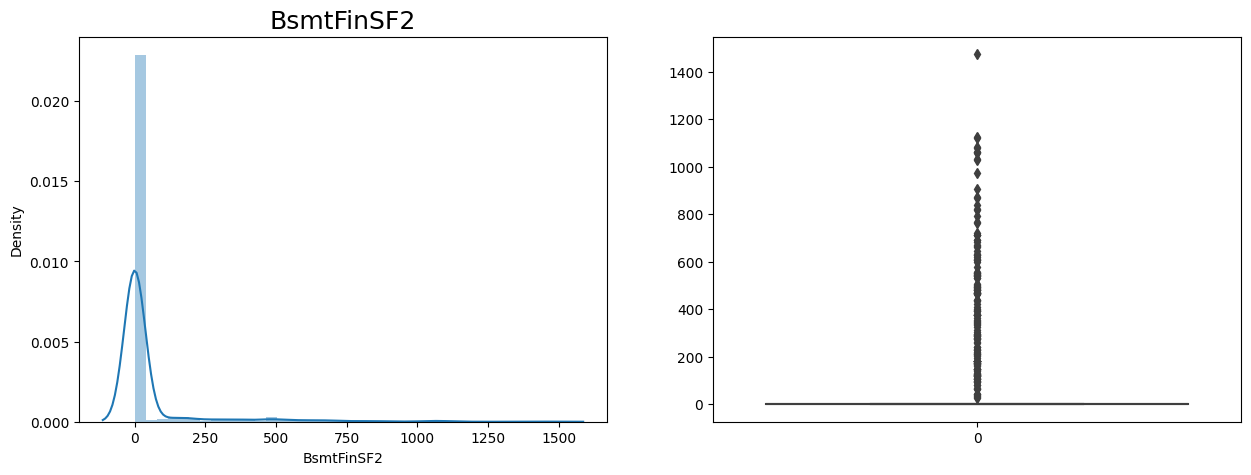

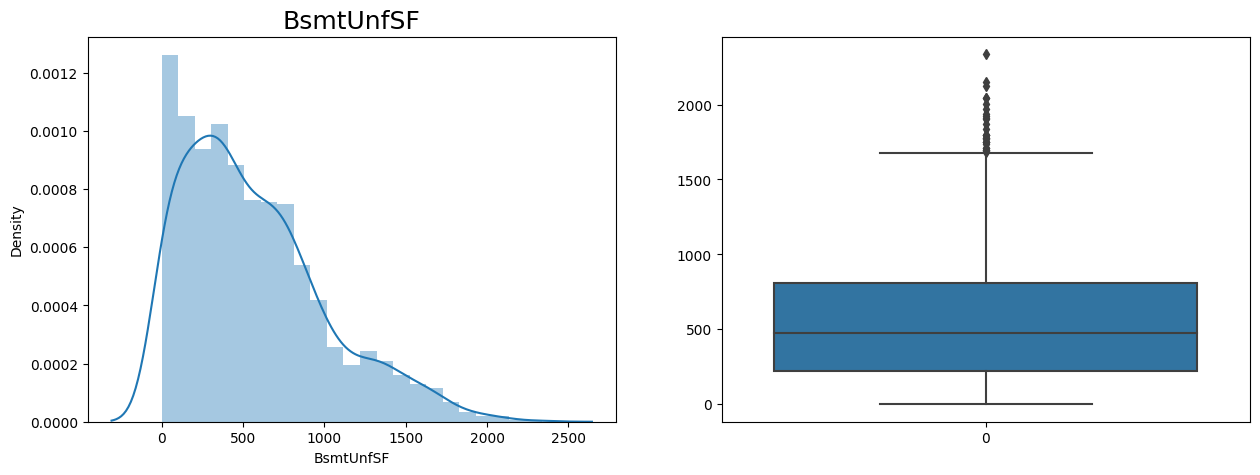

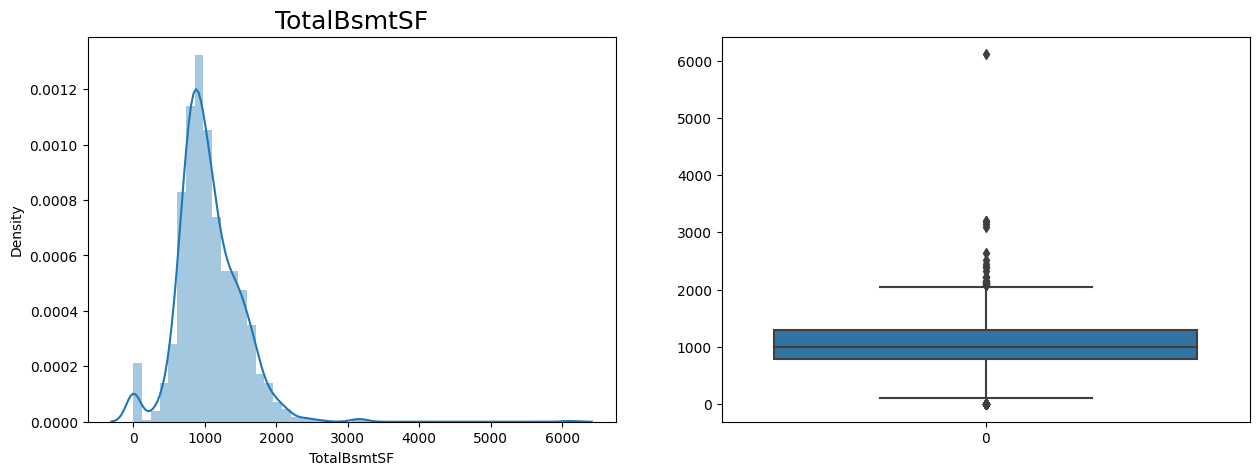

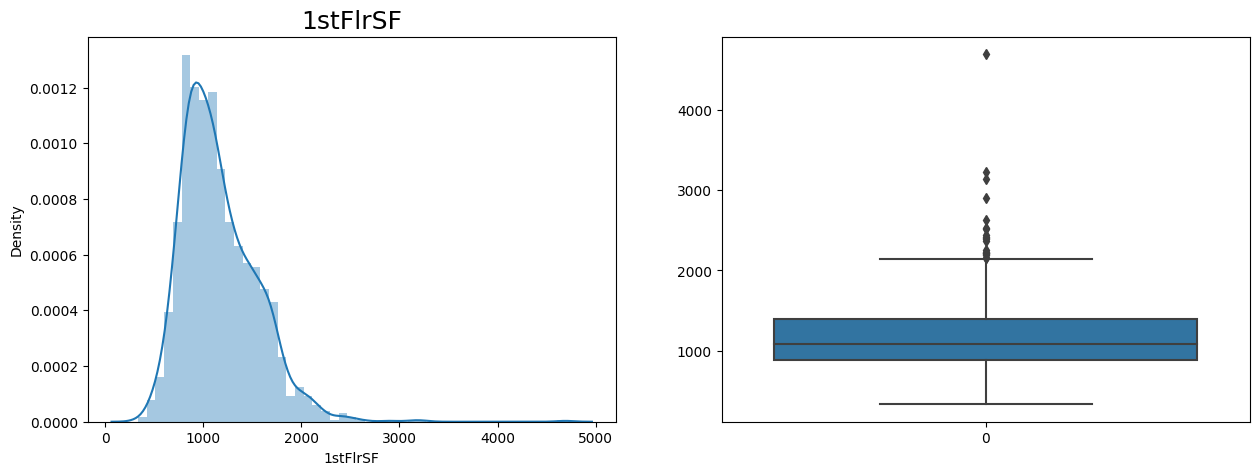

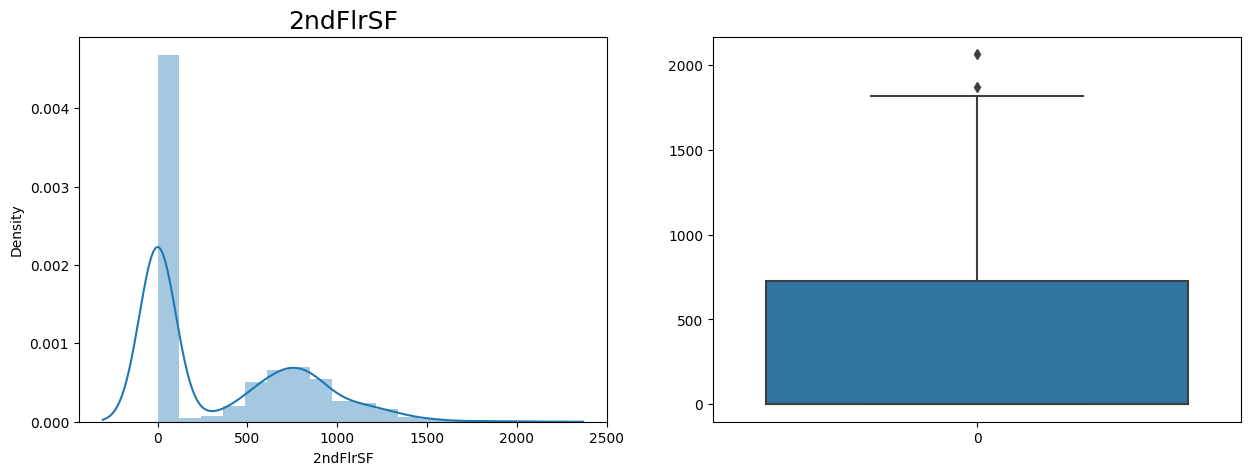

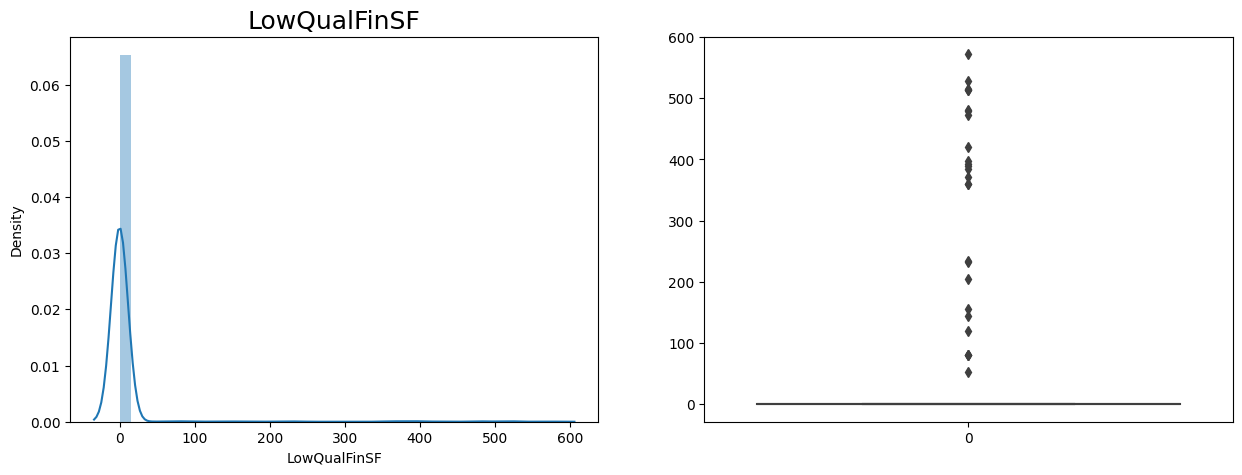

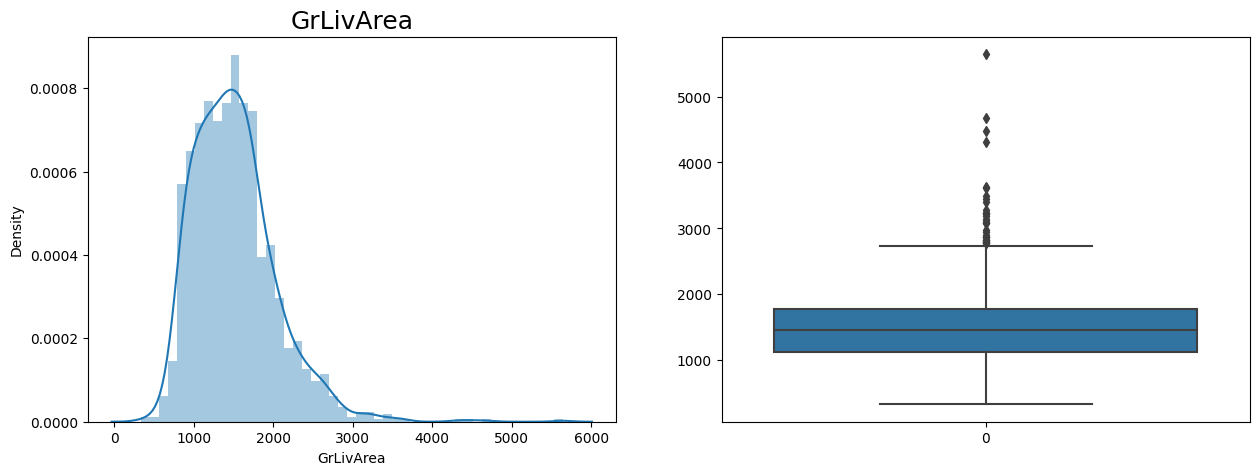

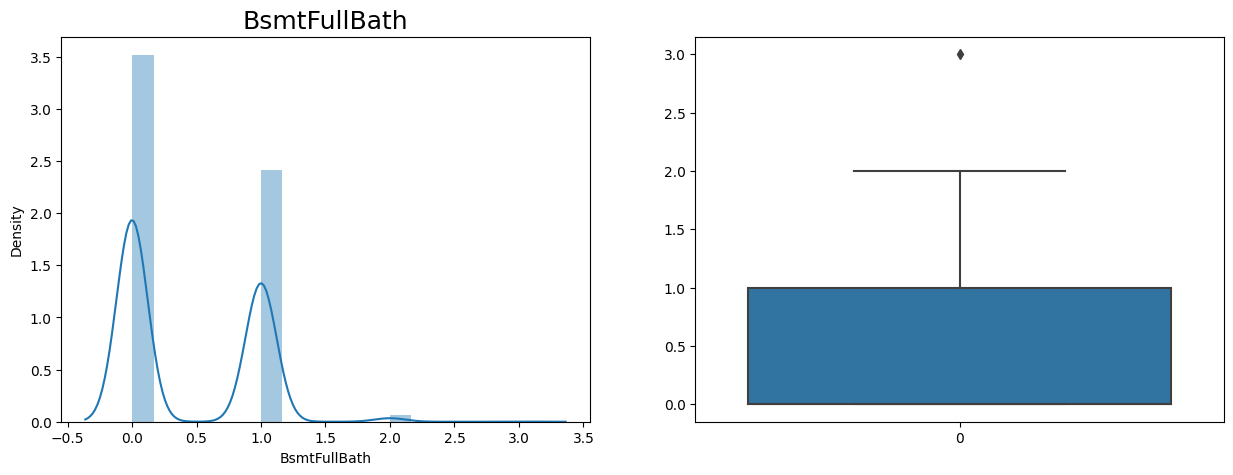

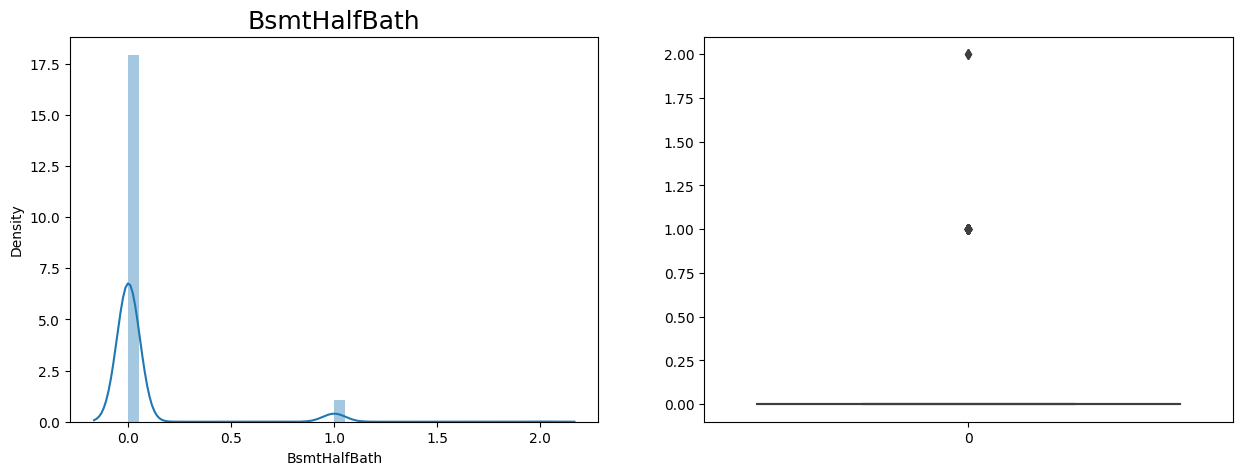

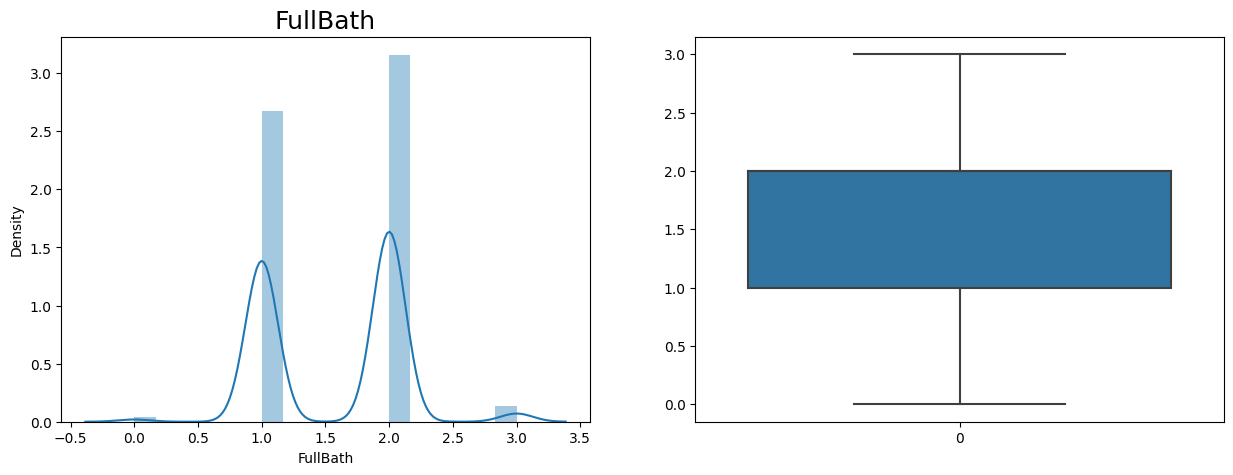

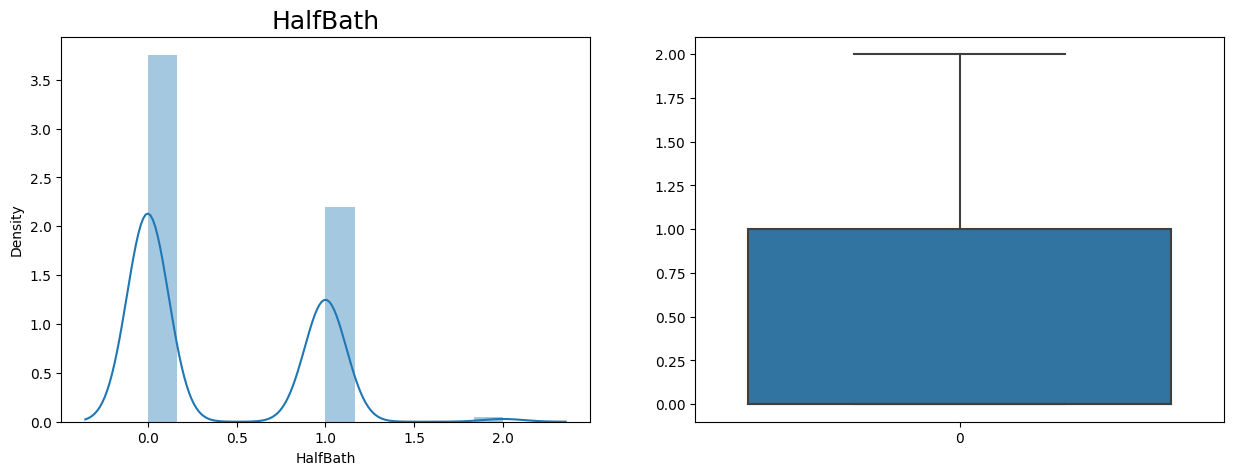

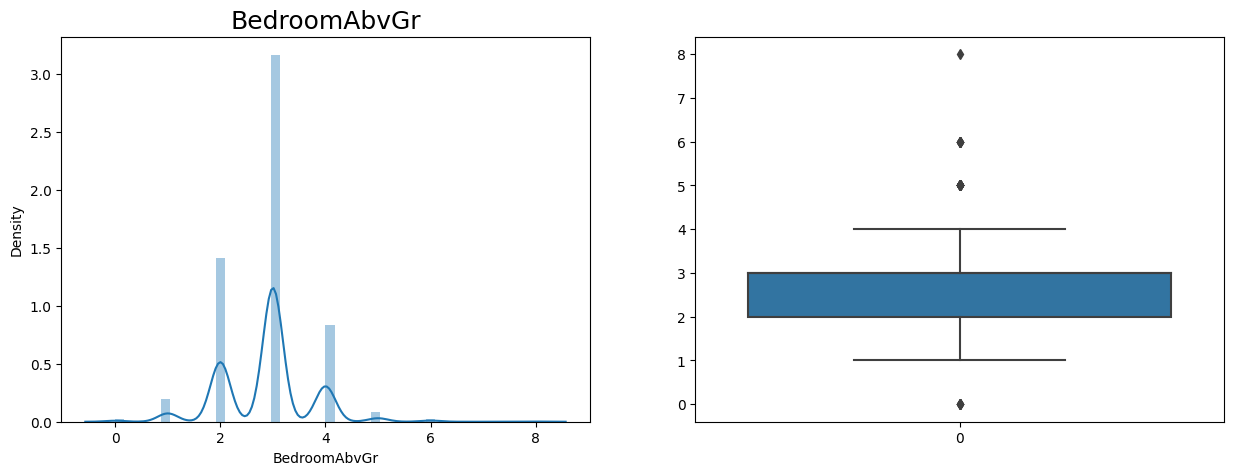

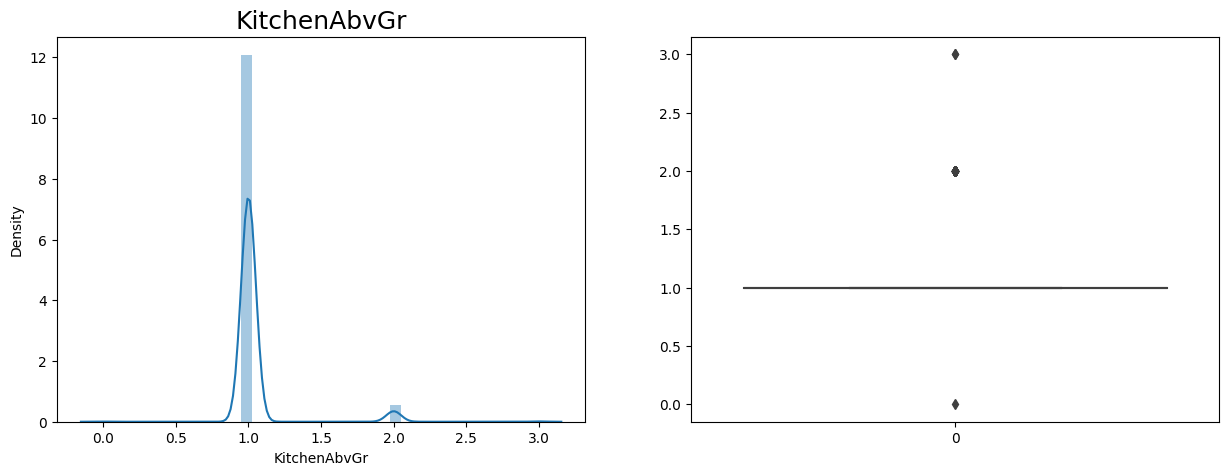

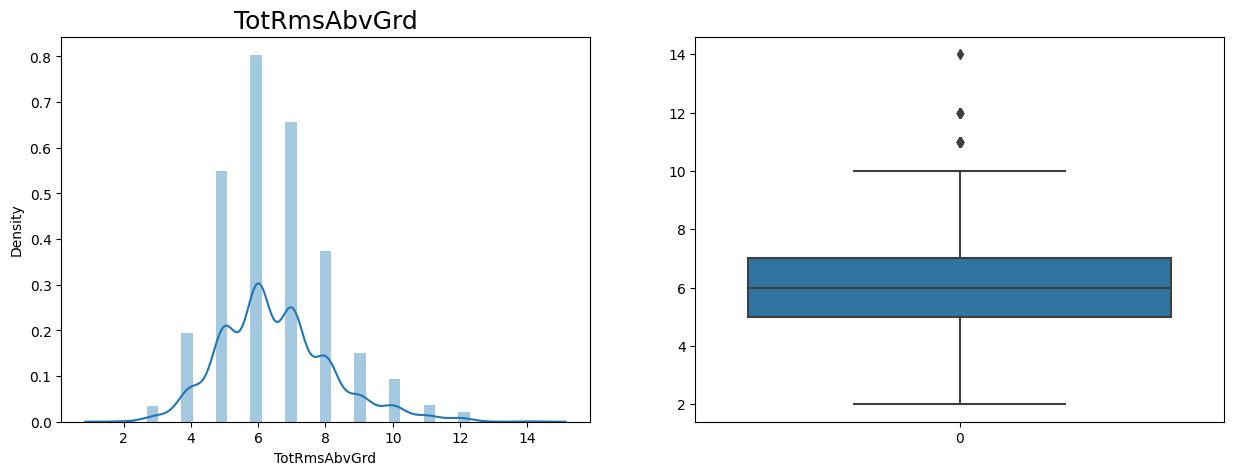

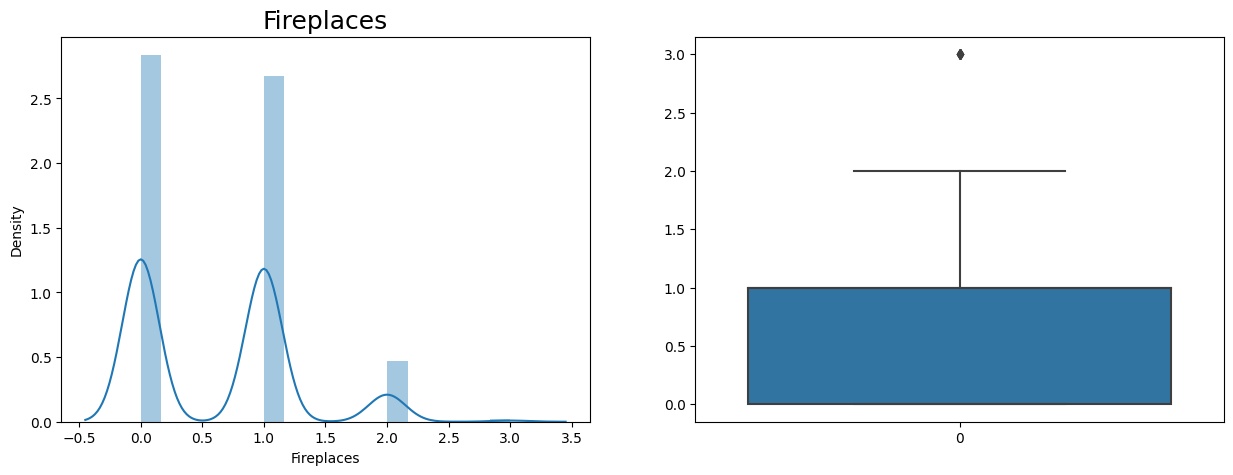

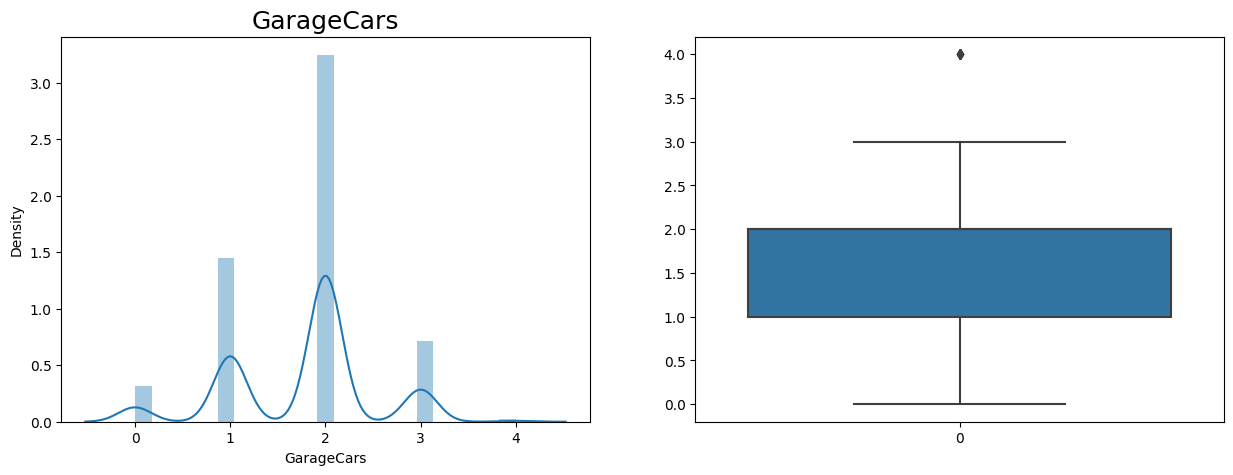

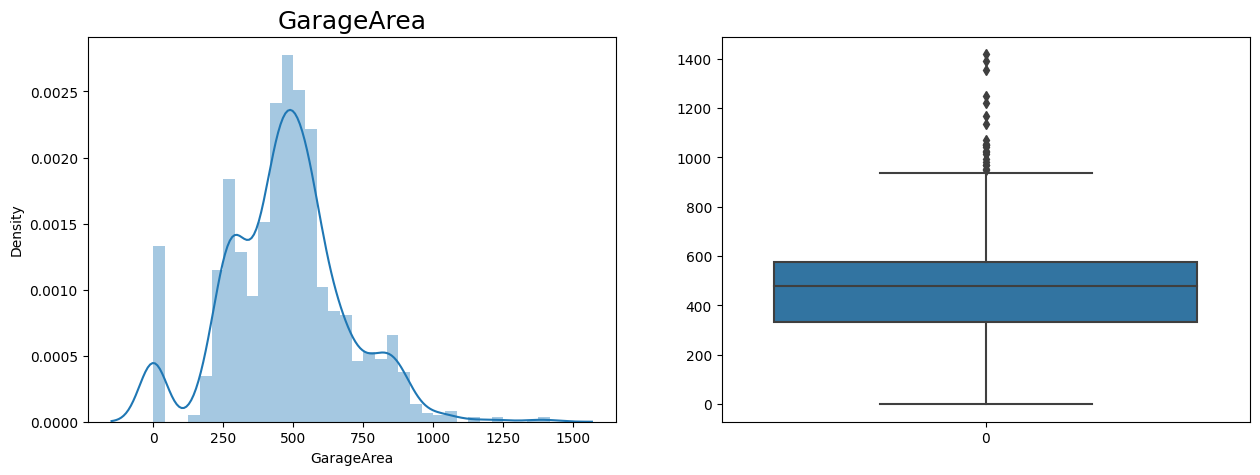

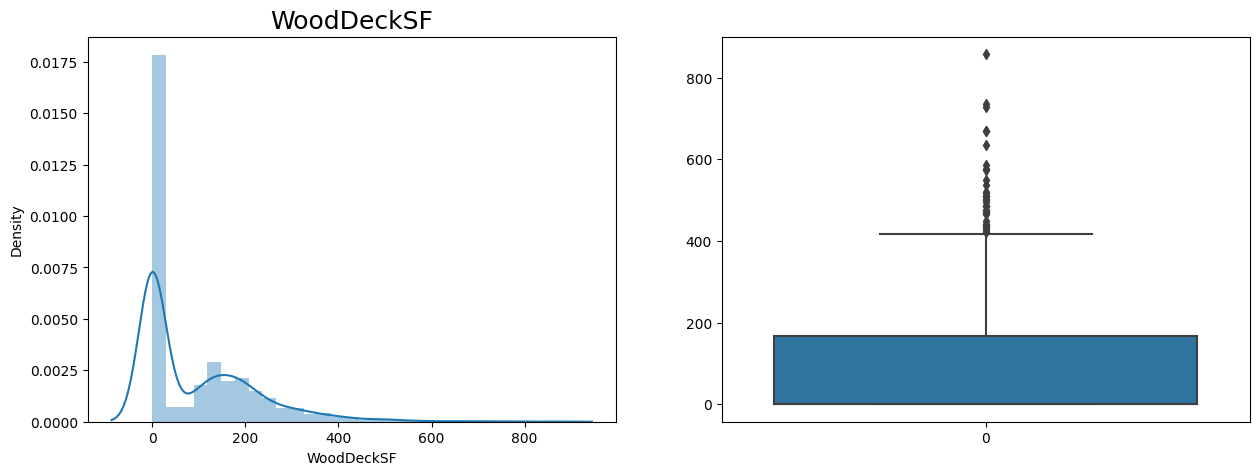

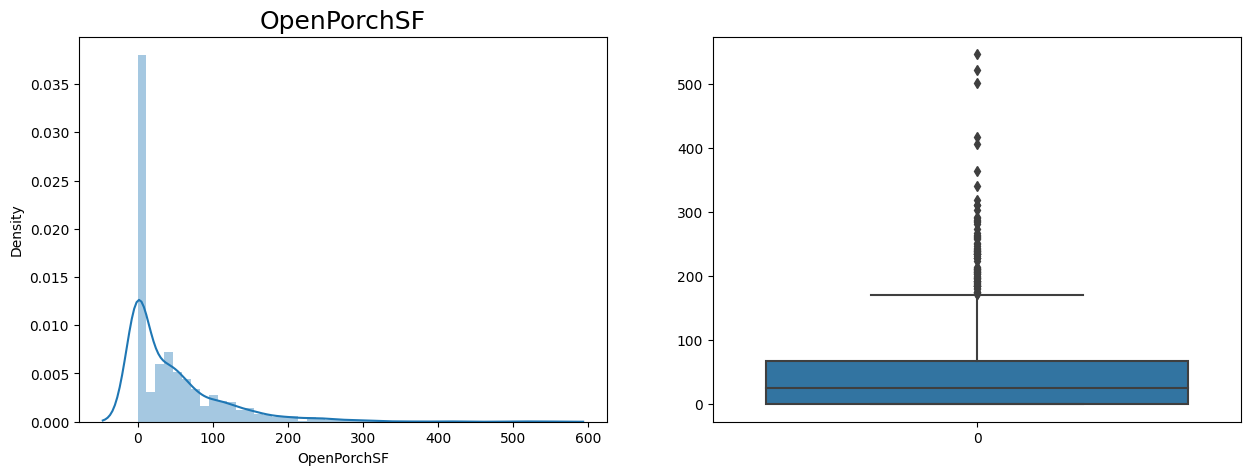

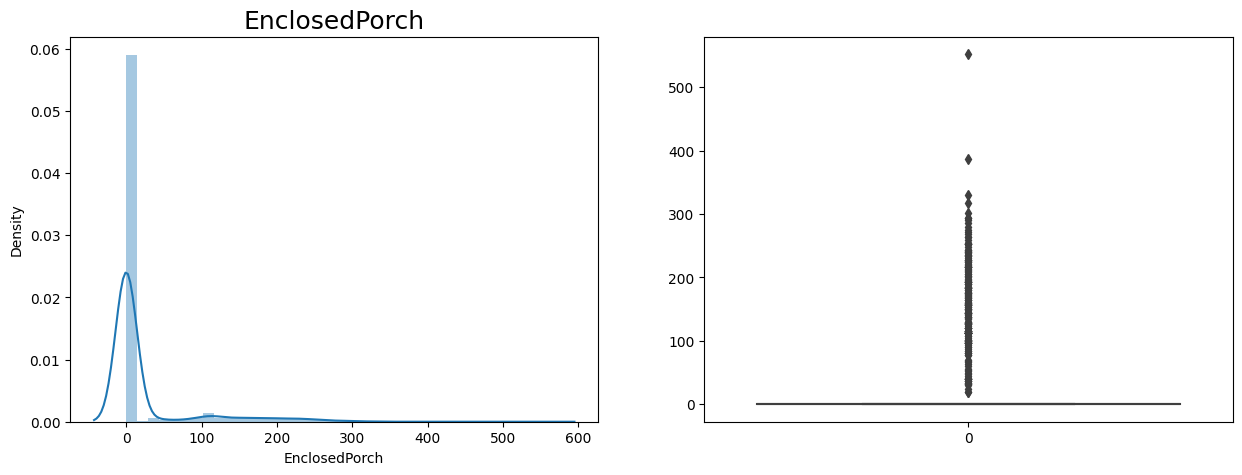

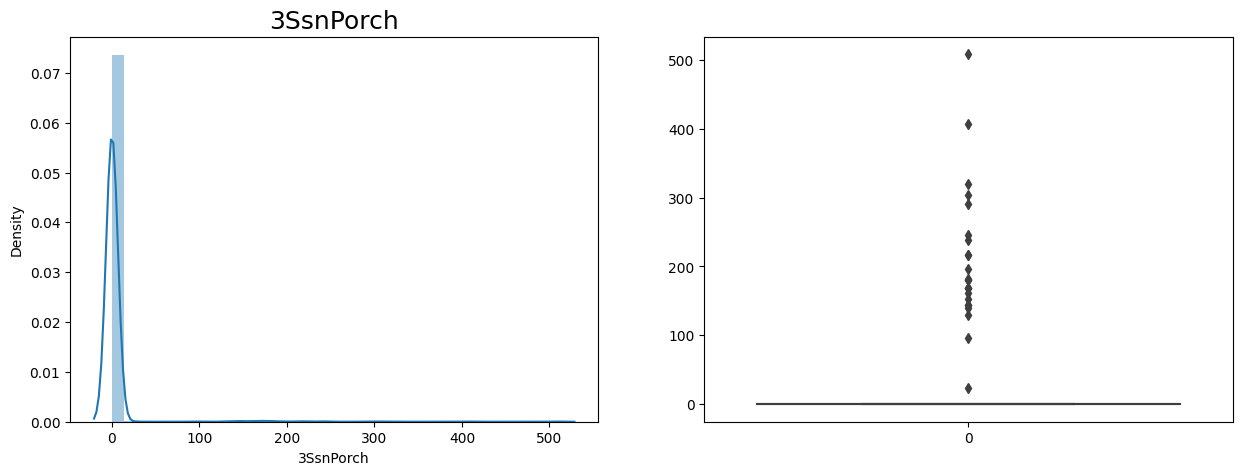

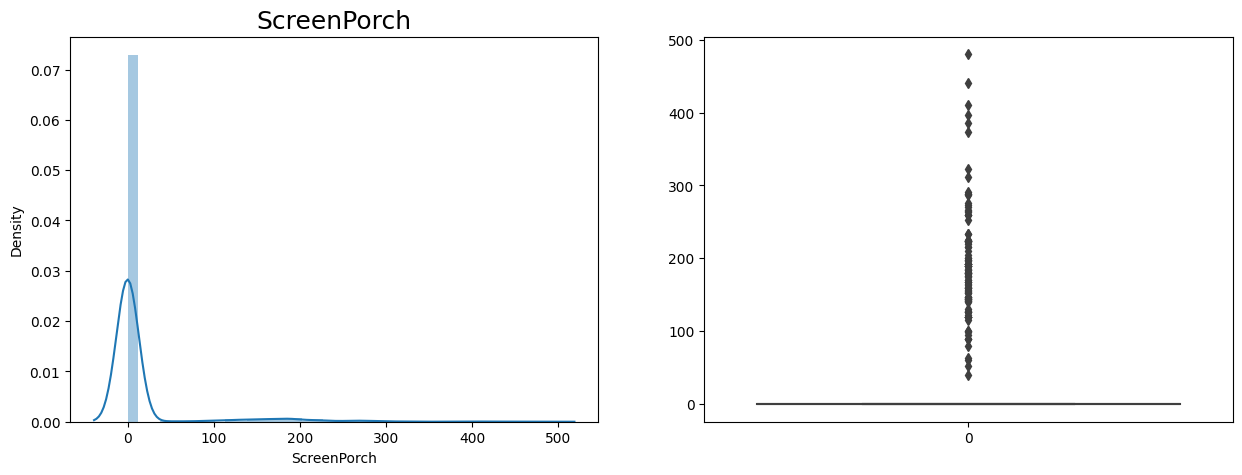

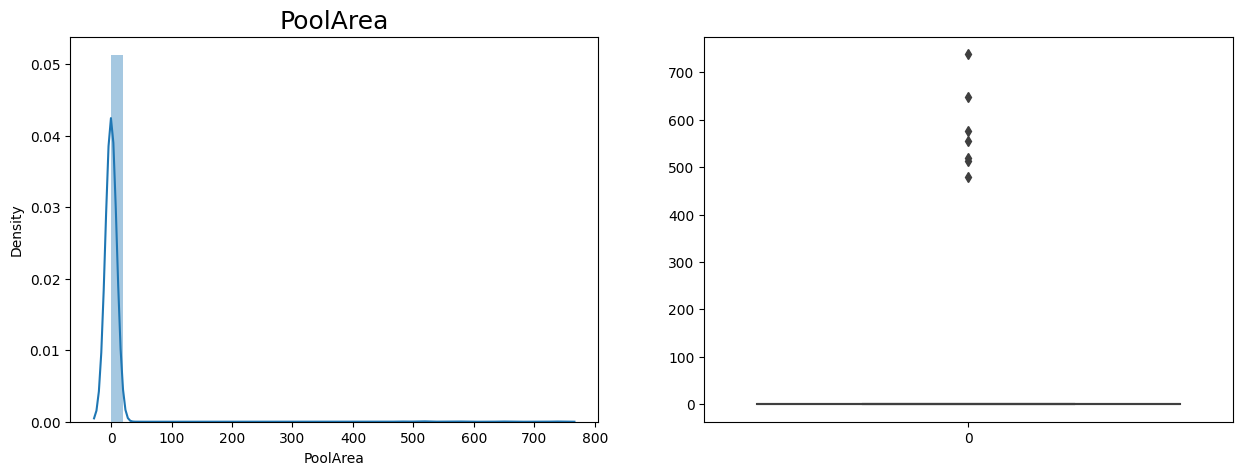

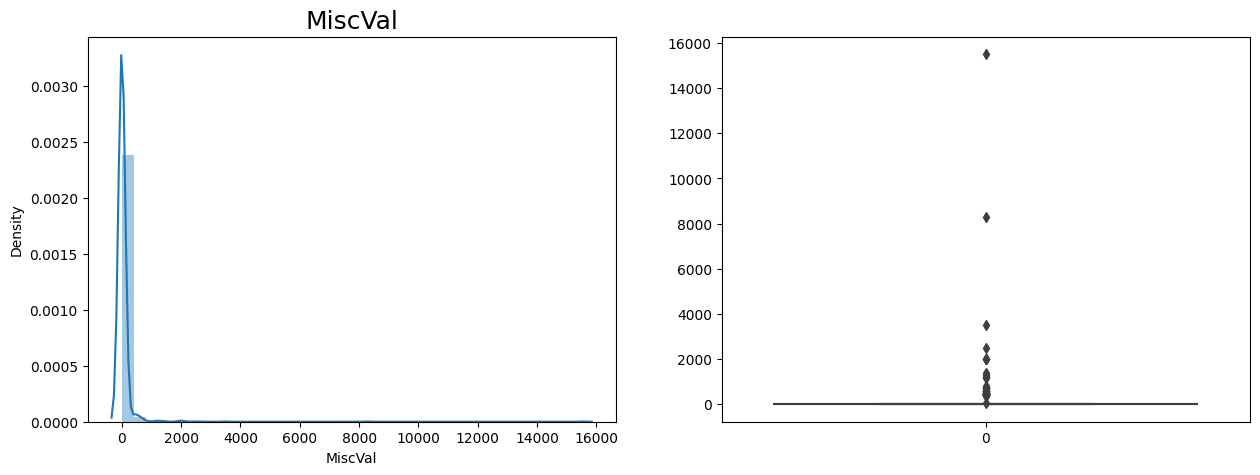

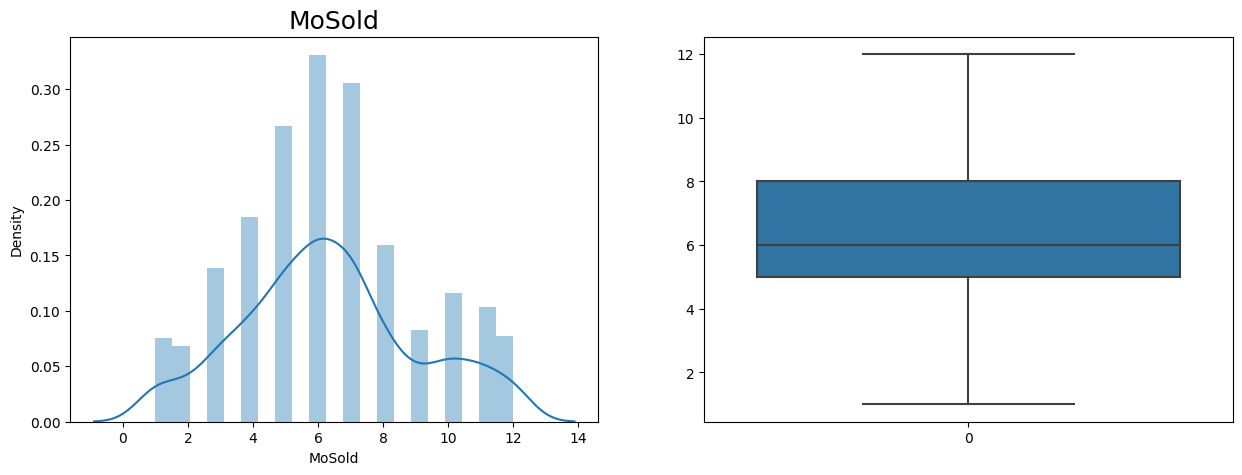

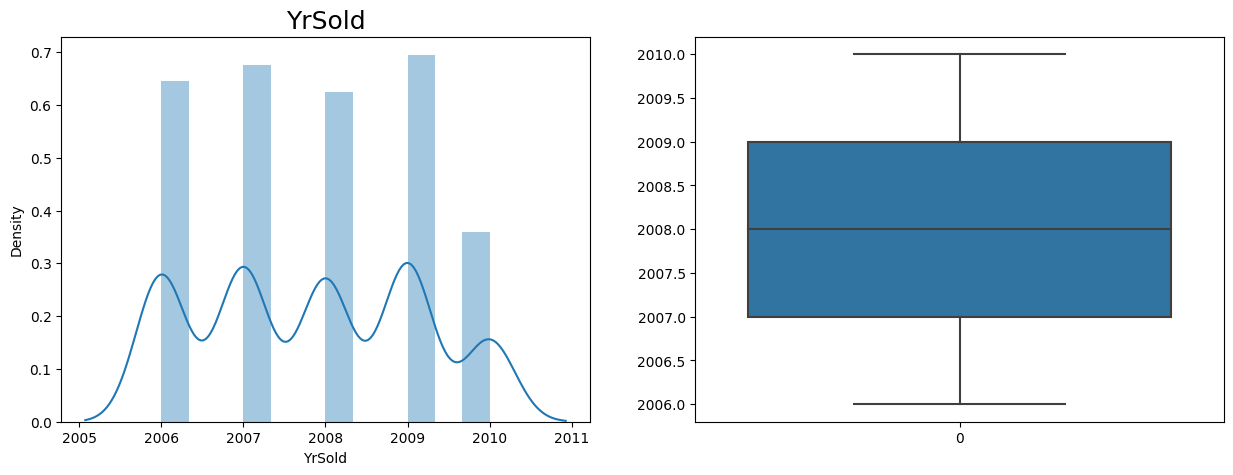

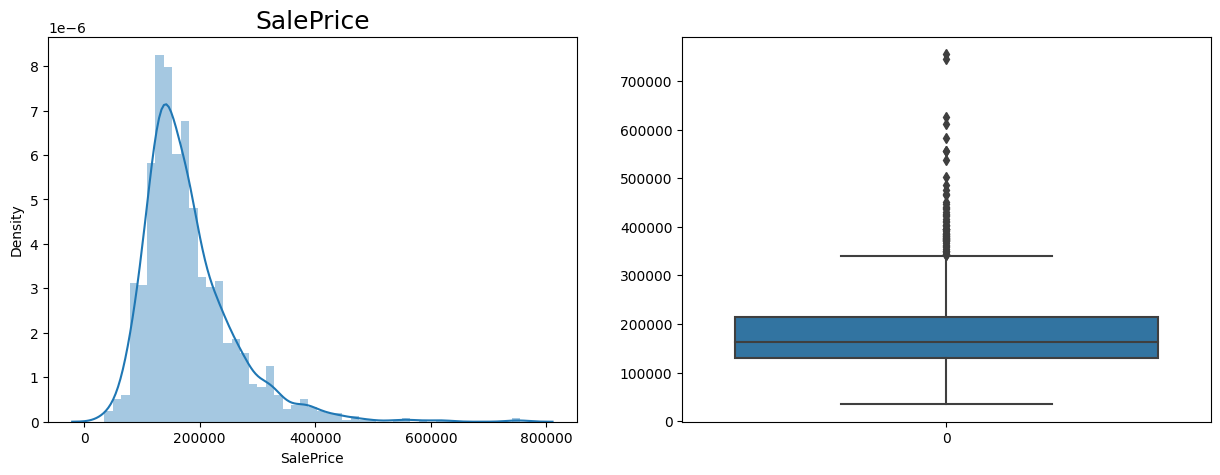

In [26]:
for col in numeric_columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(data[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.show() 

### Conclusions
- We see some outliers present when we observe boxplots.
- The distributions over various columns are mix of normally distributed values and not normally distributed

### Run count plot on categorical columns

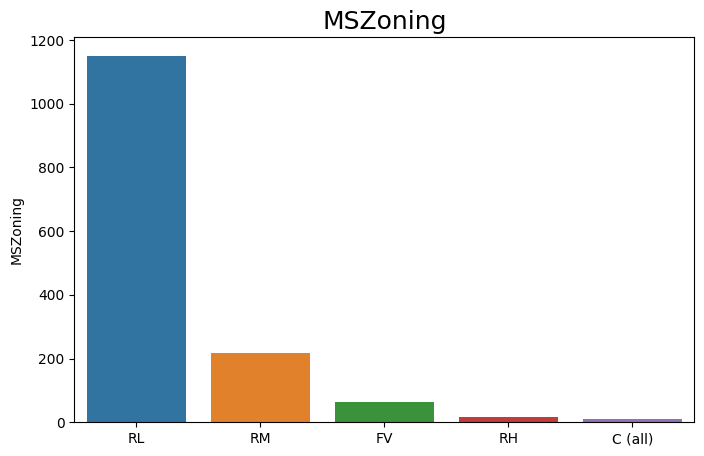

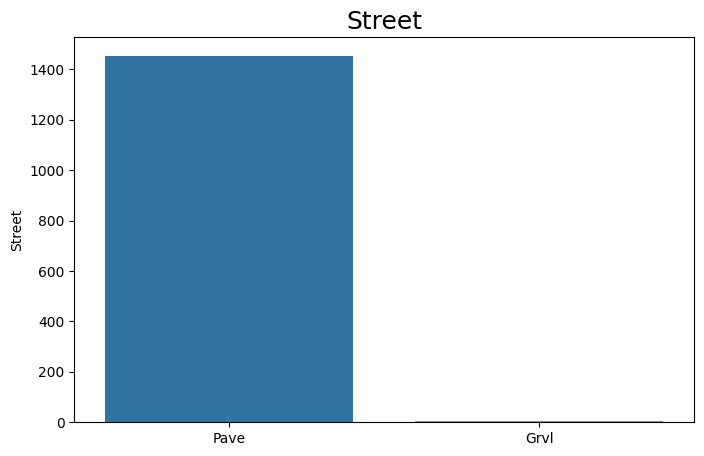

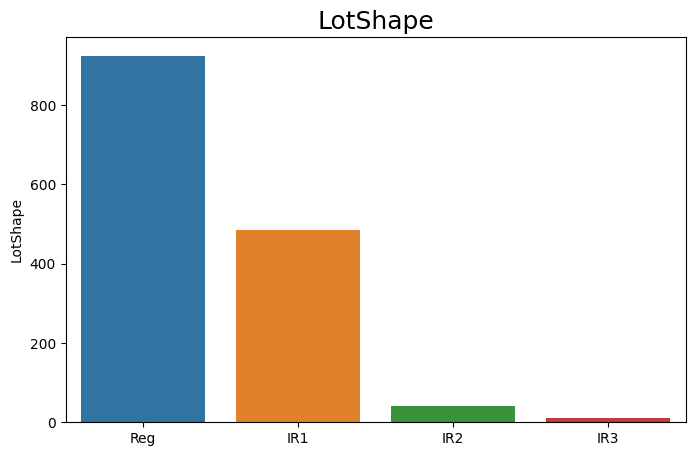

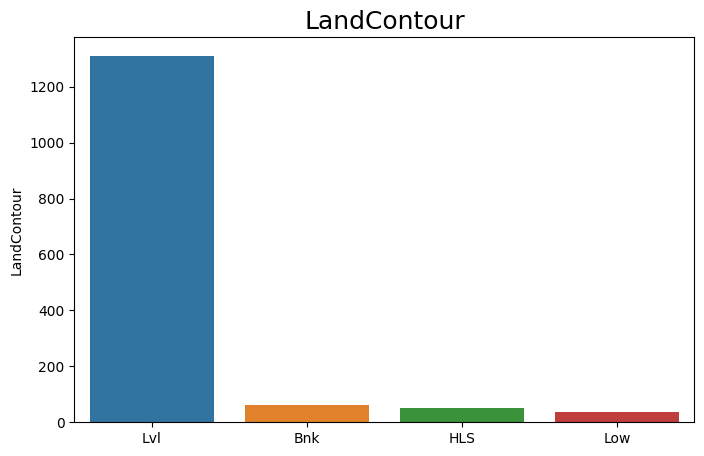

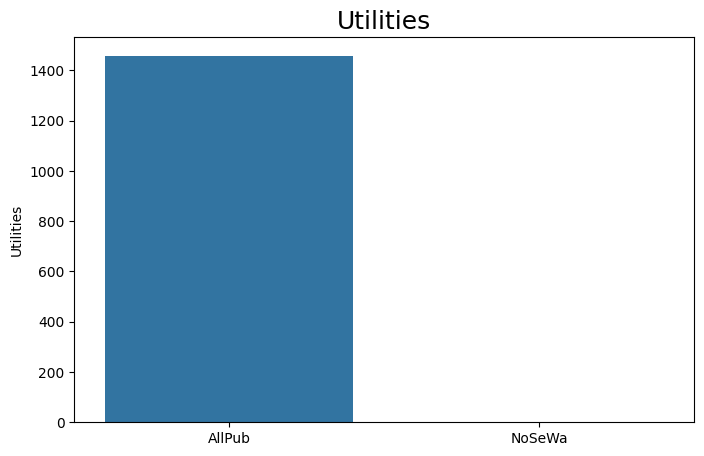

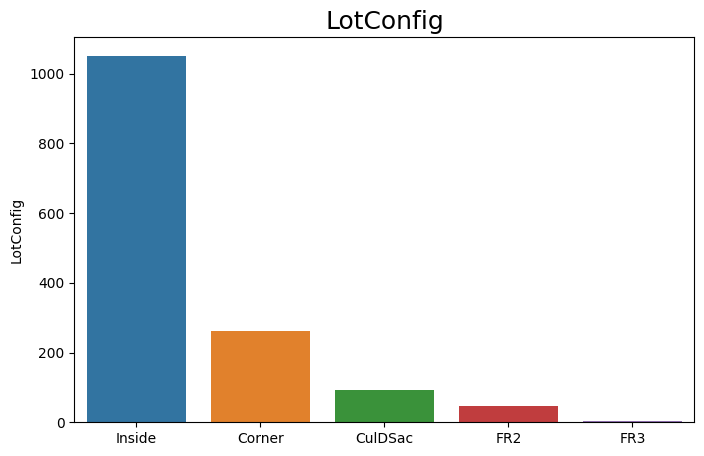

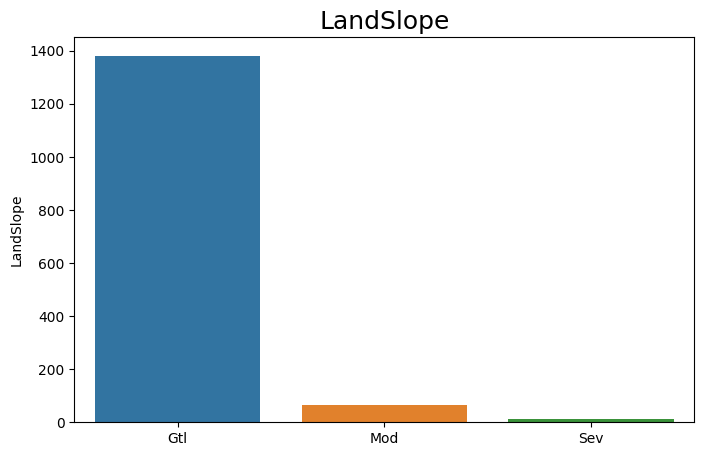

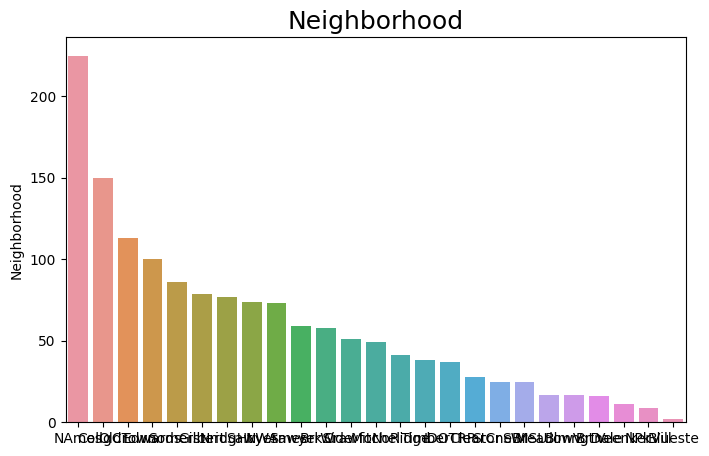

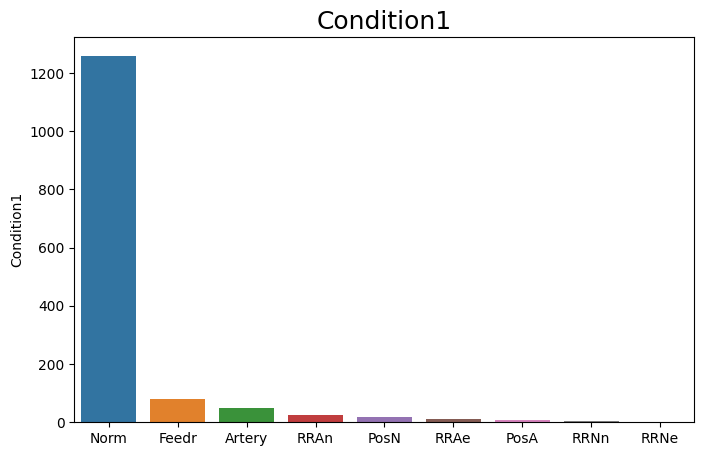

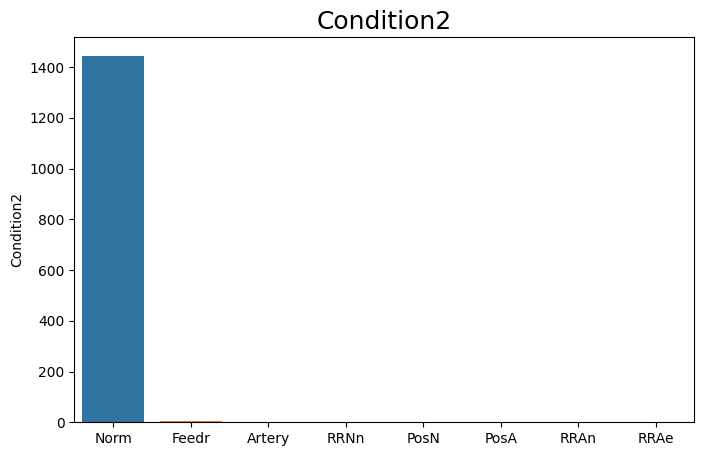

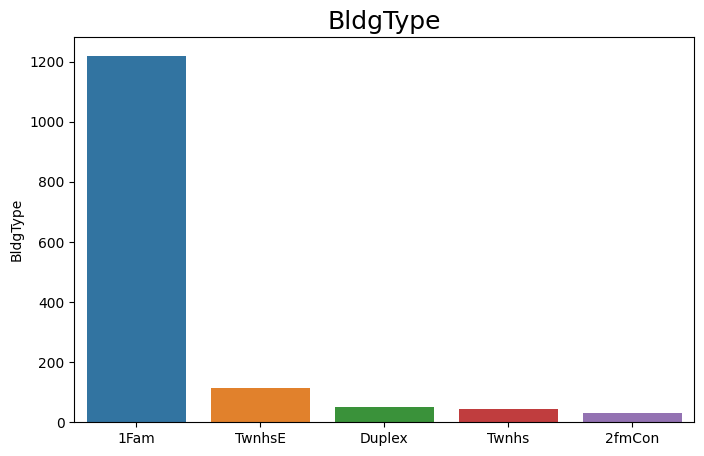

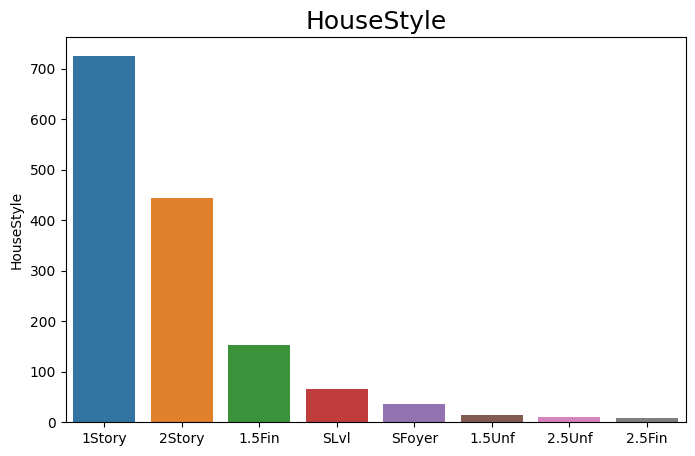

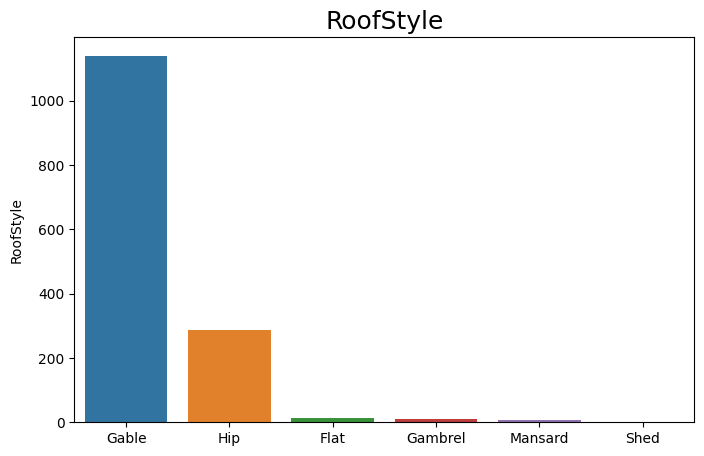

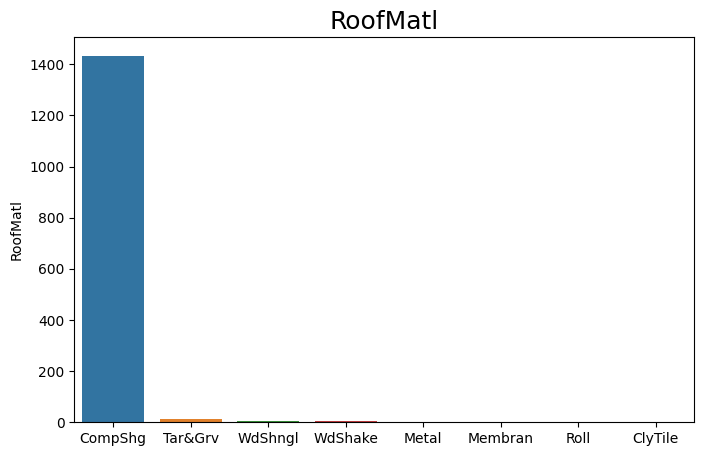

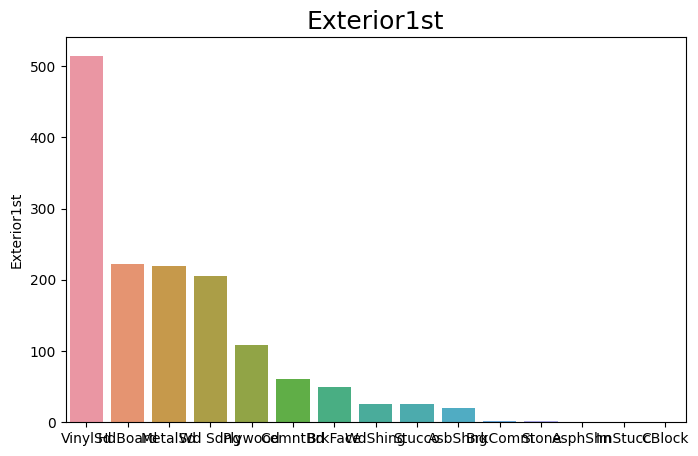

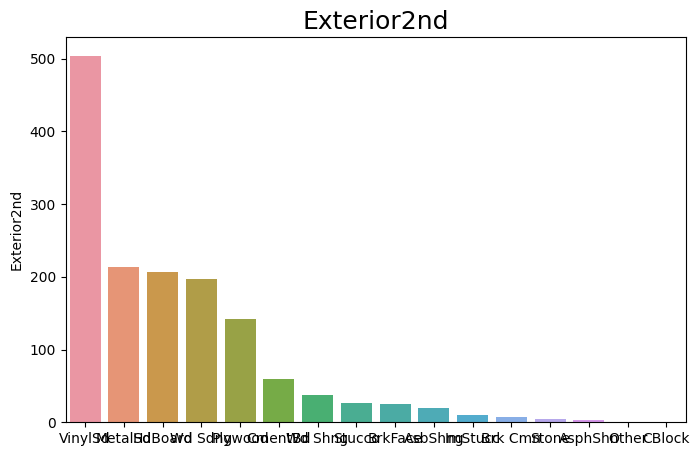

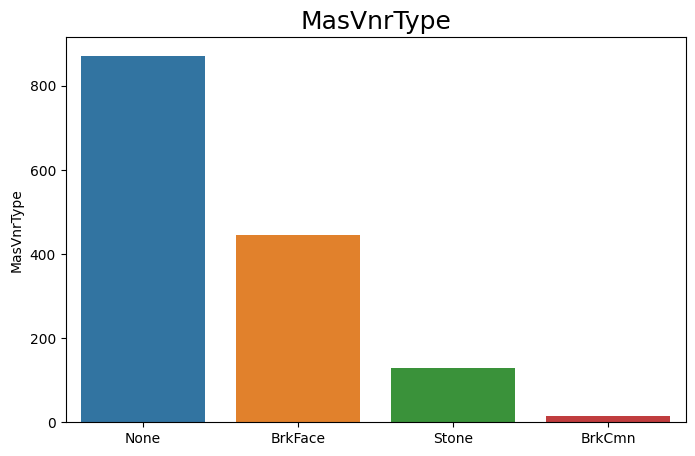

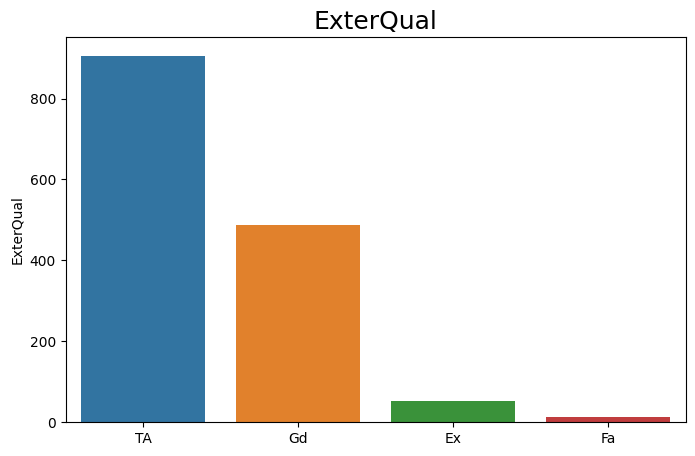

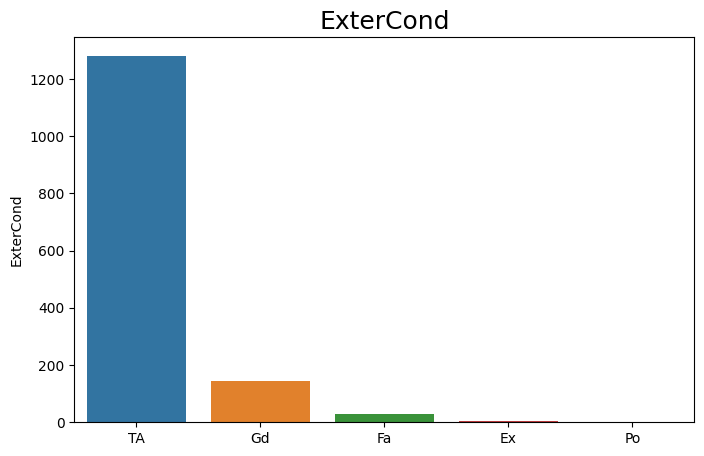

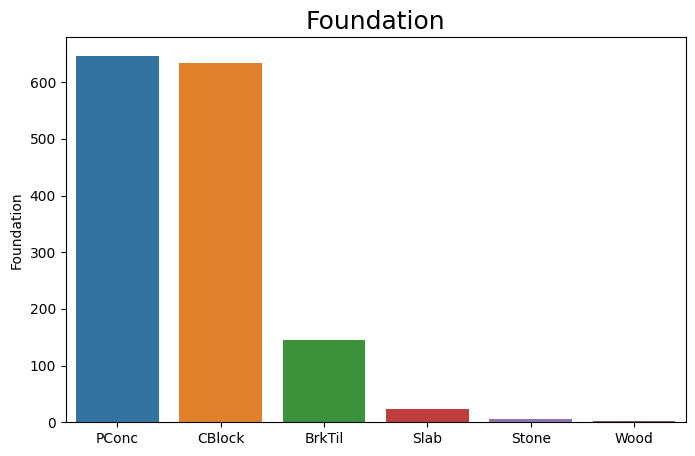

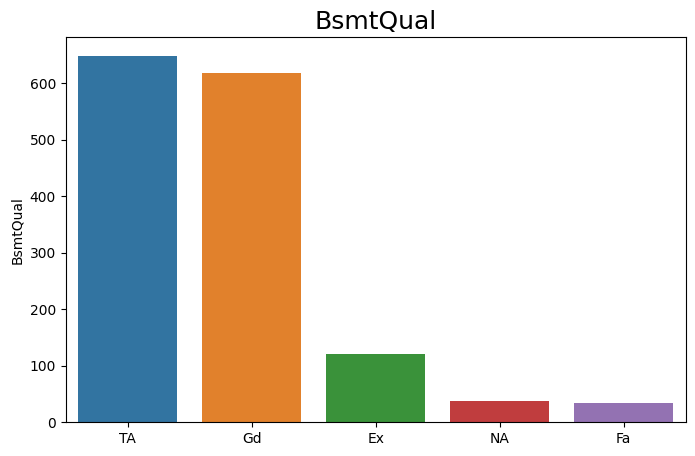

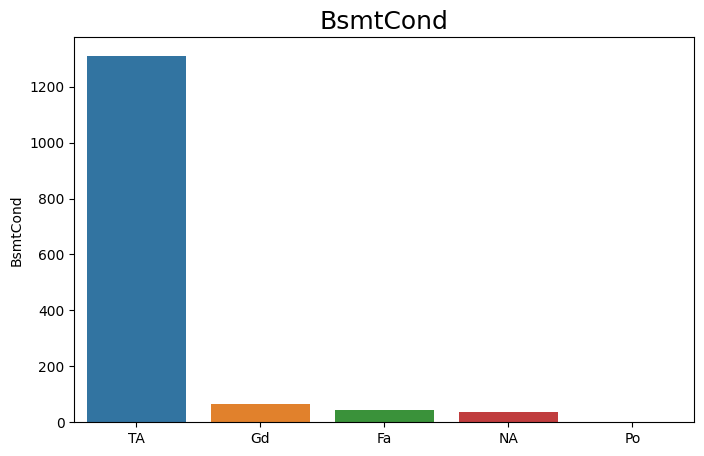

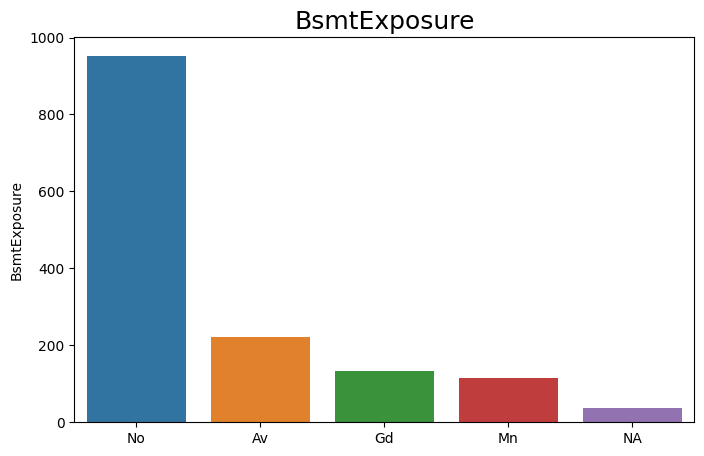

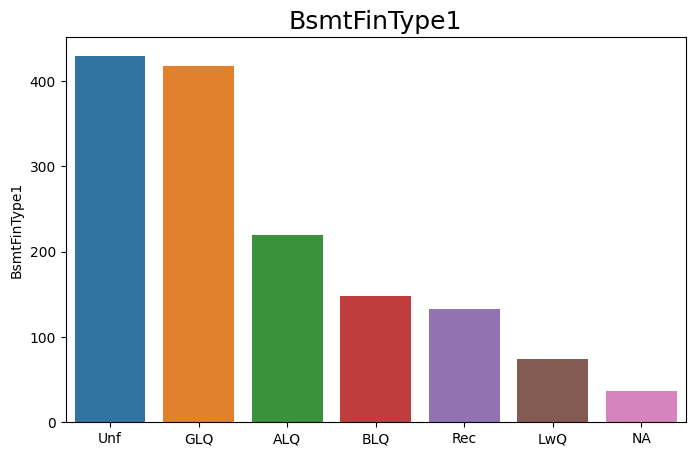

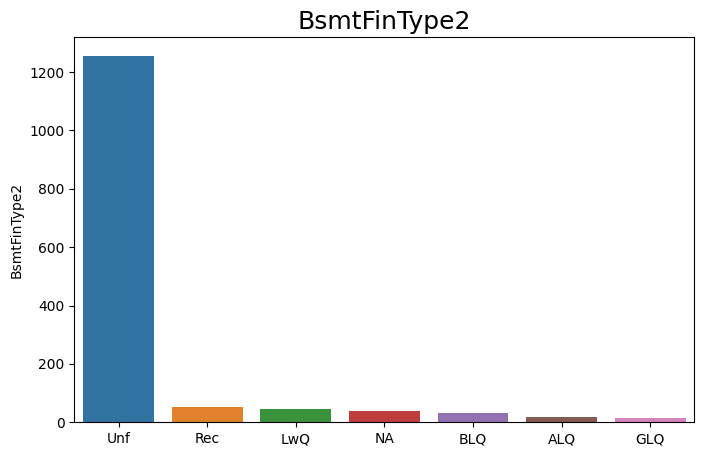

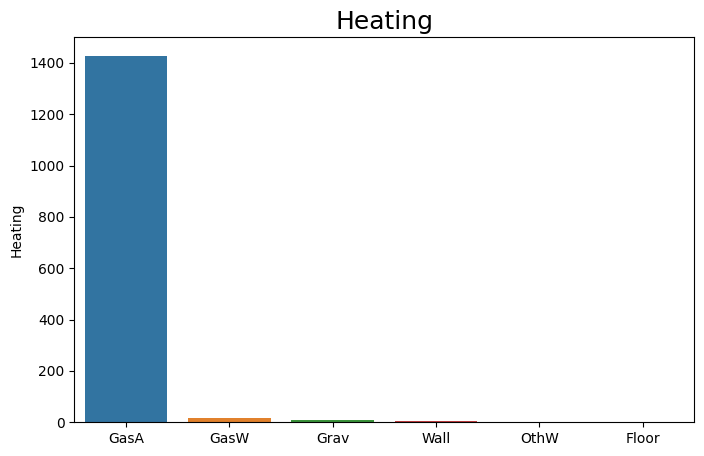

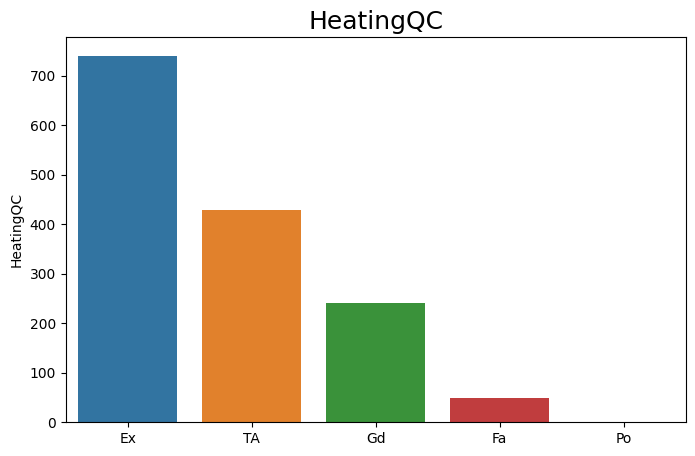

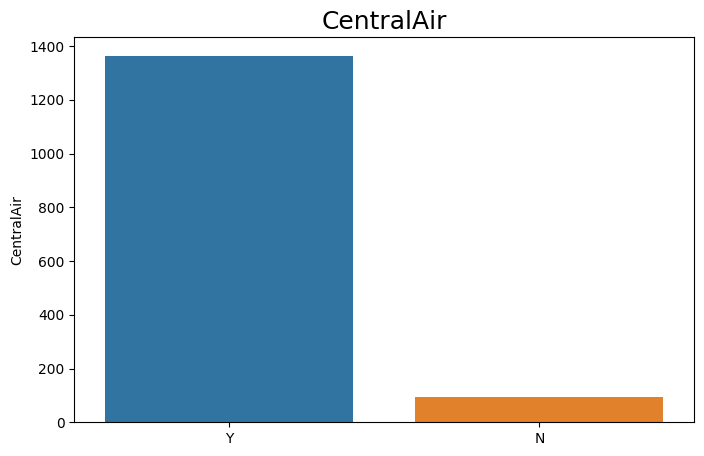

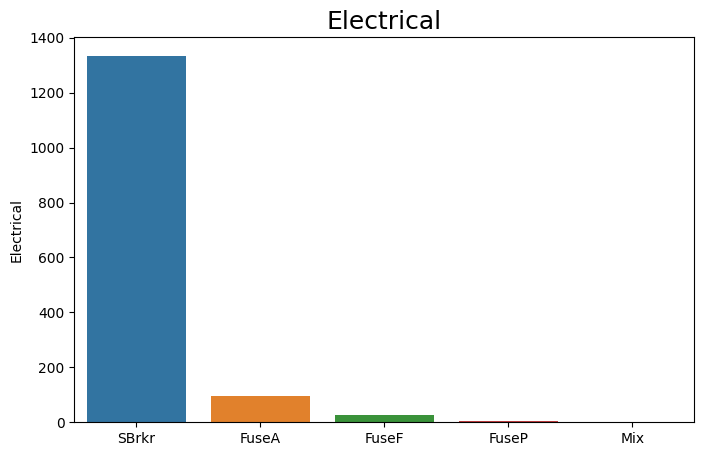

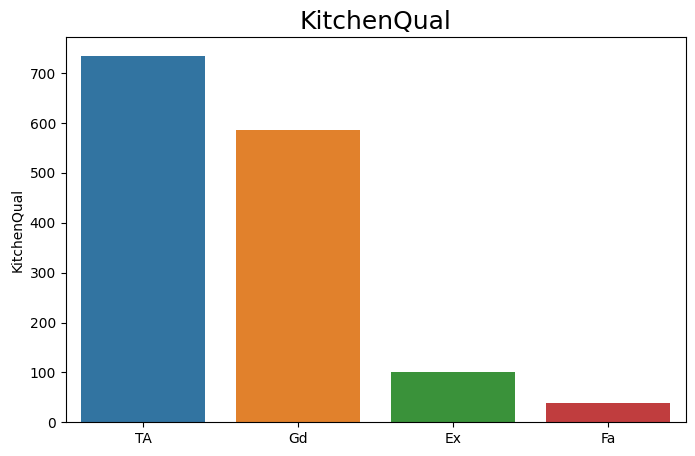

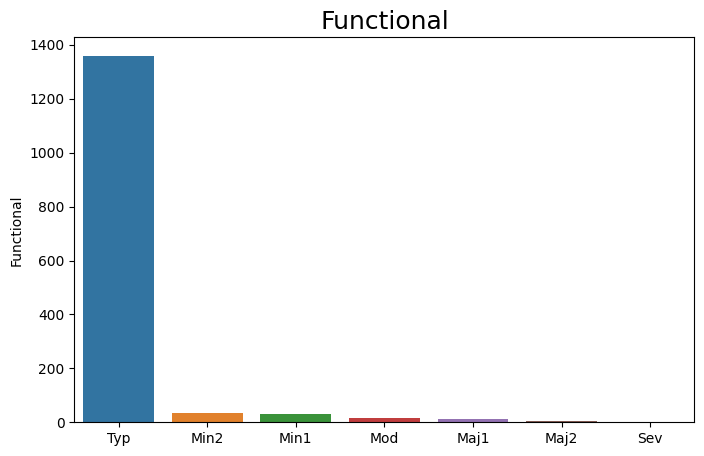

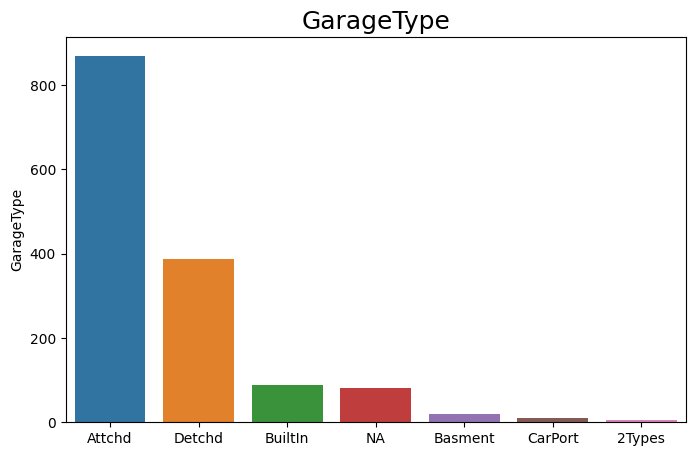

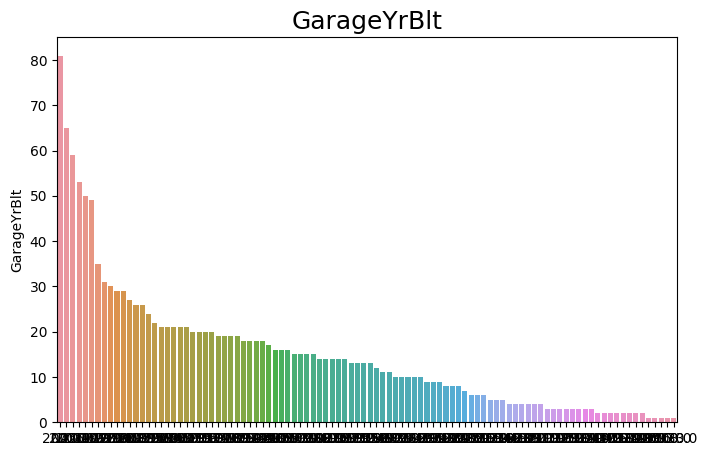

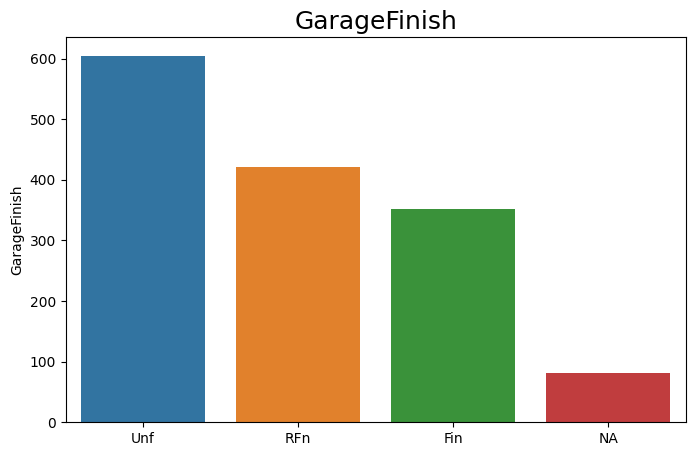

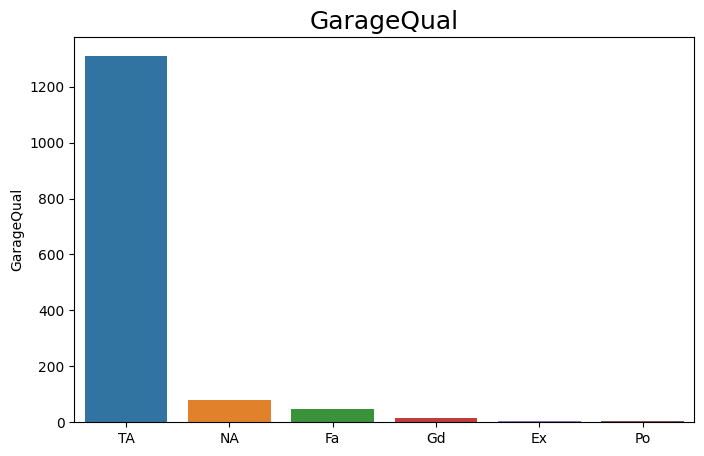

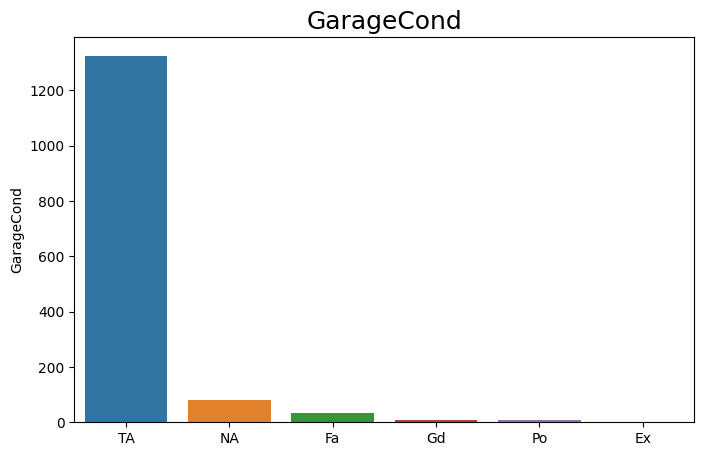

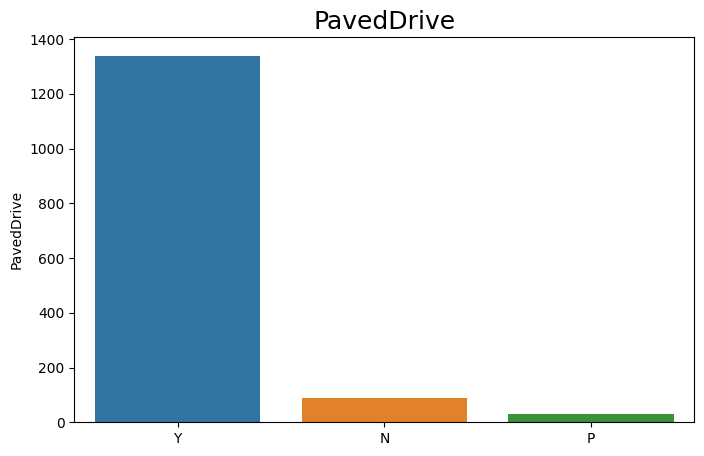

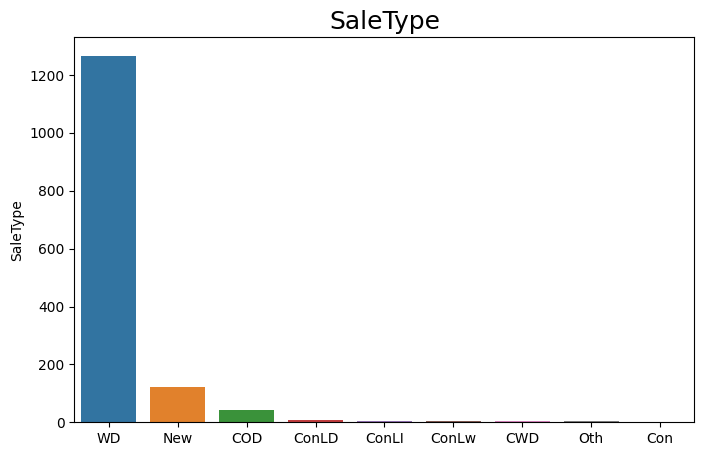

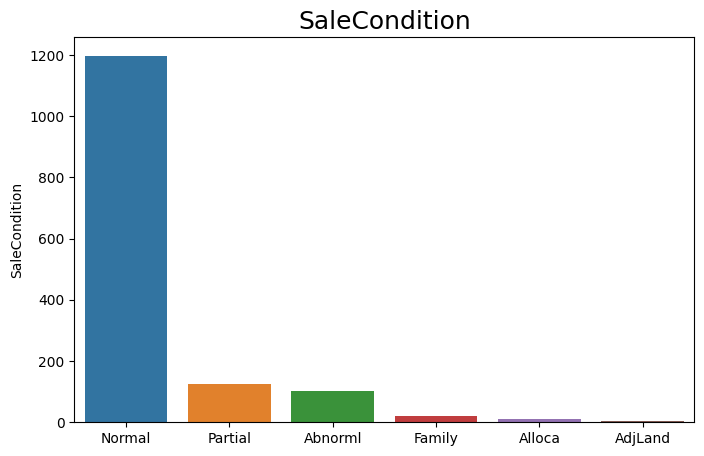

In [27]:
for col in categorical_columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x = data[col].value_counts().index, y=data[col].value_counts())
    plt.show()

### We can observe some skews when we do EDA on categorical columns. The following show high skew

- Functional
- Heating
- BsmtFinType2
- BsmtCond
- ExterCond
- RoofMatl
- Condition2
- Condition1
- LandSlope
- LandContour
- SaleCondition
- GarageType 
- GarageFinish
- SaleType

In [28]:
# check and print skew
skew_columns = ['Functional','Heating','BsmtFinType2','BsmtCond','ExterCond','RoofMatl','Condition2','Condition1','LandSlope','LandContour','SaleCondition','GarageType','GarageFinish','SaleType']
for col in skew_columns:
    print('**************************************************')
    print('checking skew for '+ col)
    print(data[col].value_counts())


**************************************************
checking skew for Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
**************************************************
checking skew for Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
**************************************************
checking skew for BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
**************************************************
checking skew for BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
**************************************************
checking skew for ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
**************************************************
checking skew for RoofMatl
CompSh

In [29]:
# identified columns are showing high skew. hence dropping them

data.drop(skew_columns,axis=1,inplace=True)
data.shape
     

(1460, 62)

## Checking the target column

In [30]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

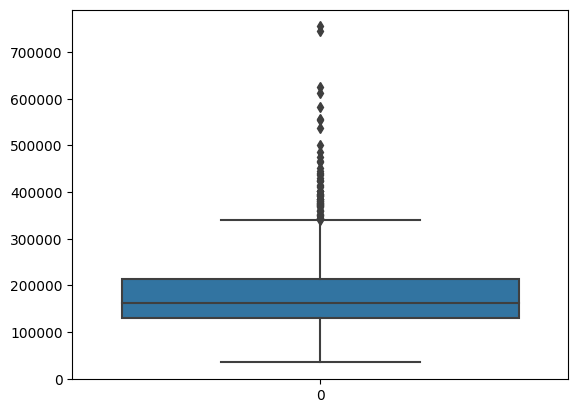

In [31]:
# plot count plot on sale price
sns.boxplot(data['SalePrice'])
plt.show()


### we are observing outliers

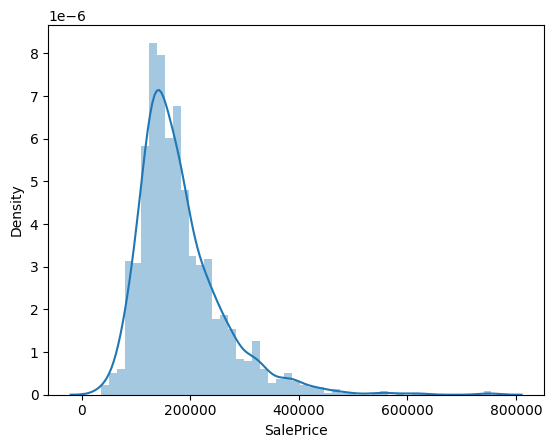

In [32]:
# check distribution
sns.distplot(data['SalePrice'])
plt.show()

### The distributions looks too much to the left. Need to check the skew.

In [33]:
data['SalePrice'].skew()

1.8828757597682129

### Skew is greater than 1. Its relatively high. Explore whether log transformation can help with the skew

0.12133506220520406


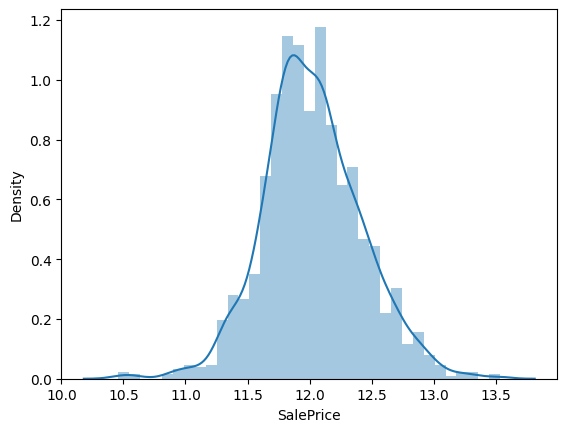

In [34]:
data['SalePrice'] = np.log(data['SalePrice'])
print(data['SalePrice'].skew())
sns.distplot(data['SalePrice'])
plt.show()


### Log transformation has helped with the distribution and the skew

### Plot box plots for all categorical variables against target variable

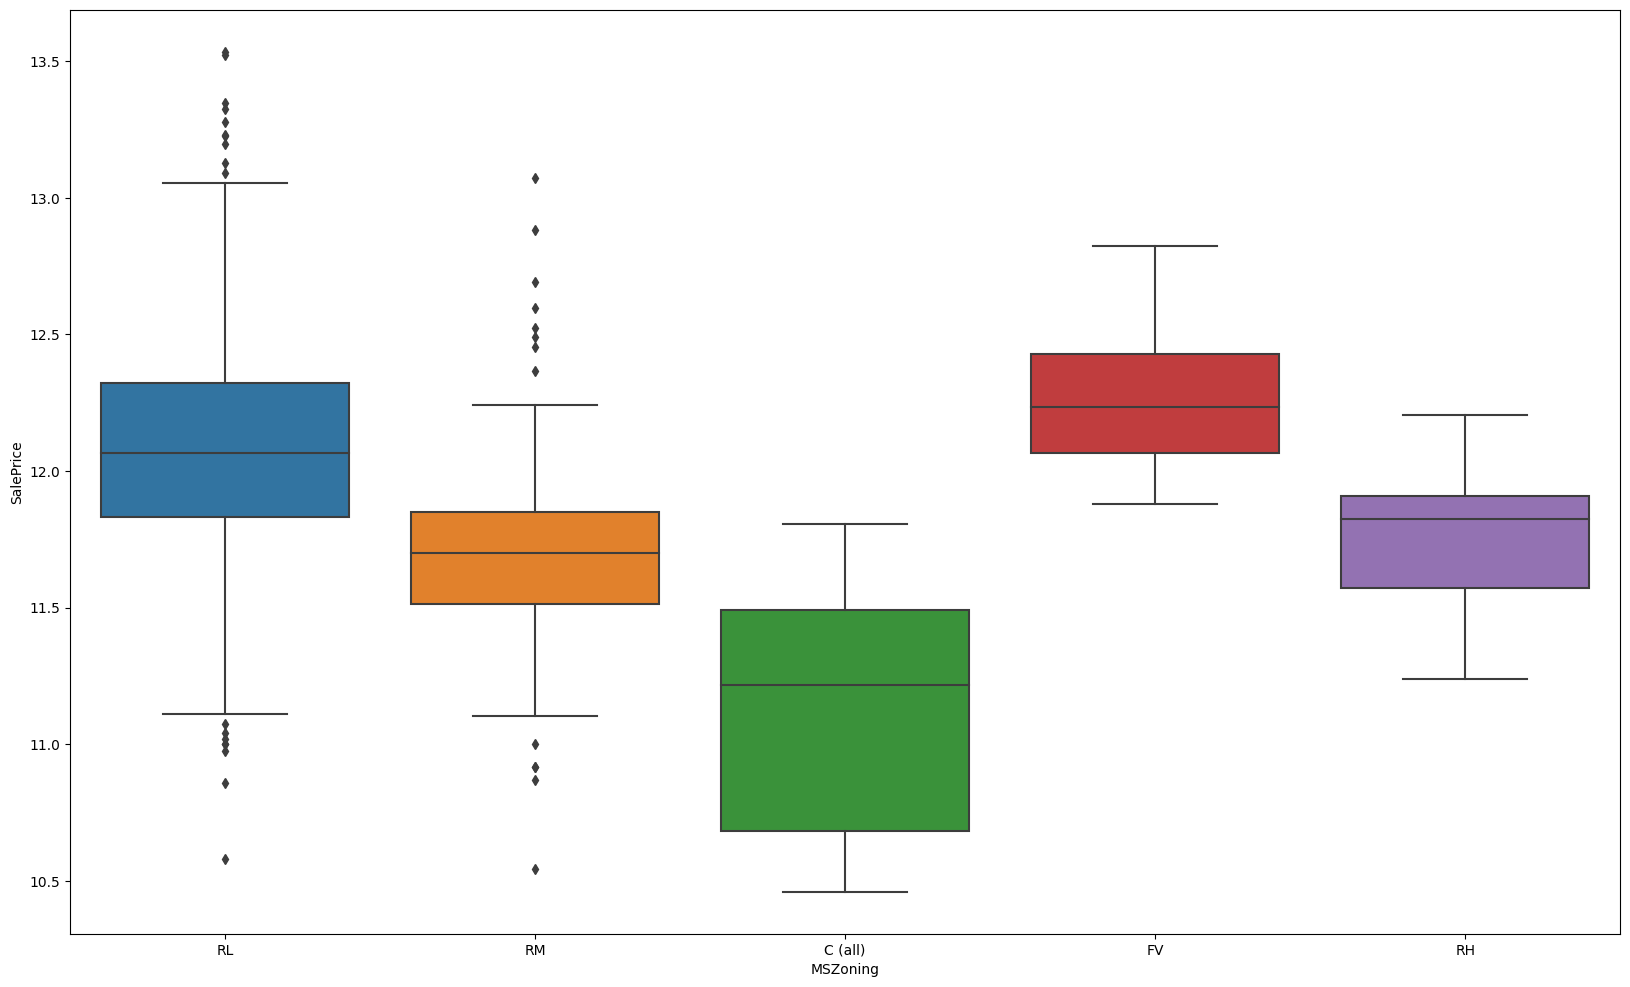

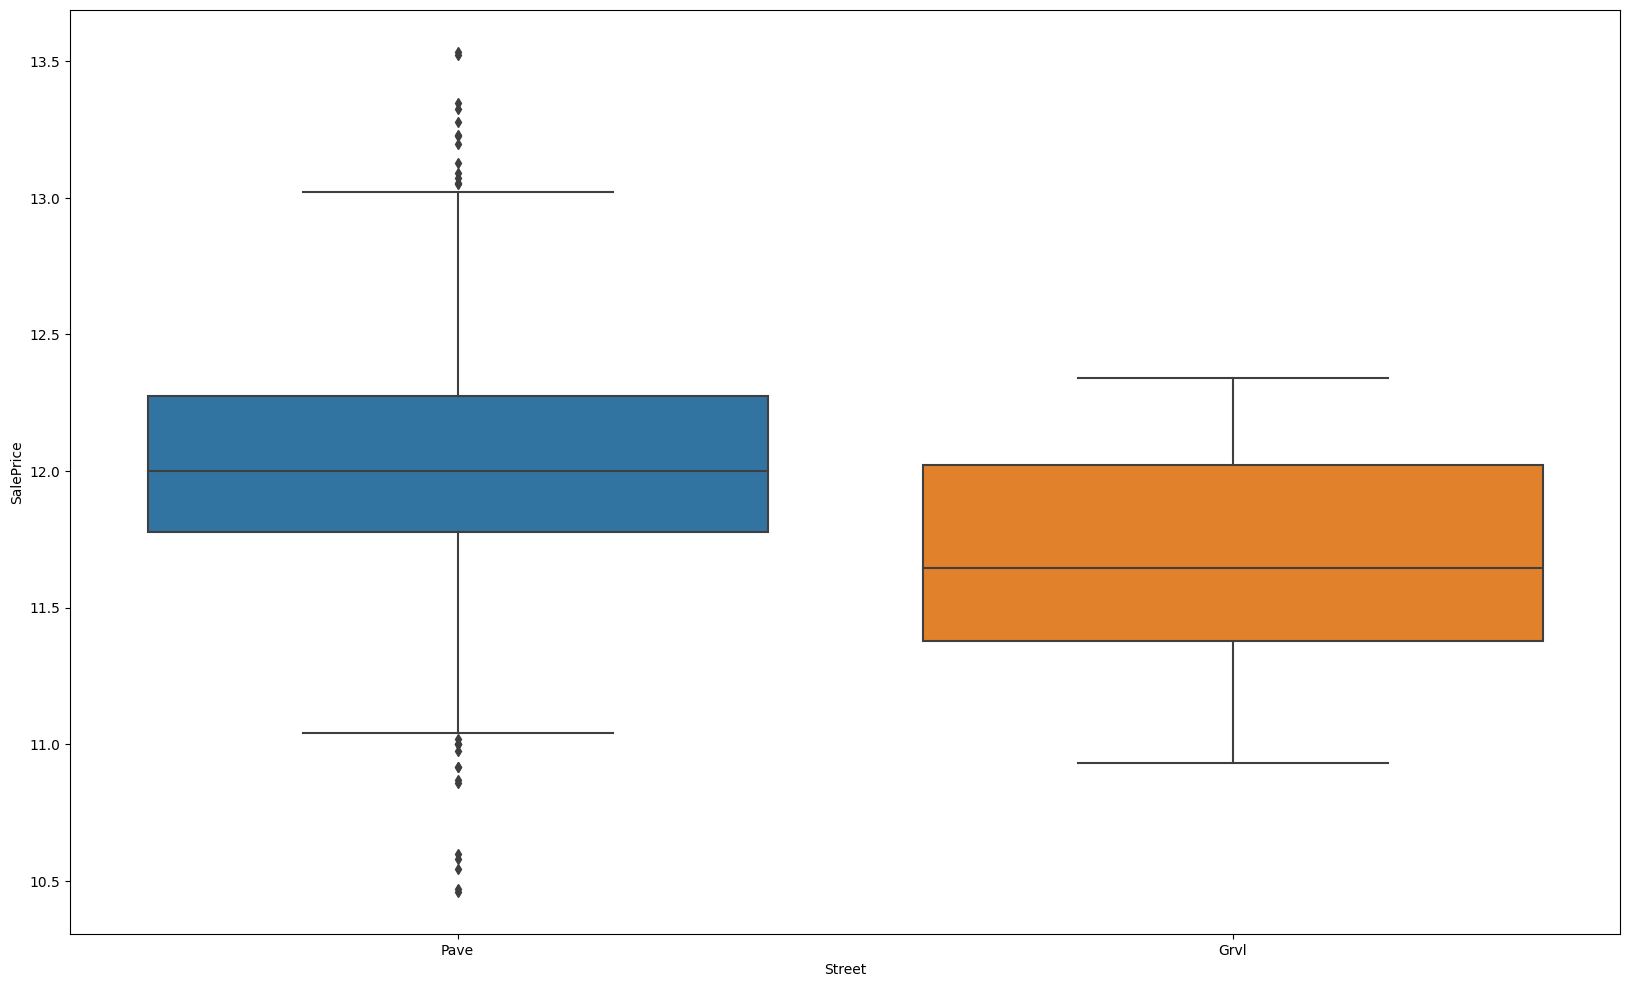

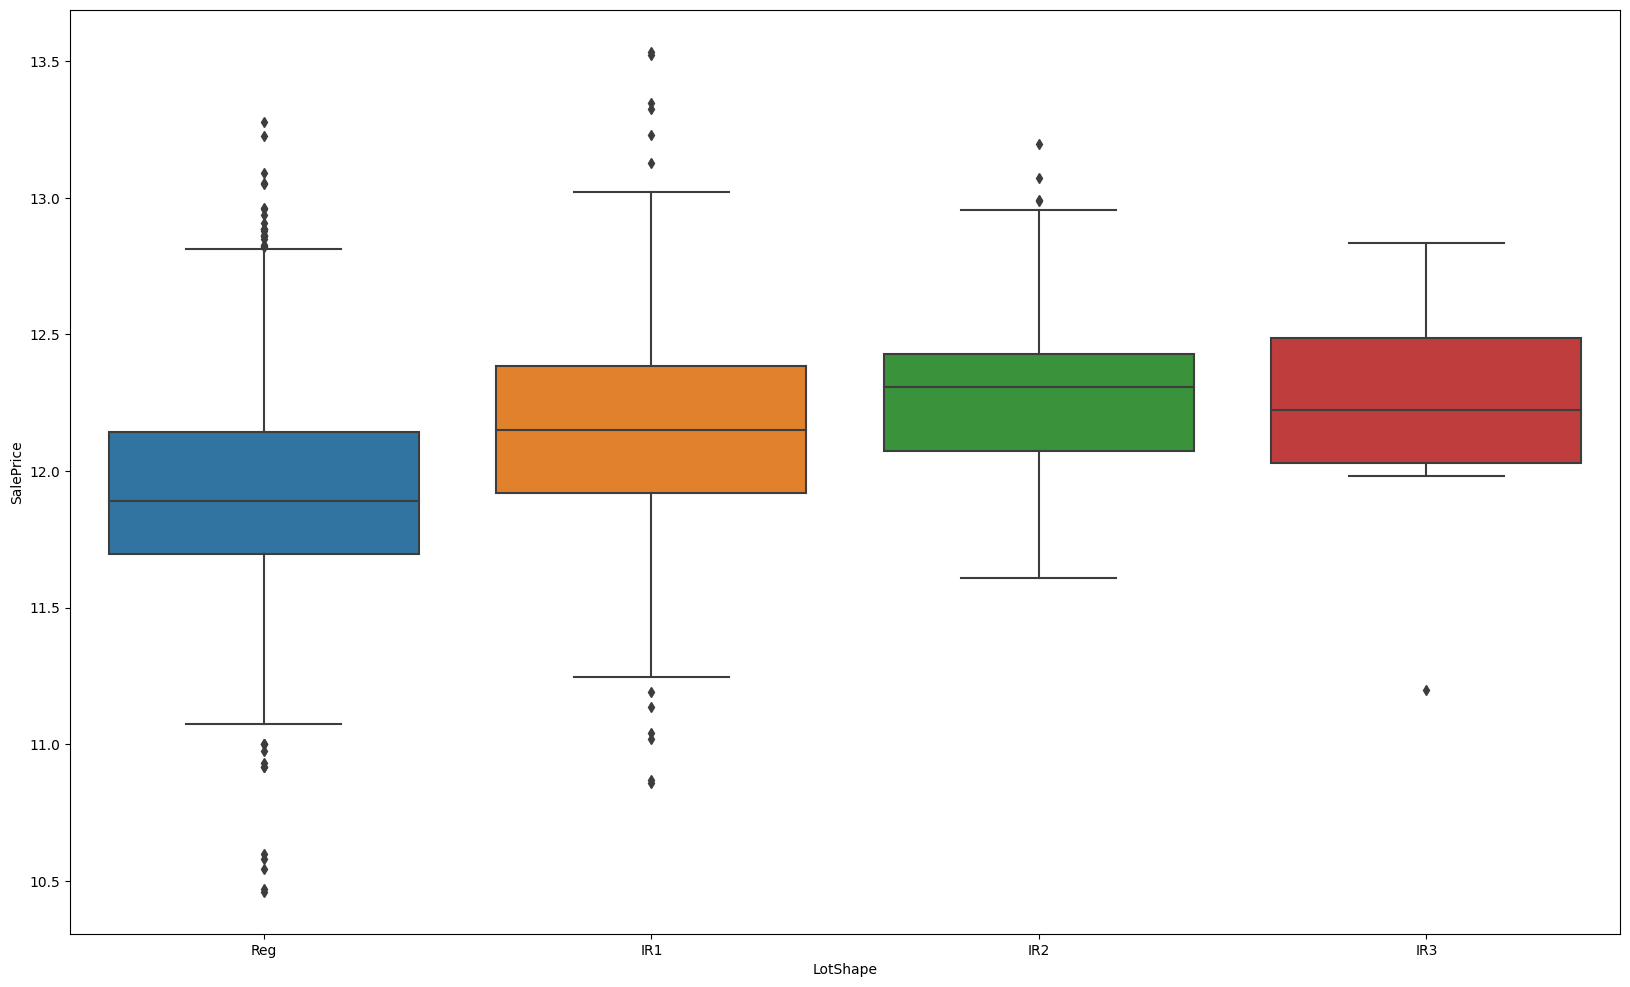

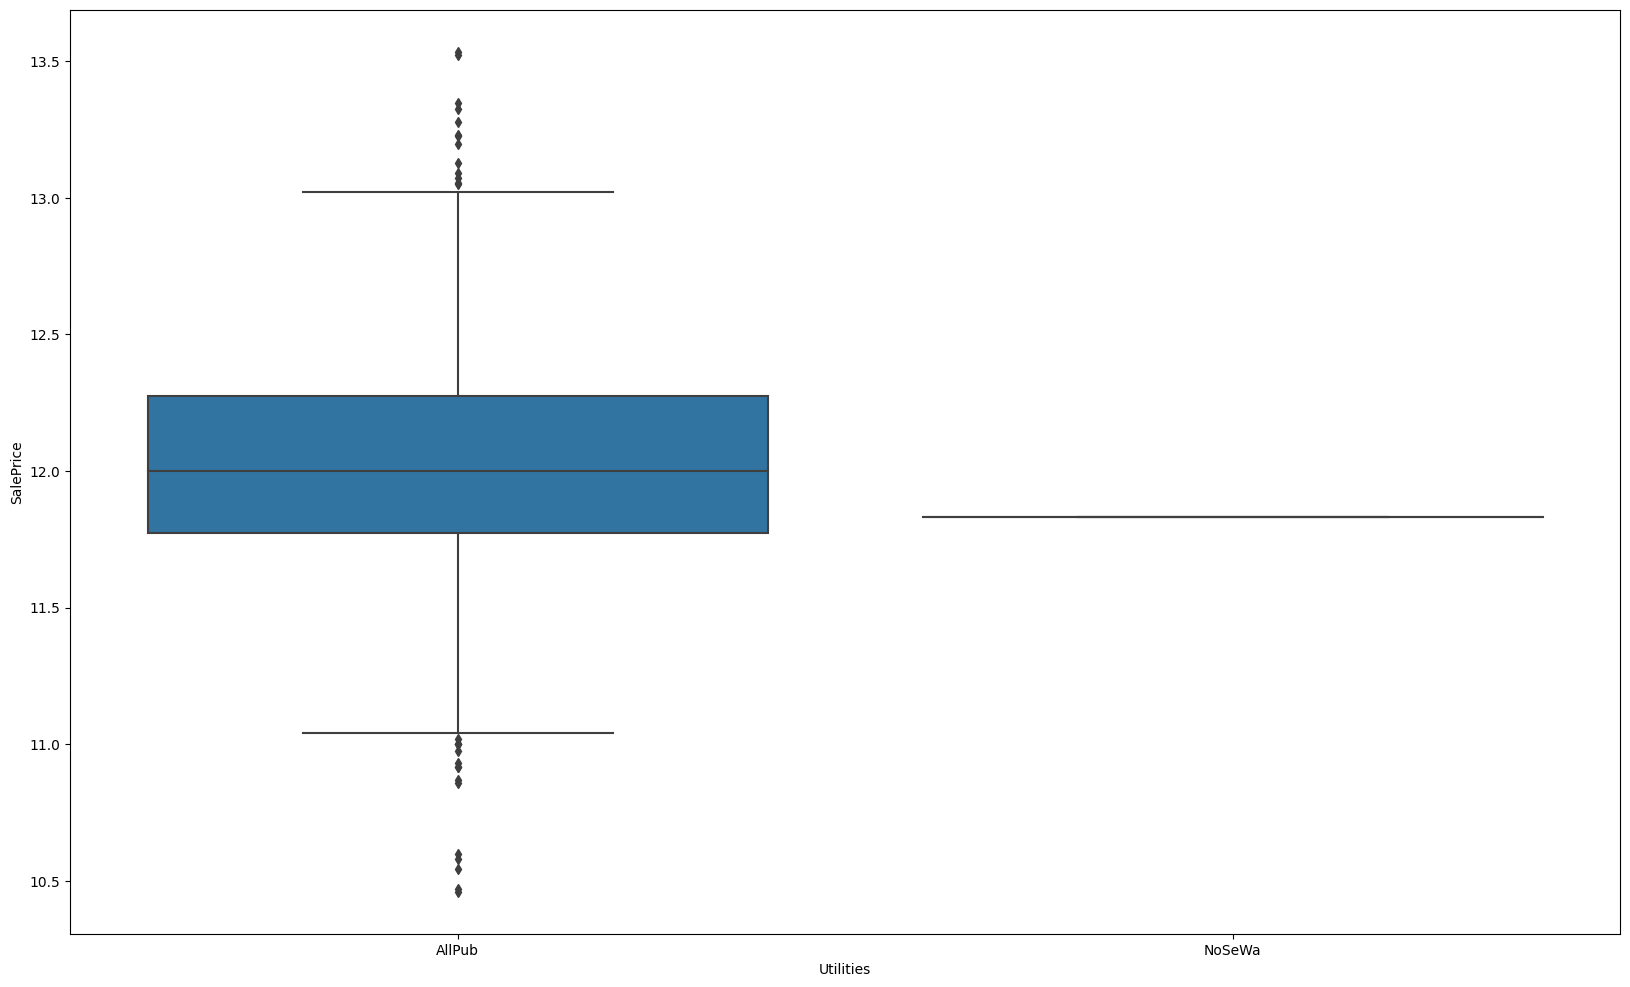

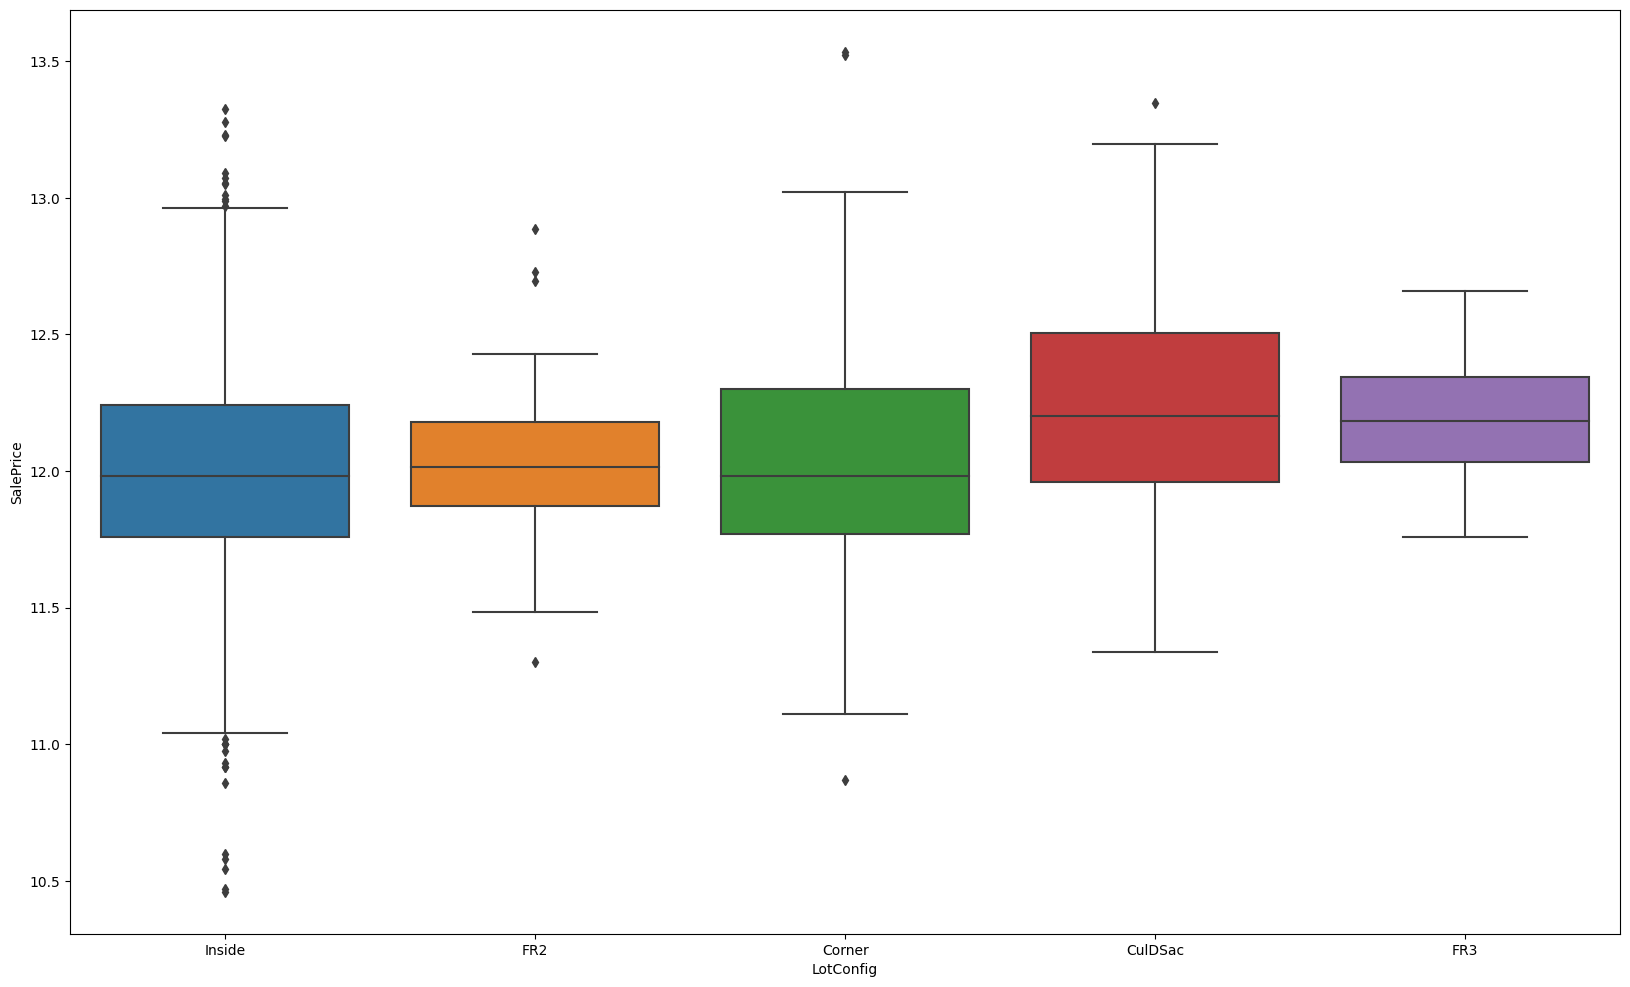

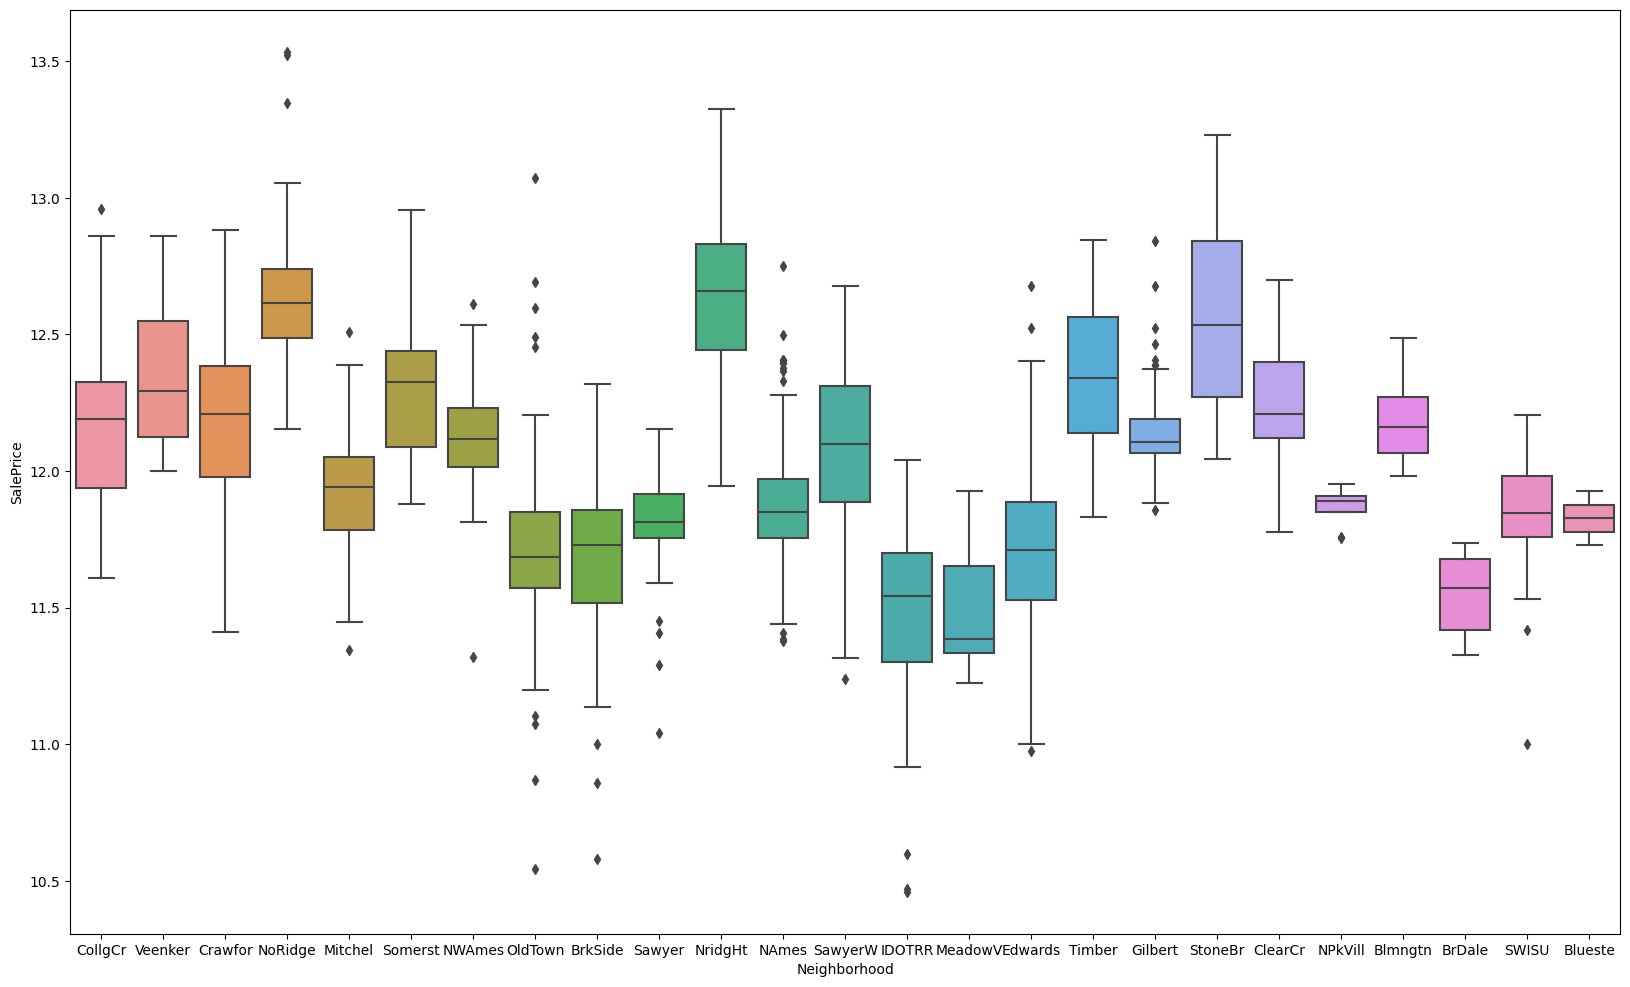

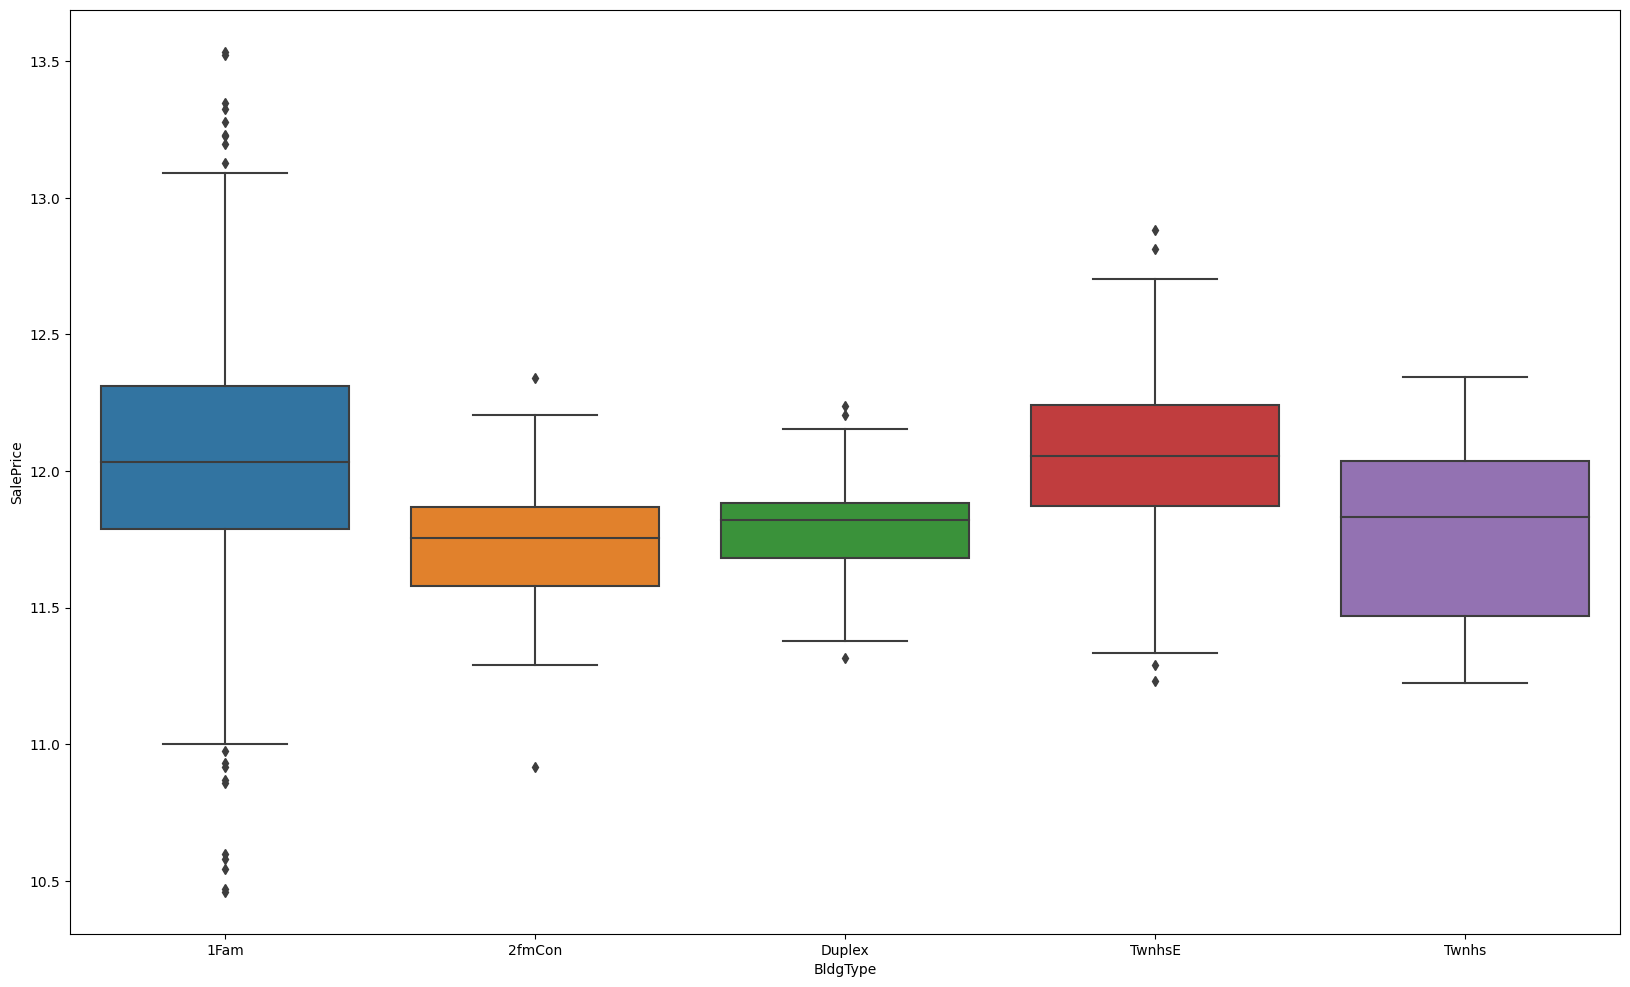

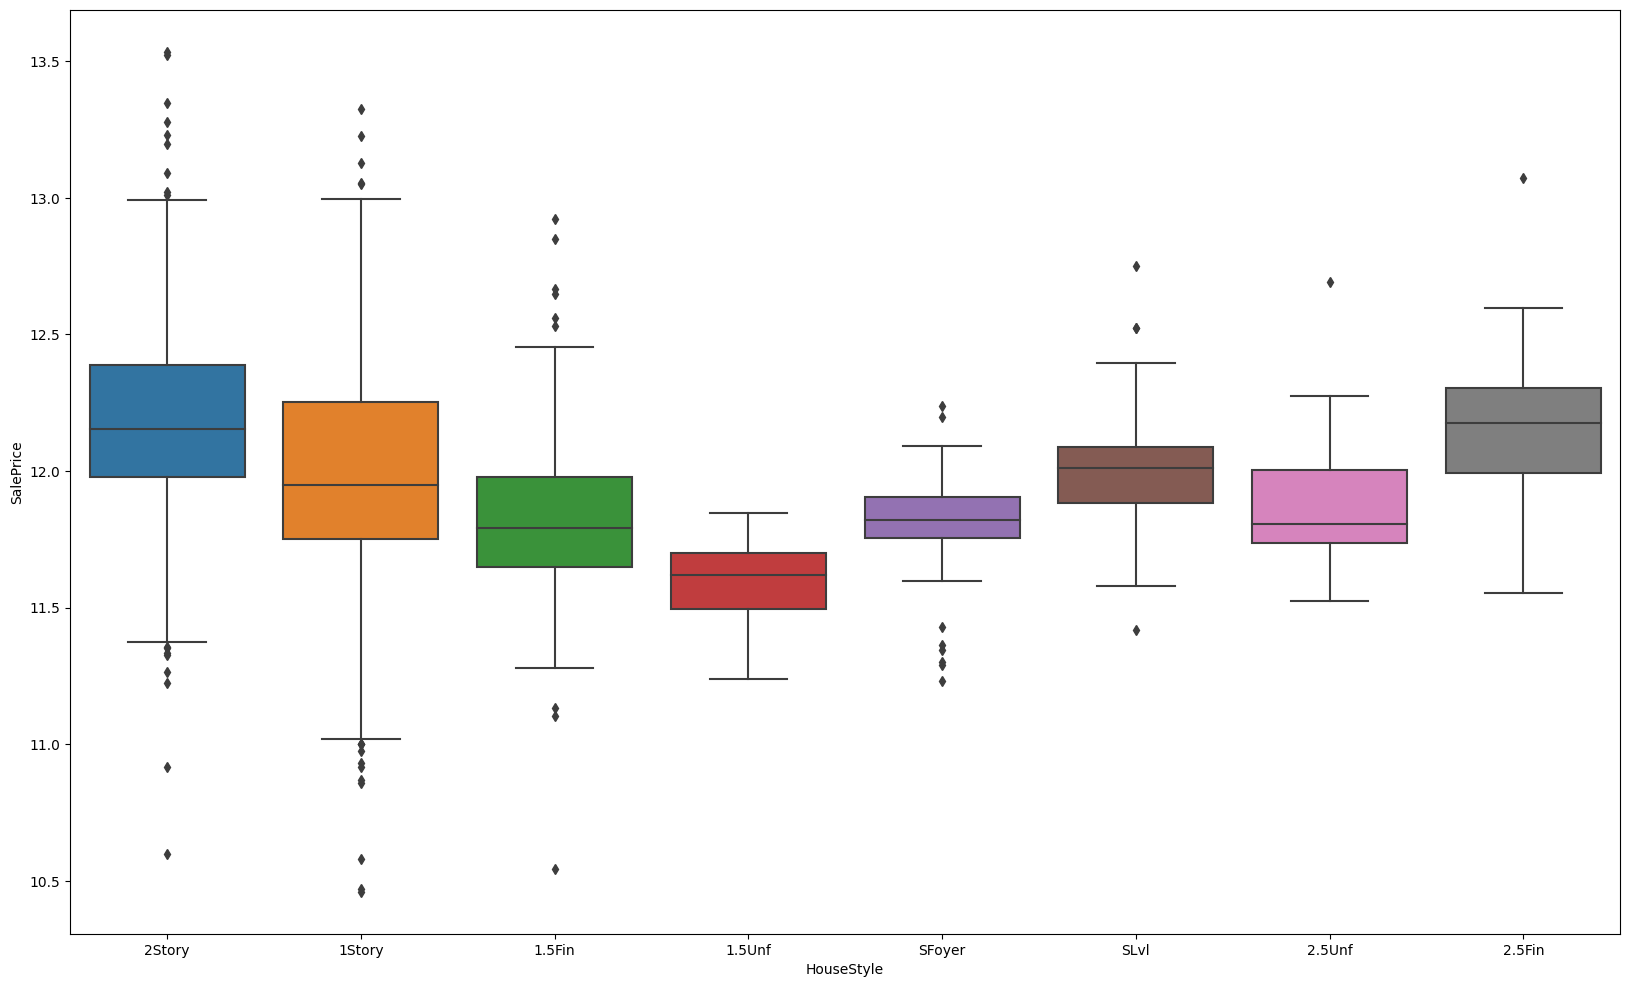

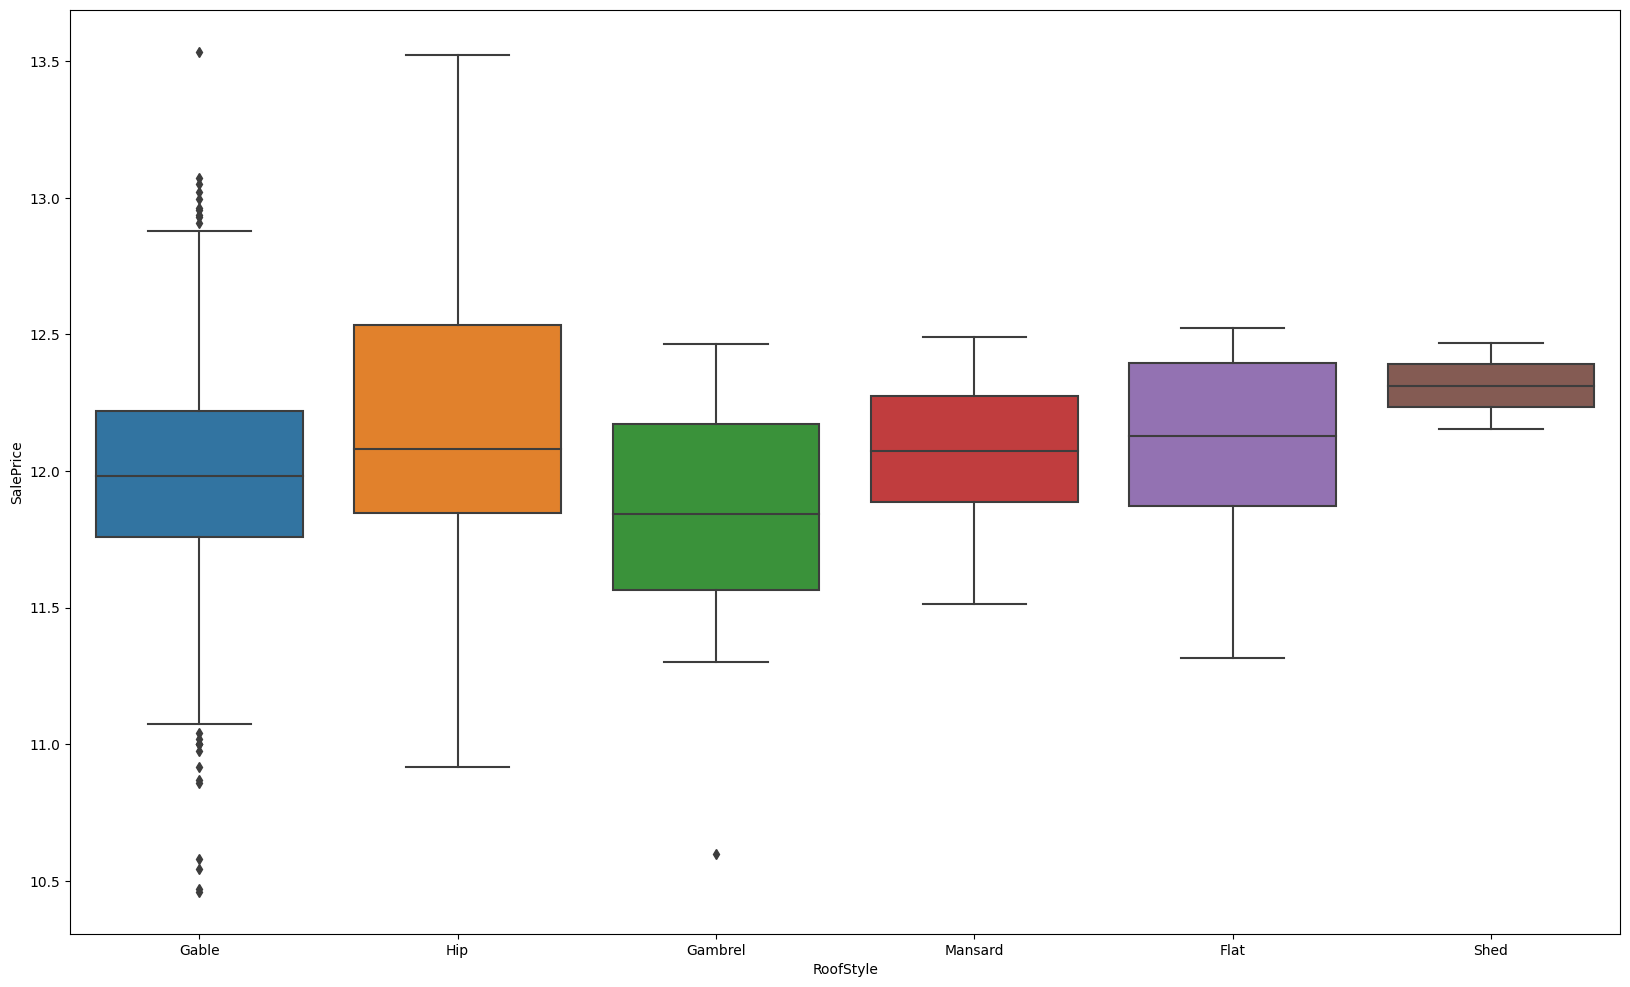

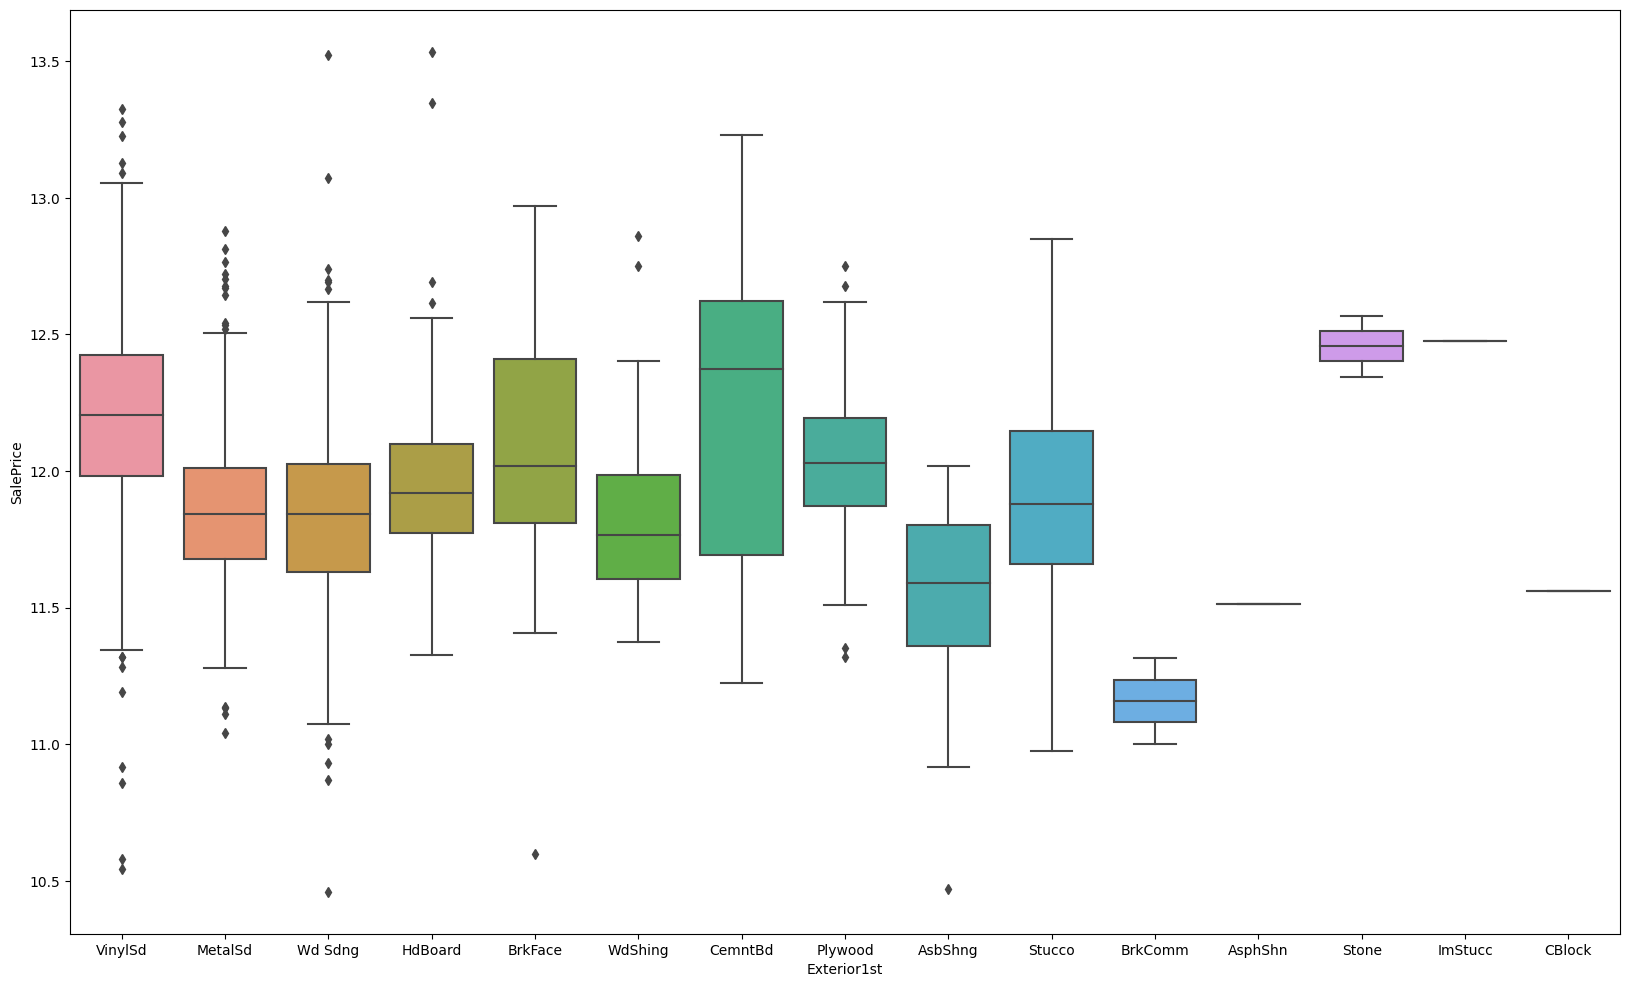

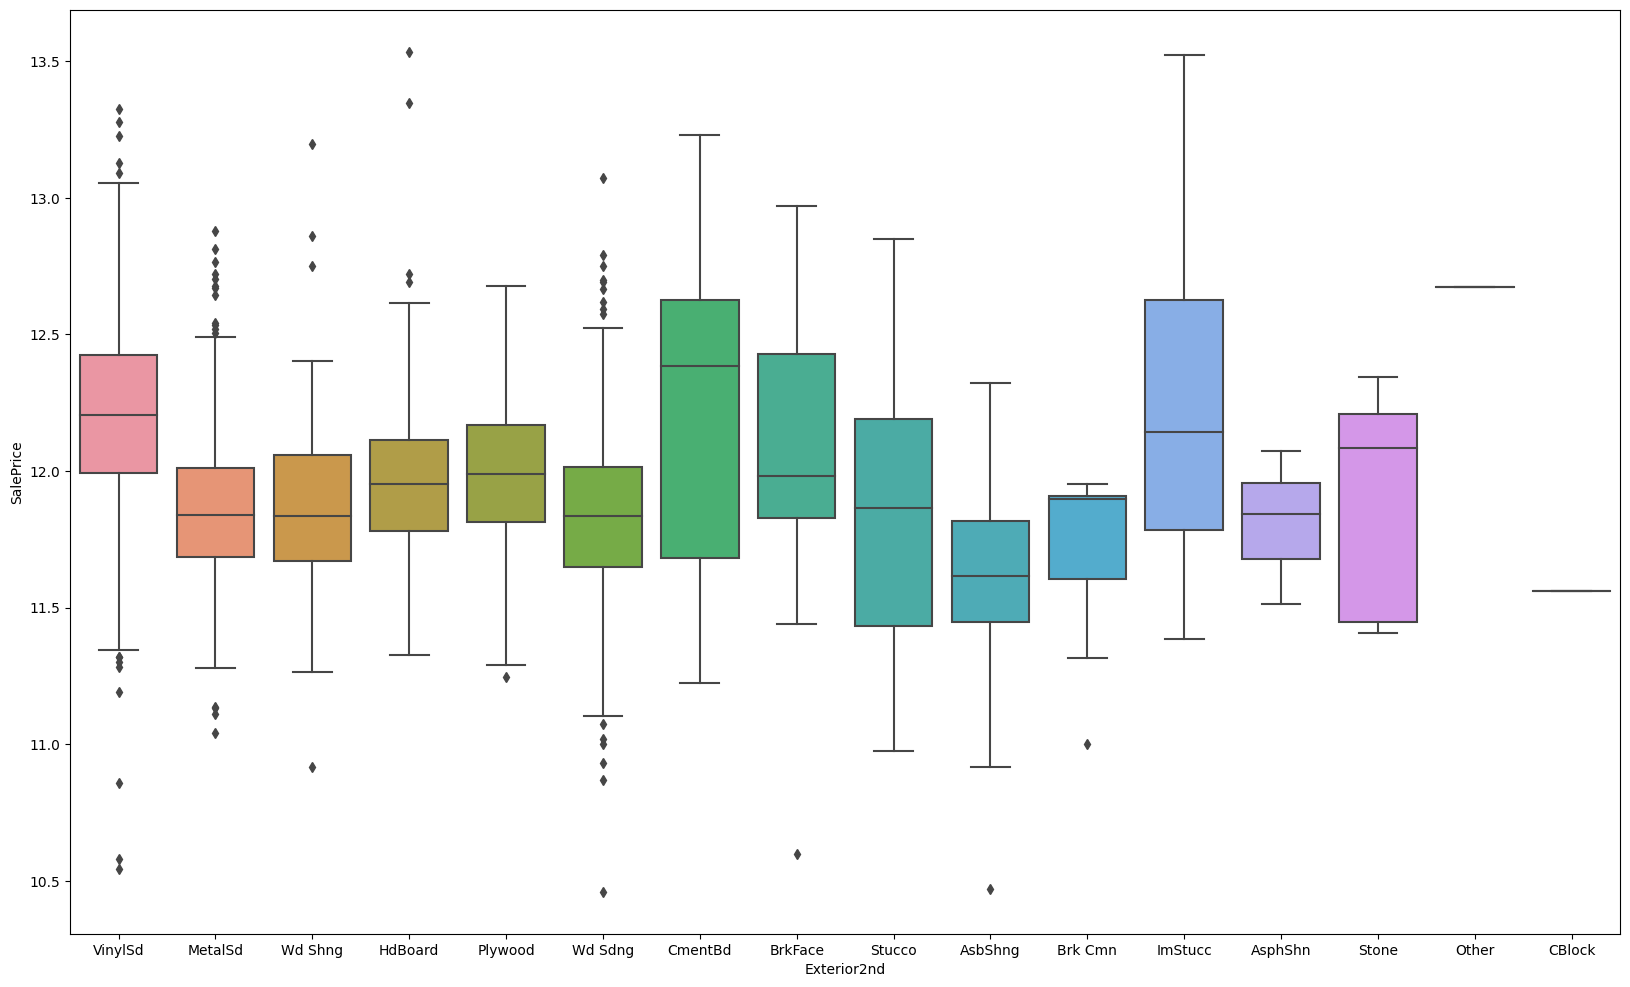

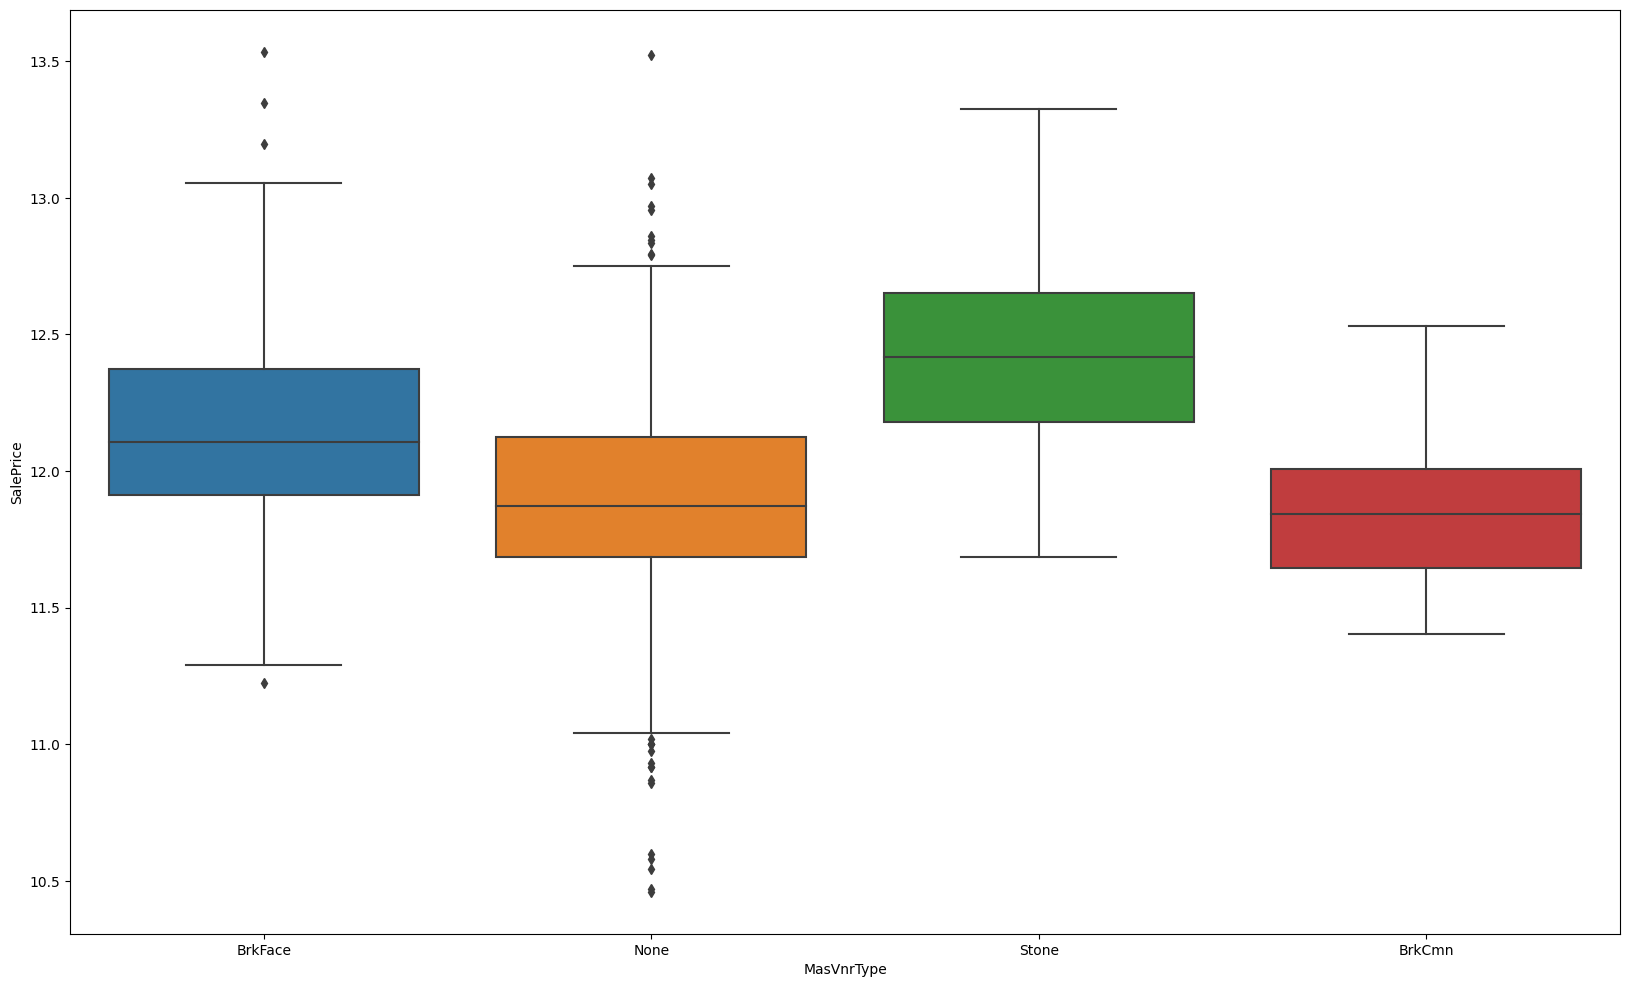

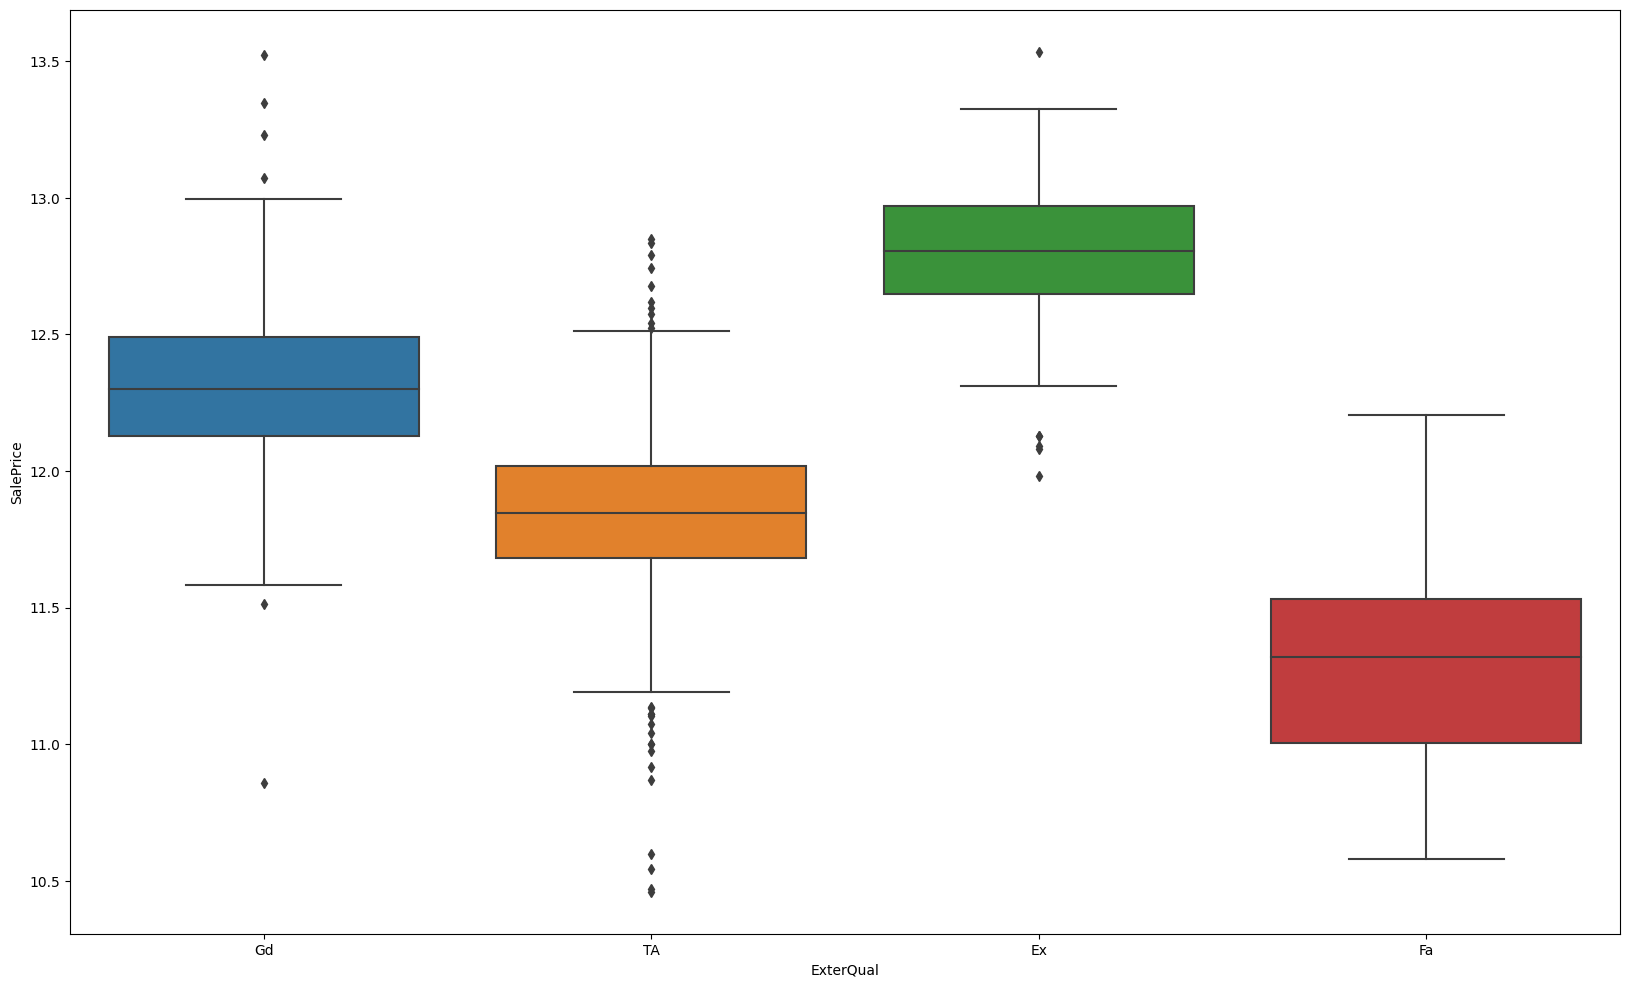

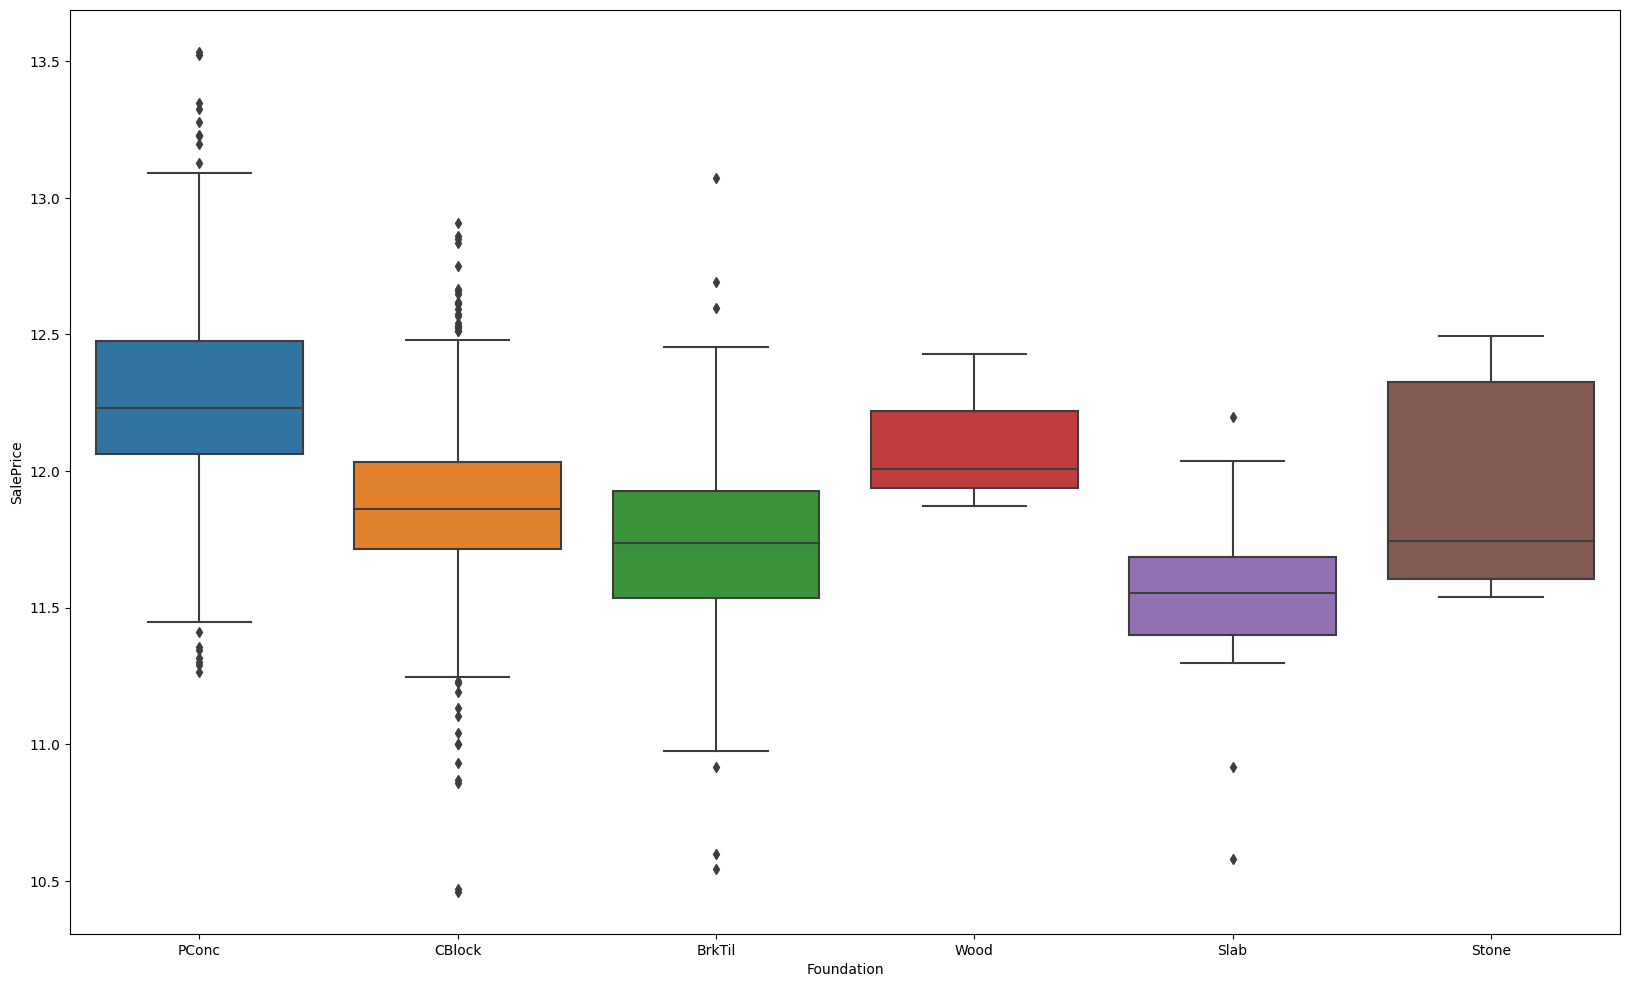

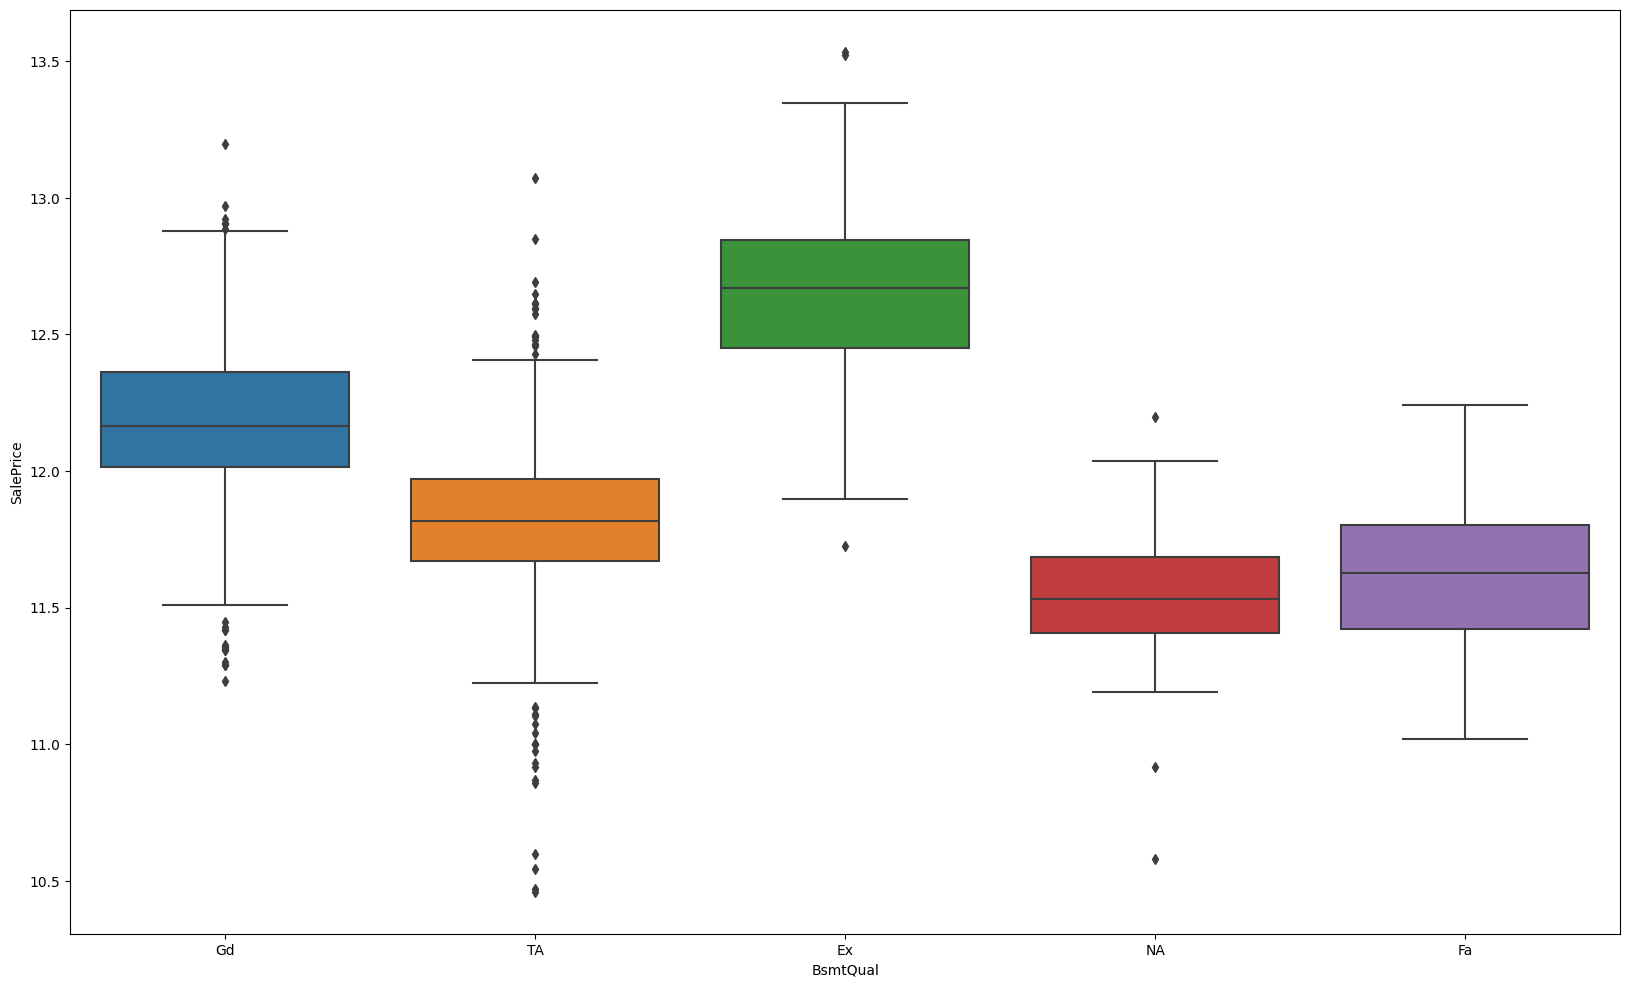

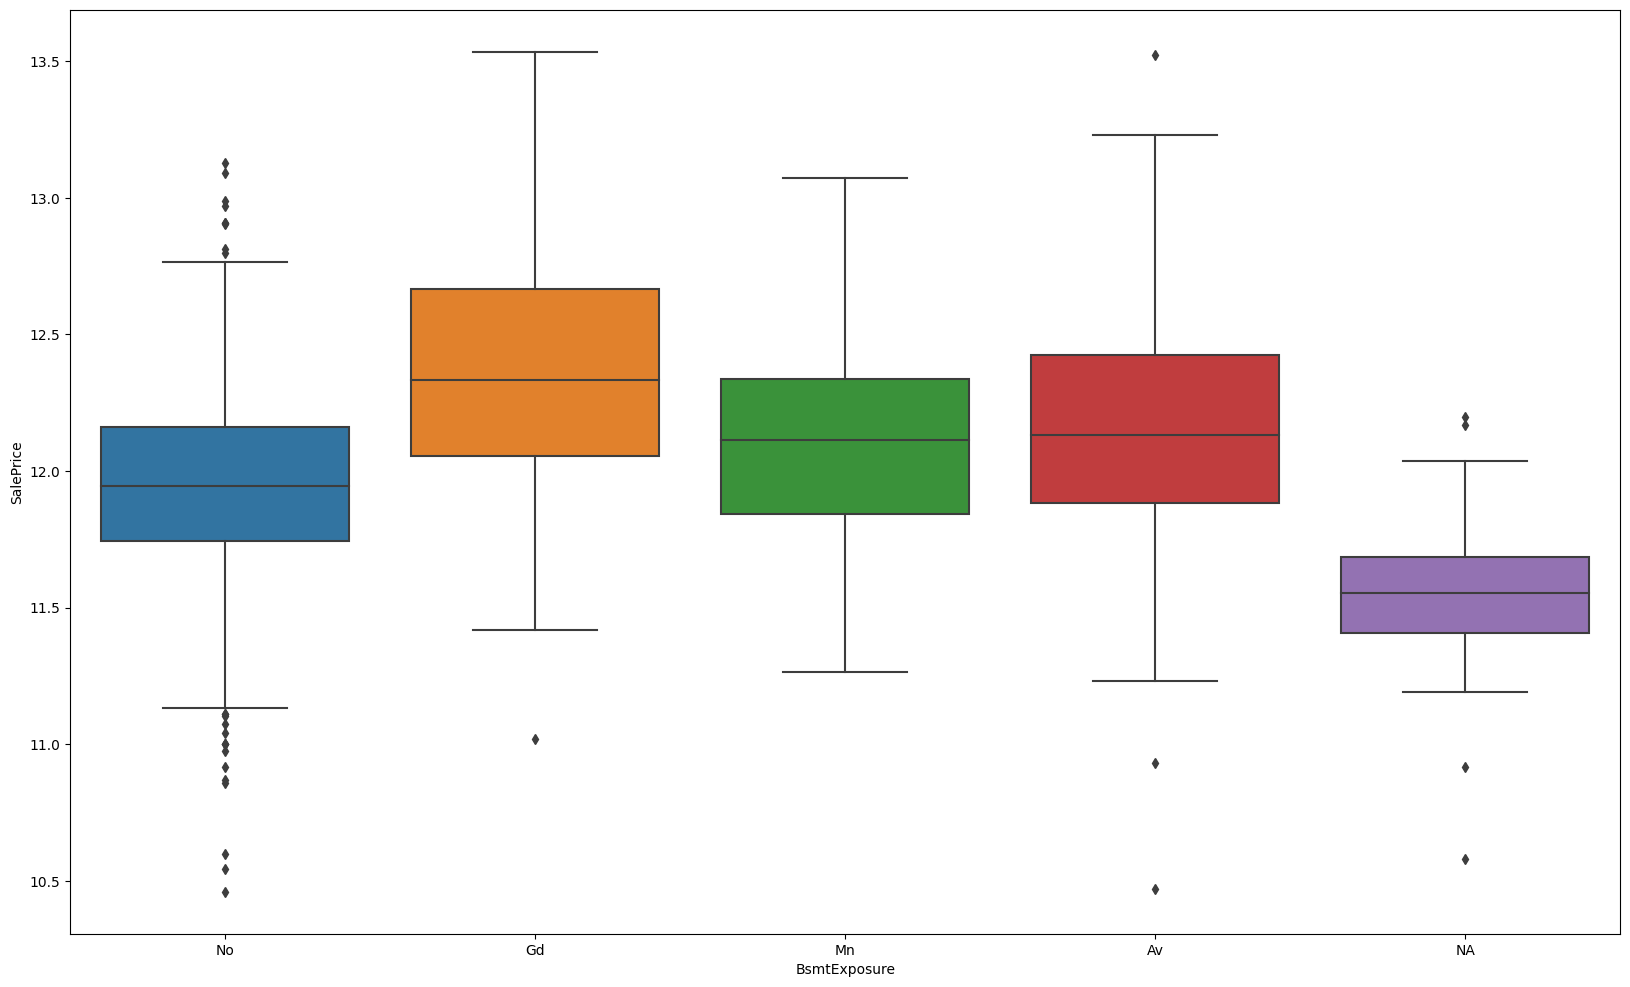

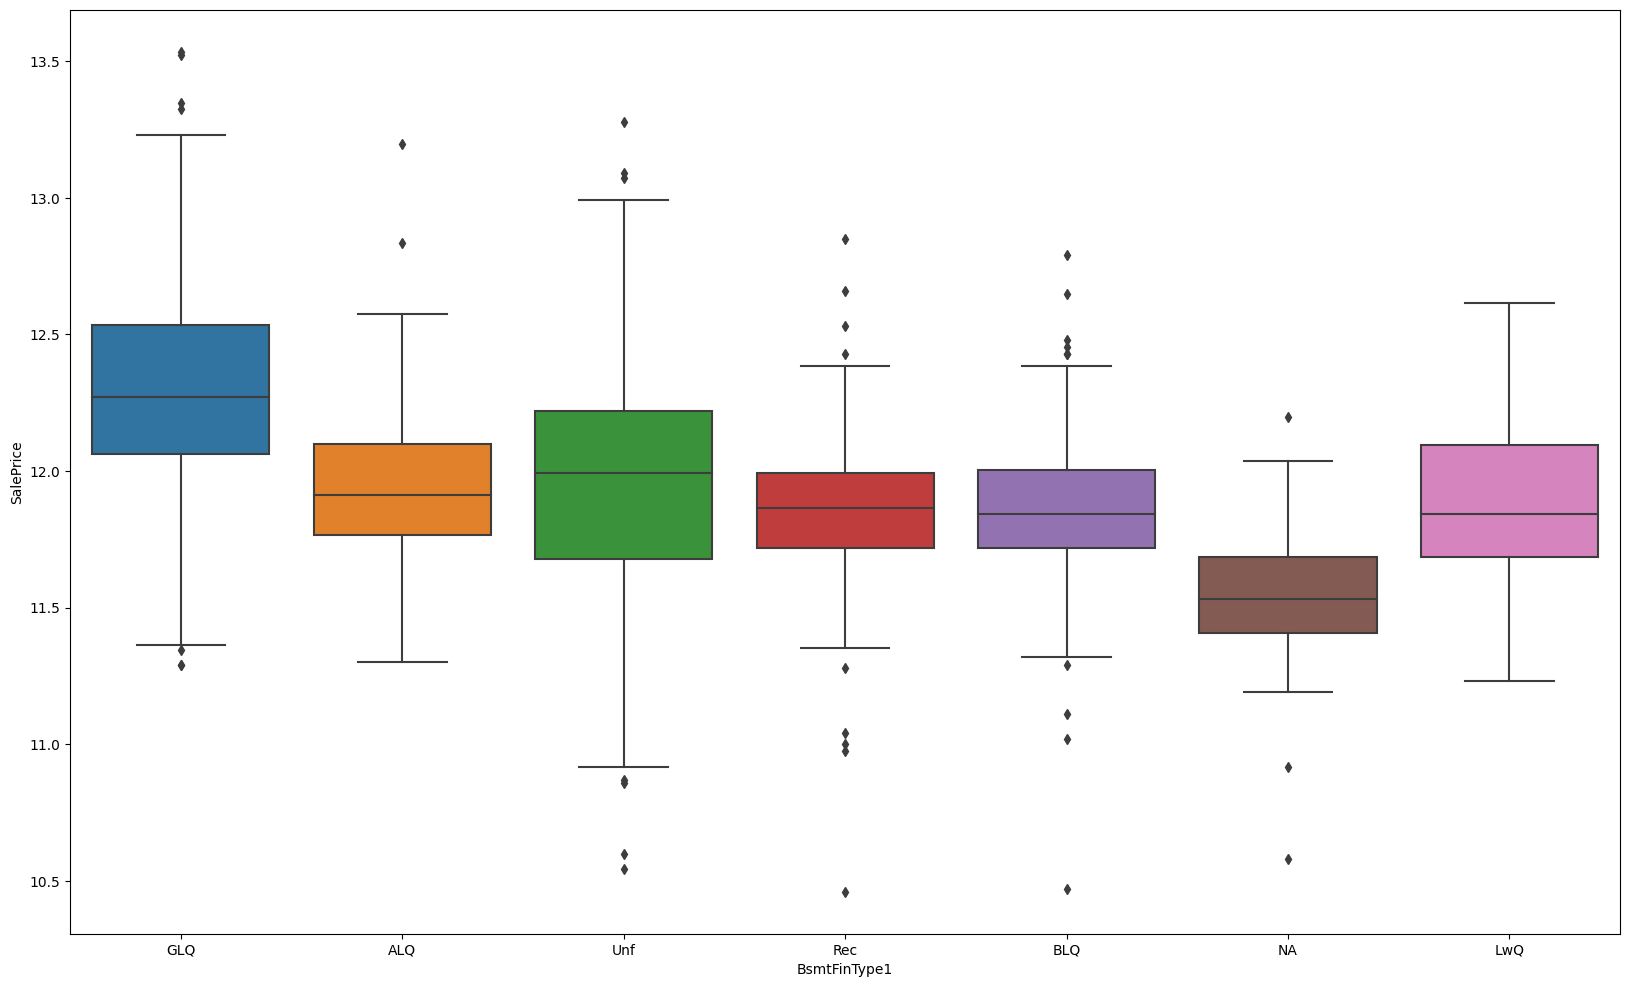

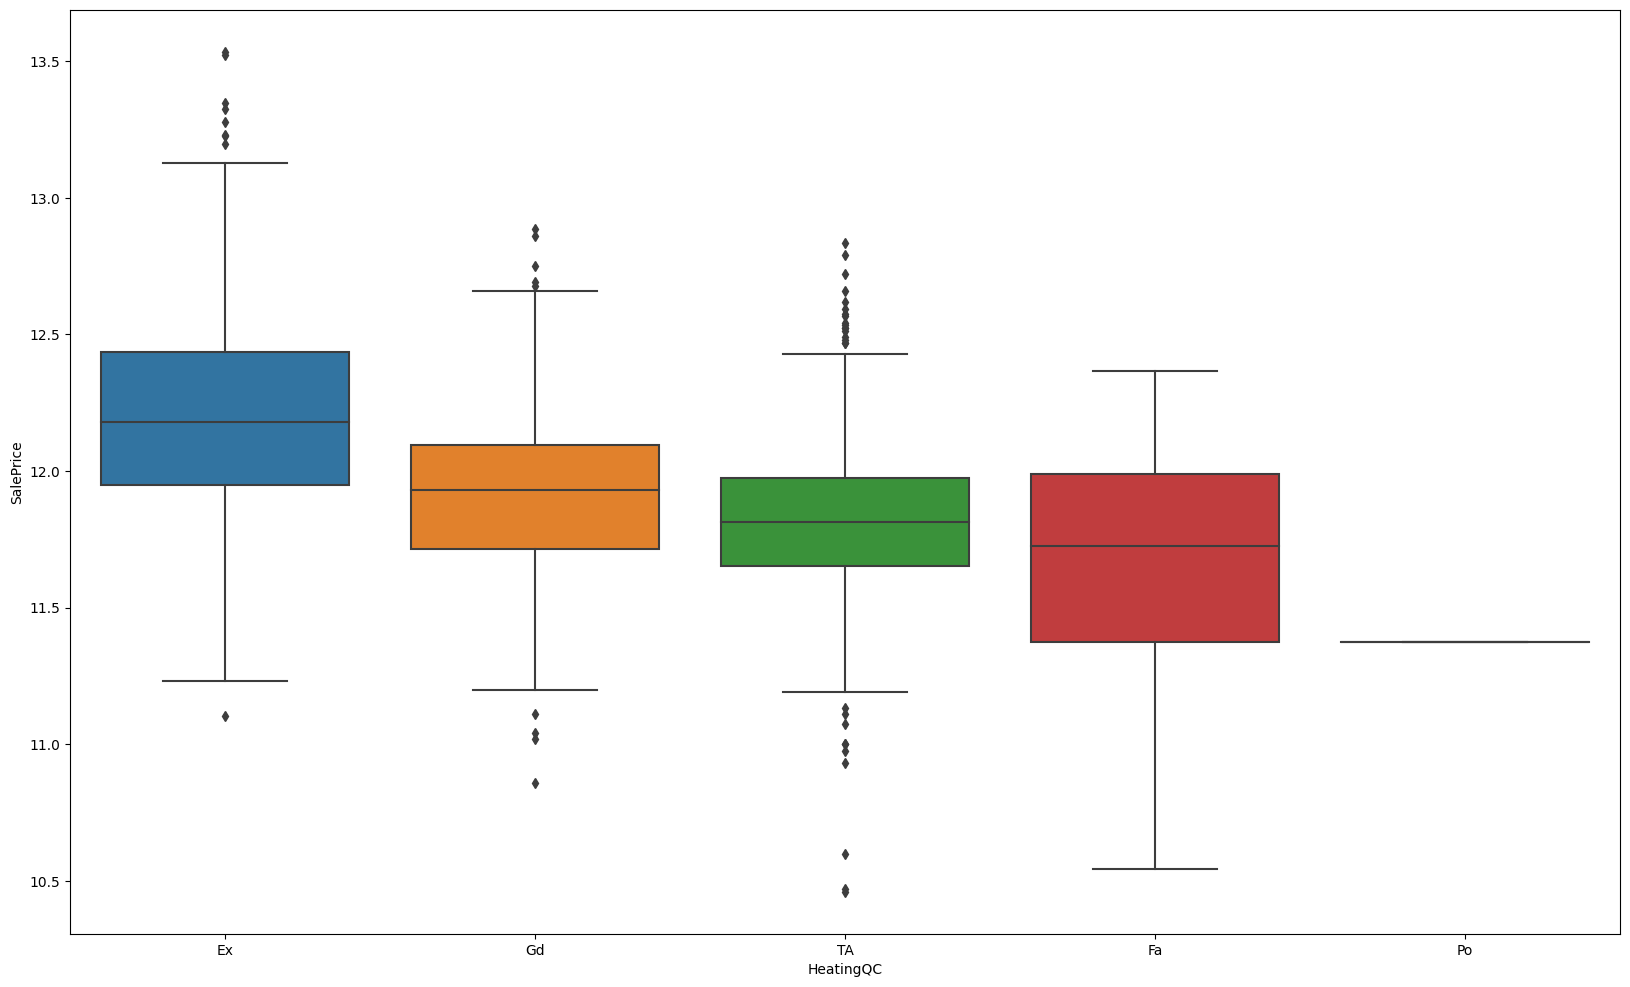

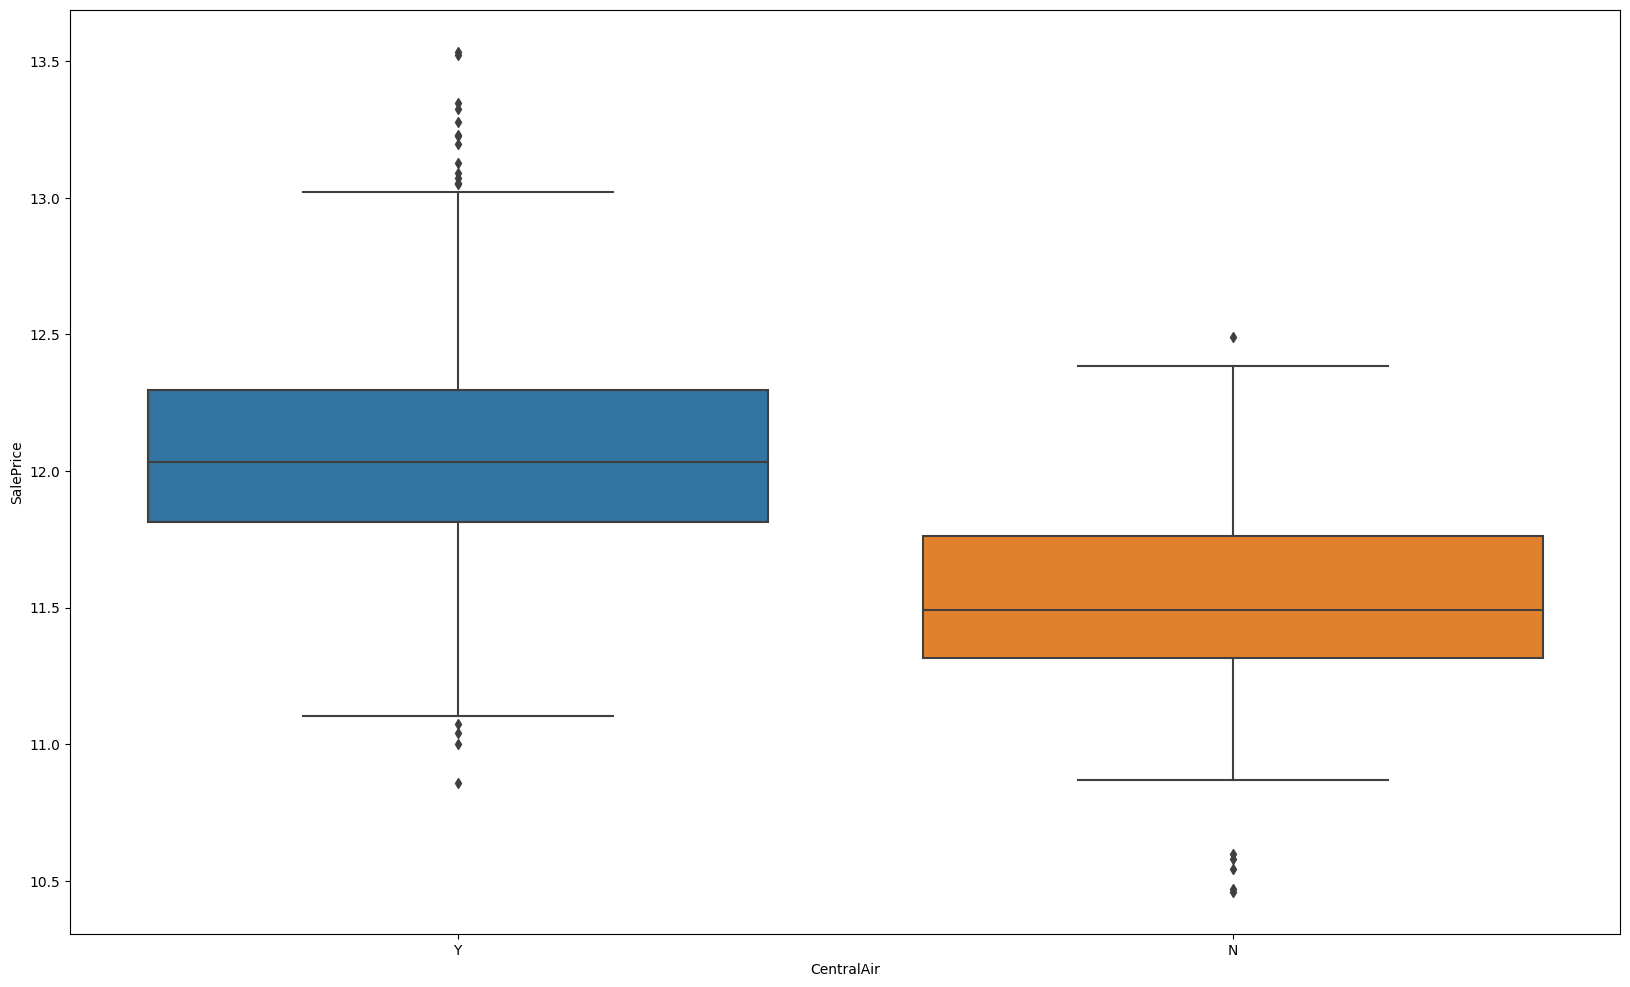

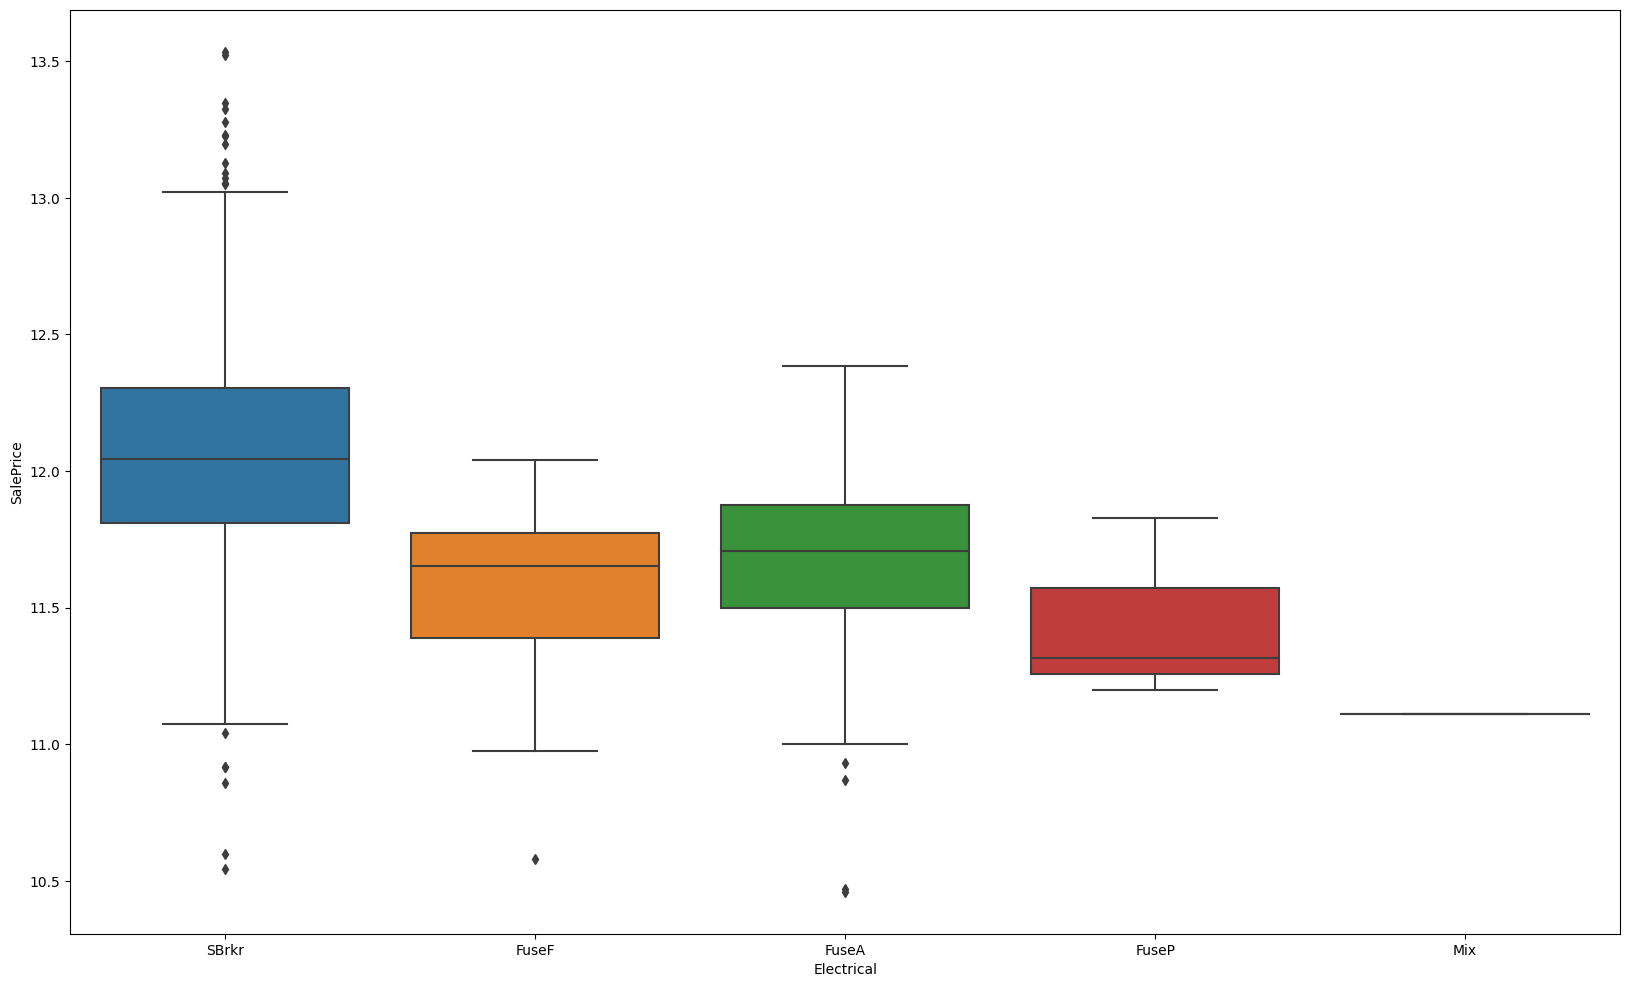

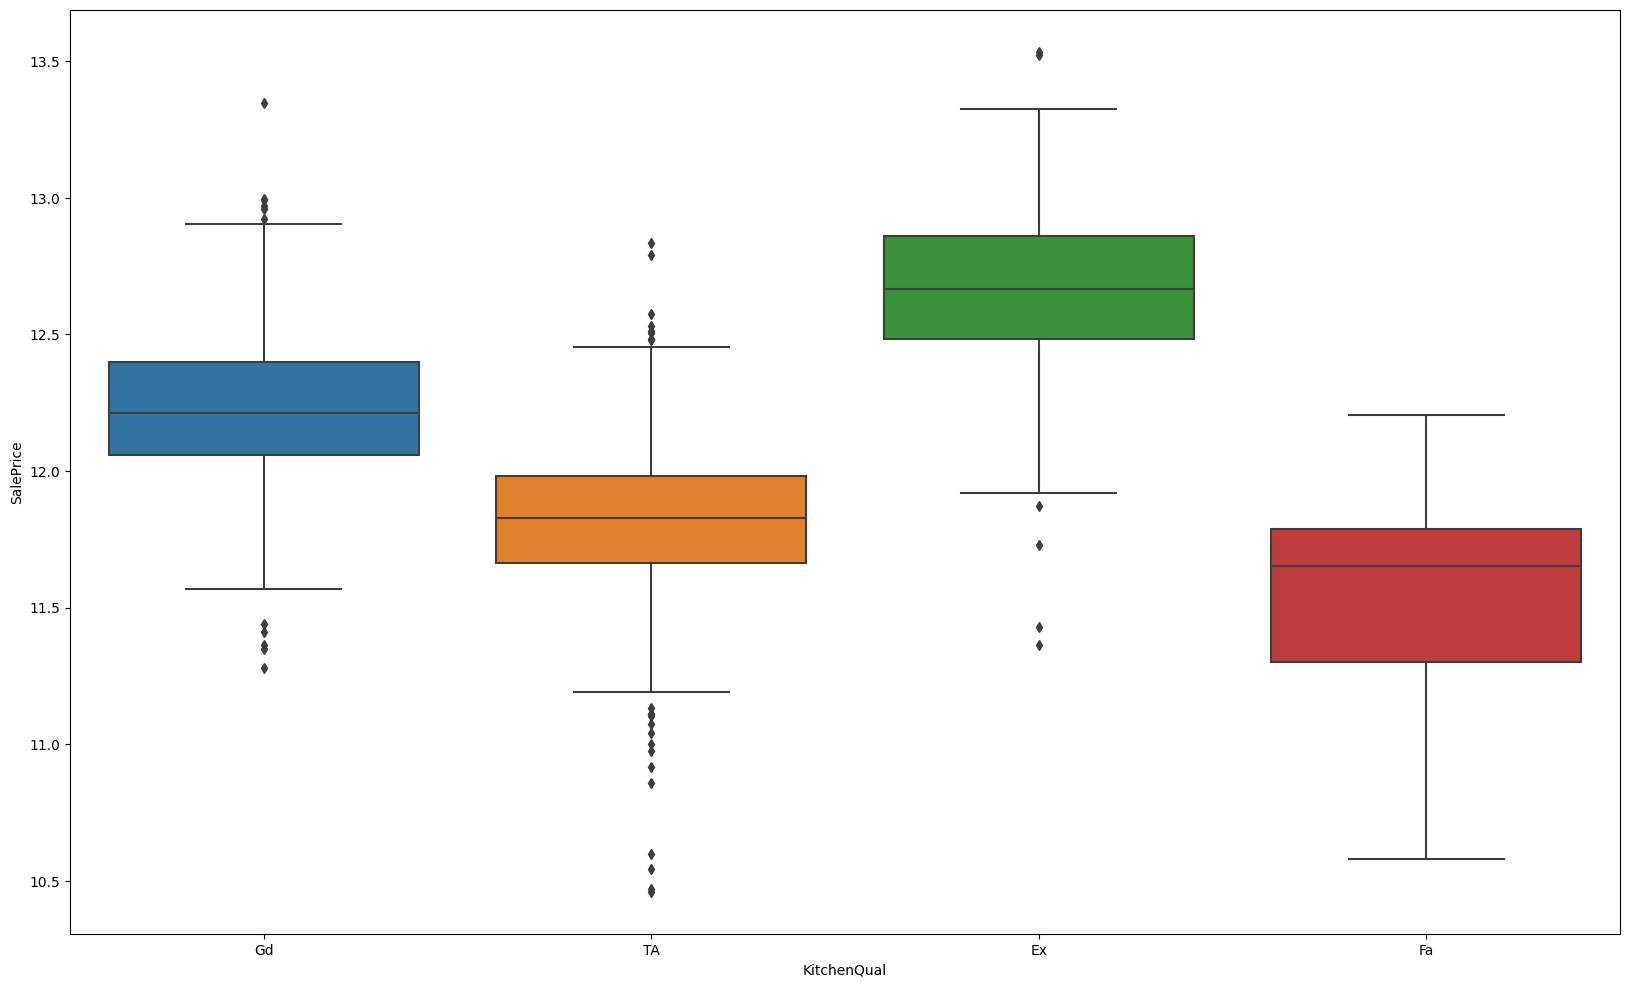

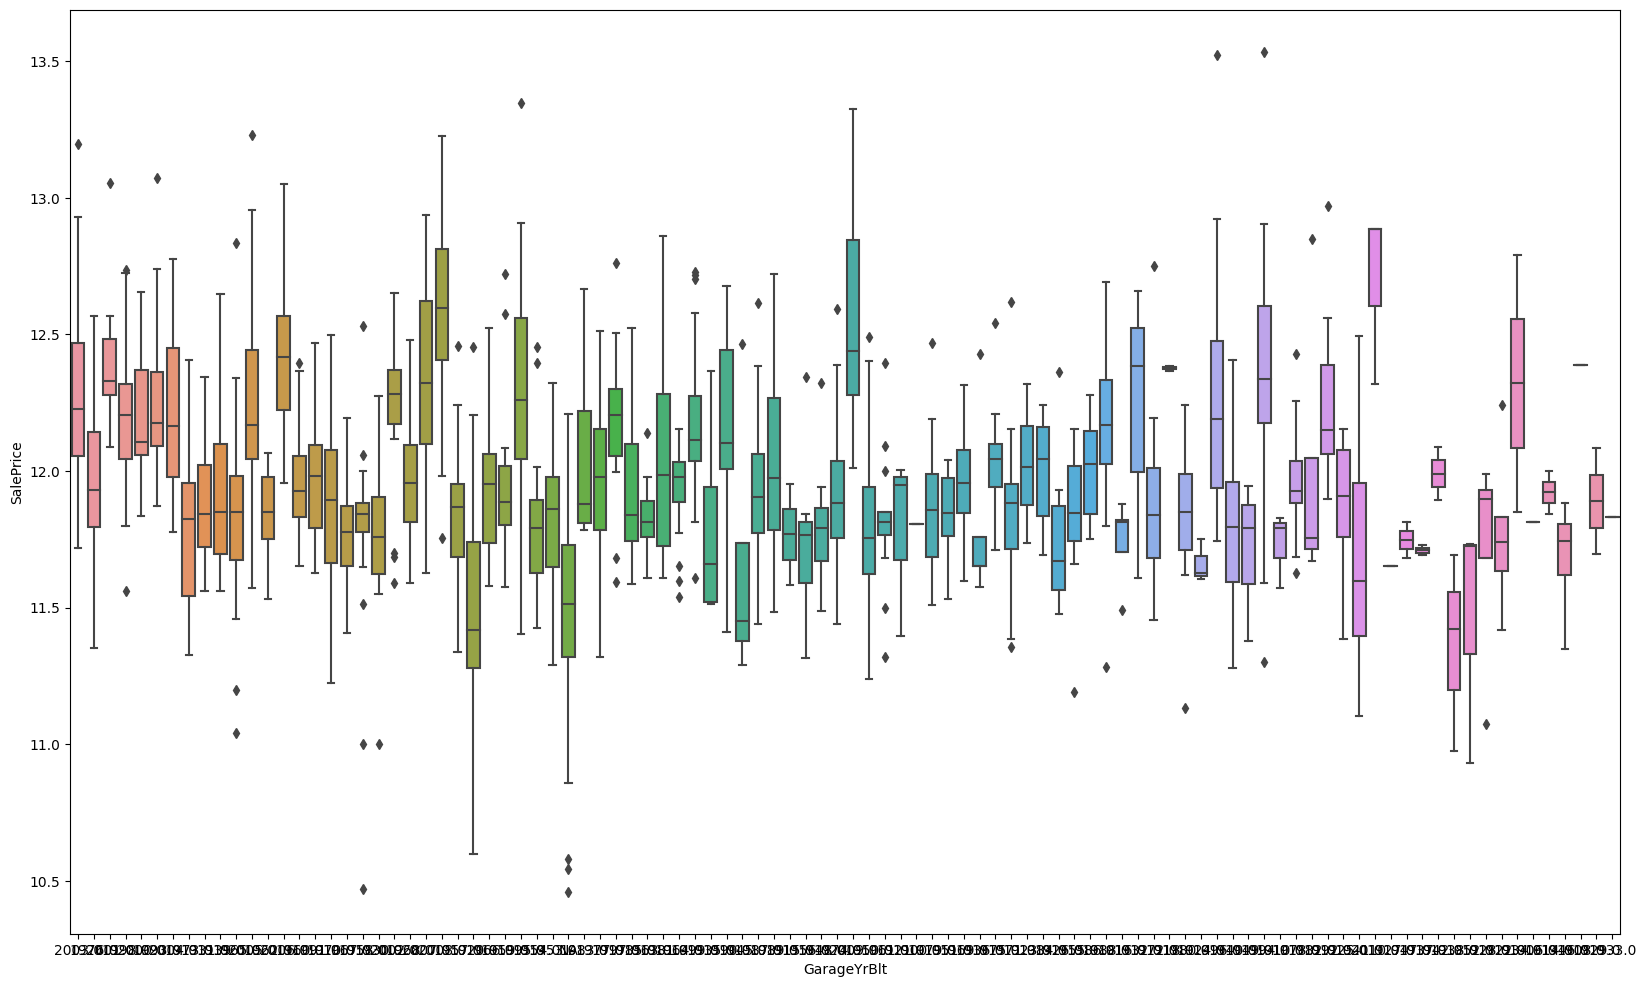

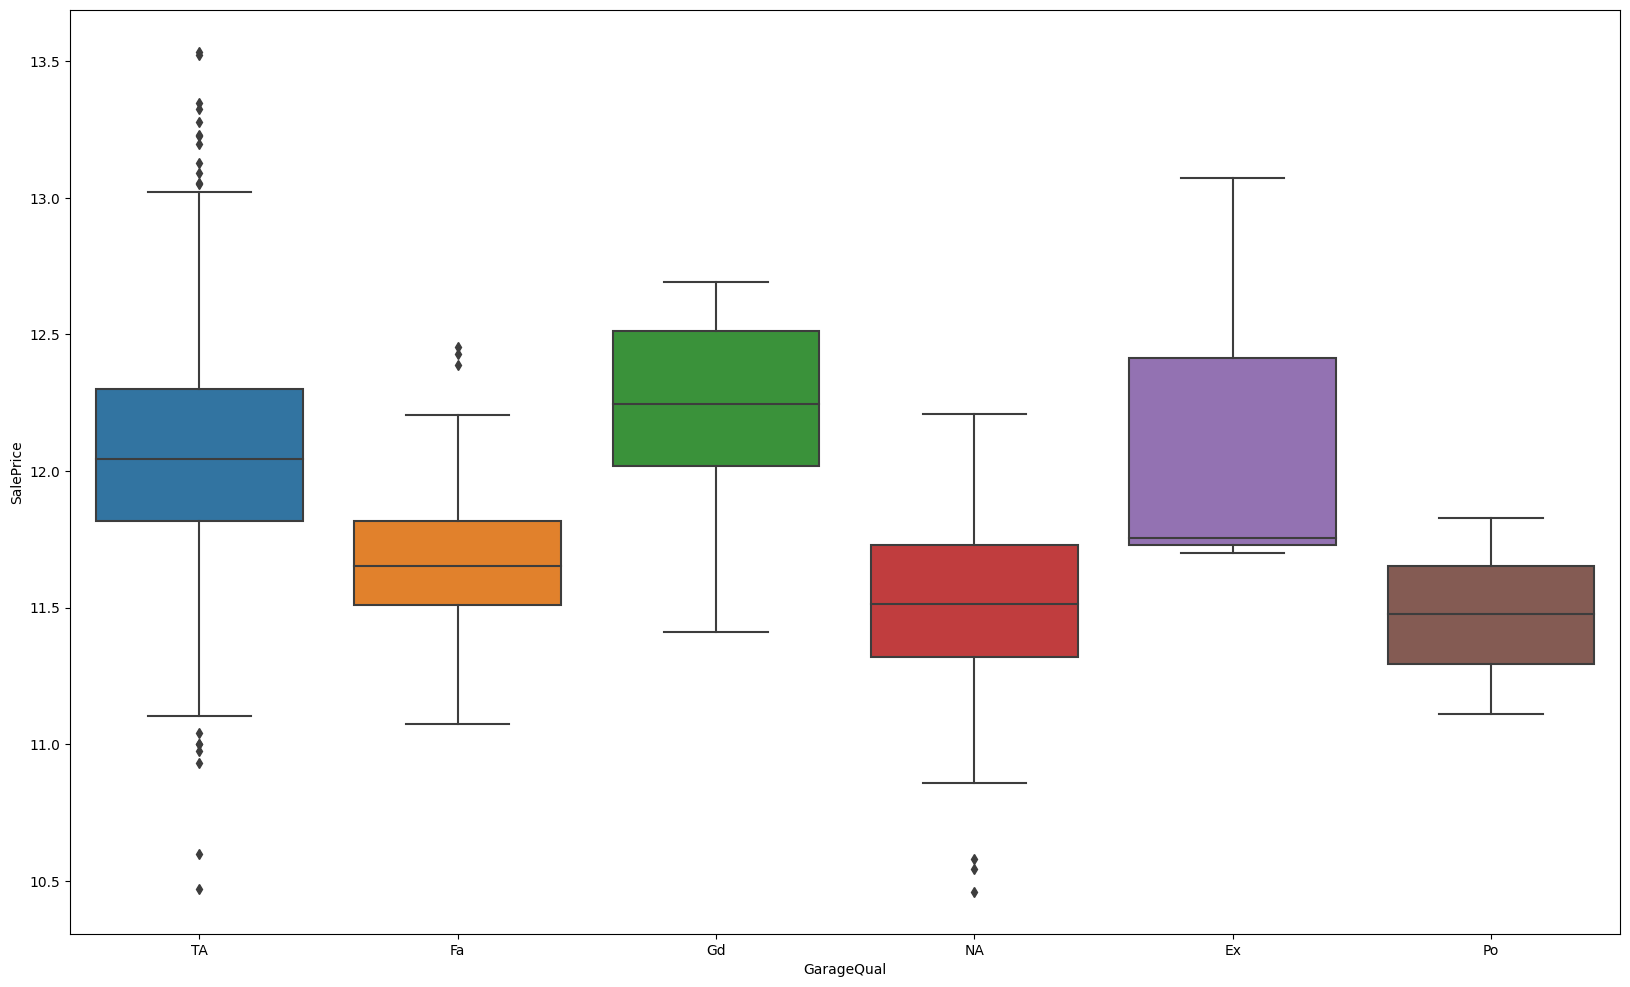

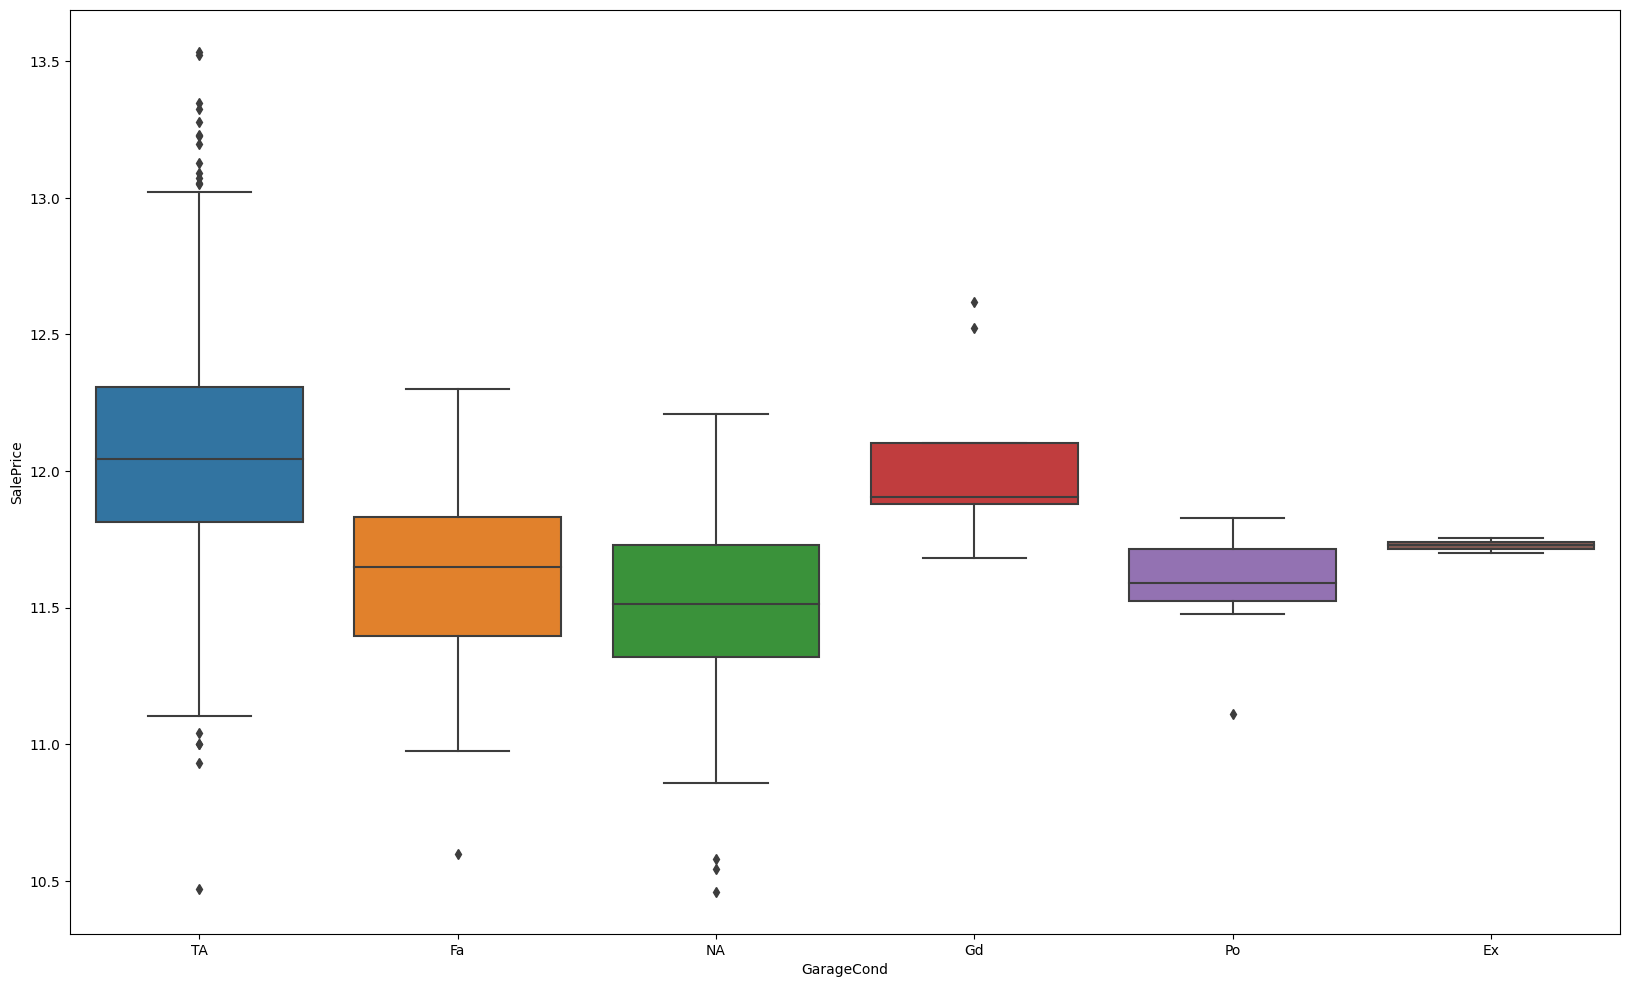

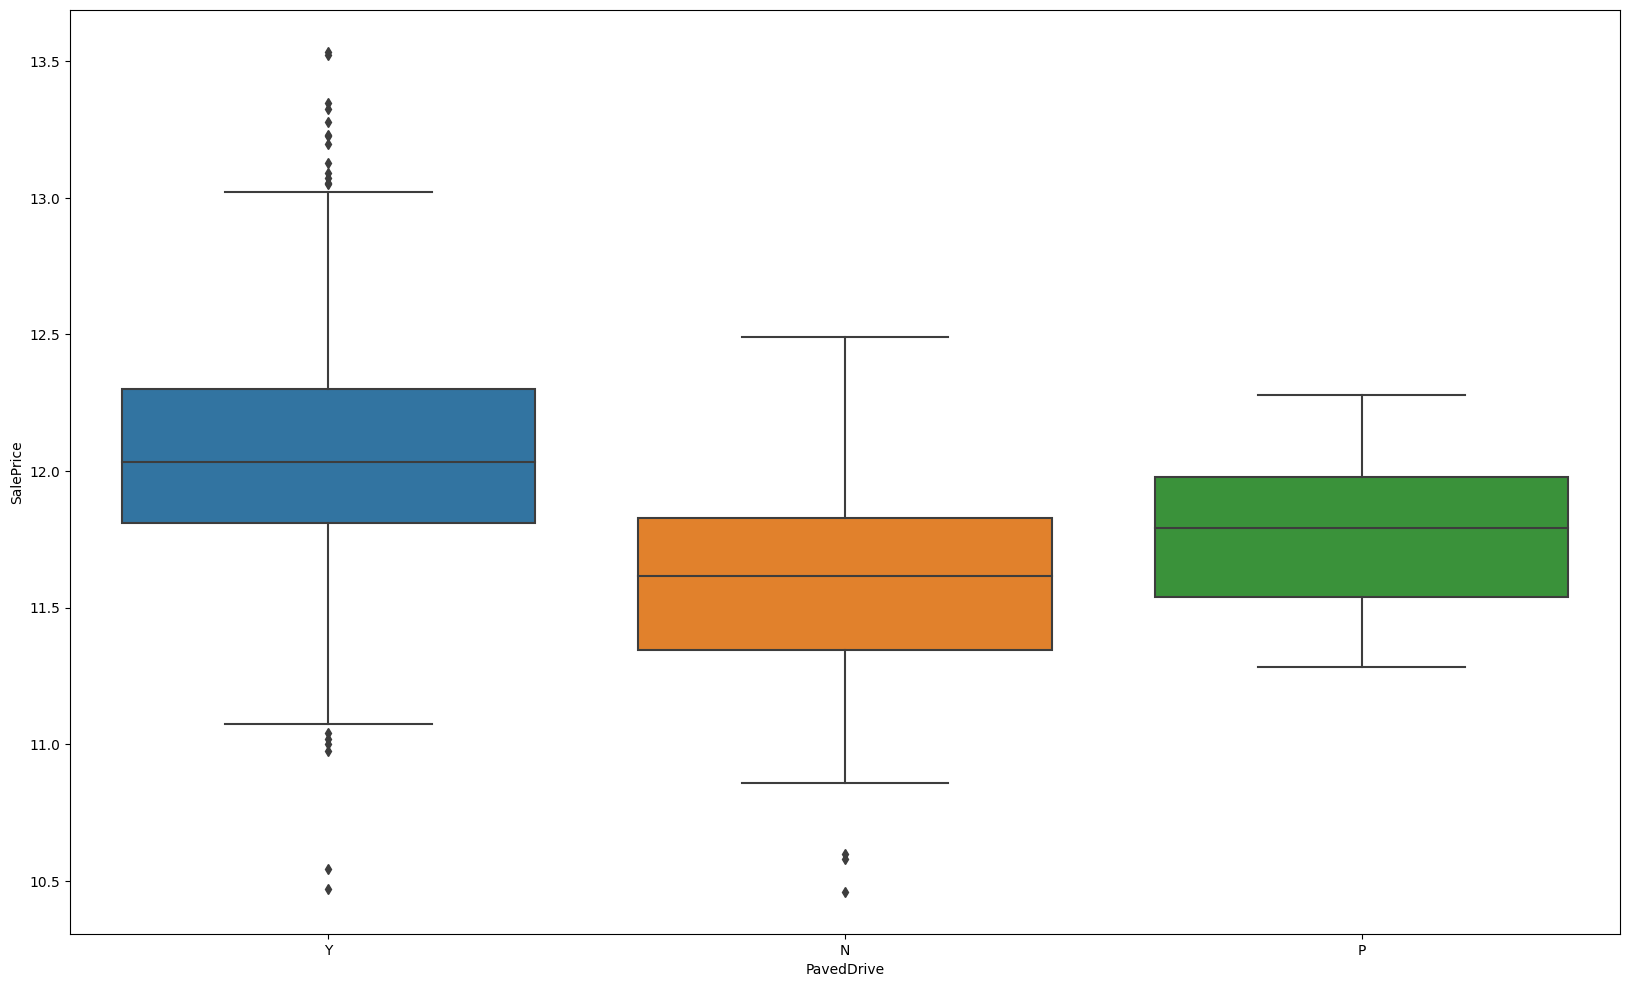

In [35]:
categorical_columns = list(data.select_dtypes(include='object').columns)
for col in categorical_columns:
    plt.figure(figsize=(20, 12))
    sns.boxplot(x =col, y ='SalePrice', data = data)

### The following inferences can be drawn from the box plots.
- MSZoning FV has a higher price that others.
- Pavements fetch higher price.
- Moderately irregular plots tend to sell higher.
- Utilities has one box plot. Can be considered for dropping.
- Single family buildings tend to be higher priced.
- 2 storied house tend to be higher priced.
- Excellent exterier quality fetches higher price.
- Much of the houses have stone foundation.
- Excellent quality basement material fetched higher price.
- Presence of central air is a value add to the house.
- Excellent kitchen quality is higher prices.

In [36]:
# dropping utilities
data.drop(['Utilities'],axis=1,inplace=True)
data.shape

(1460, 61)

In [37]:
categorical_columns = list(data.select_dtypes(include='object').columns)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [38]:
cat_data = data.select_dtypes(include=['object'])
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageYrBlt', 'GarageQual', 'GarageCond', 'PavedDrive'],
      dtype='object')

In [39]:
cat_data = pd.get_dummies(cat_data,drop_first=True)  # Dummy variables
cat_data.shape

(1460, 227)

In [40]:
data = pd.concat([data, cat_data], axis=1) 
data.shape

(1460, 288)

In [41]:
# drop categorical columns
print(len(categorical_columns))

24


In [42]:
data.drop(categorical_columns,axis=1,inplace=True)
data.shape

(1460, 264)

In [43]:
# checkinf for any more redundant columns
list(data.columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 

### 'YearBuilt','YearRemodAdd', YrSold, MoSold all GarageYrBlt can be dropped

In [44]:
data.drop(['YearBuilt','YearRemodAdd', 'YrSold', 'MoSold'],axis=1,inplace=True)
data.shape

(1460, 260)

In [45]:
garage_blt_columns = [ name for name in data.columns if 'GarageYrBlt' in name ]
garage_blt_columns

['GarageYrBlt_1906.0',
 'GarageYrBlt_1908.0',
 'GarageYrBlt_1910.0',
 'GarageYrBlt_1914.0',
 'GarageYrBlt_1915.0',
 'GarageYrBlt_1916.0',
 'GarageYrBlt_1918.0',
 'GarageYrBlt_1920.0',
 'GarageYrBlt_1921.0',
 'GarageYrBlt_1922.0',
 'GarageYrBlt_1923.0',
 'GarageYrBlt_1924.0',
 'GarageYrBlt_1925.0',
 'GarageYrBlt_1926.0',
 'GarageYrBlt_1927.0',
 'GarageYrBlt_1928.0',
 'GarageYrBlt_1929.0',
 'GarageYrBlt_1930.0',
 'GarageYrBlt_1931.0',
 'GarageYrBlt_1932.0',
 'GarageYrBlt_1933.0',
 'GarageYrBlt_1934.0',
 'GarageYrBlt_1935.0',
 'GarageYrBlt_1936.0',
 'GarageYrBlt_1937.0',
 'GarageYrBlt_1938.0',
 'GarageYrBlt_1939.0',
 'GarageYrBlt_1940.0',
 'GarageYrBlt_1941.0',
 'GarageYrBlt_1942.0',
 'GarageYrBlt_1945.0',
 'GarageYrBlt_1946.0',
 'GarageYrBlt_1947.0',
 'GarageYrBlt_1948.0',
 'GarageYrBlt_1949.0',
 'GarageYrBlt_1950.0',
 'GarageYrBlt_1951.0',
 'GarageYrBlt_1952.0',
 'GarageYrBlt_1953.0',
 'GarageYrBlt_1954.0',
 'GarageYrBlt_1955.0',
 'GarageYrBlt_1956.0',
 'GarageYrBlt_1957.0',
 'GarageYrB

In [46]:
print(len(garage_blt_columns))
data.drop(garage_blt_columns,axis=1,inplace=True)
data.shape

97


(1460, 163)

## Data is now cleaned of missing values and features are created

## Outlier treatement for numerical columns

<AxesSubplot:>

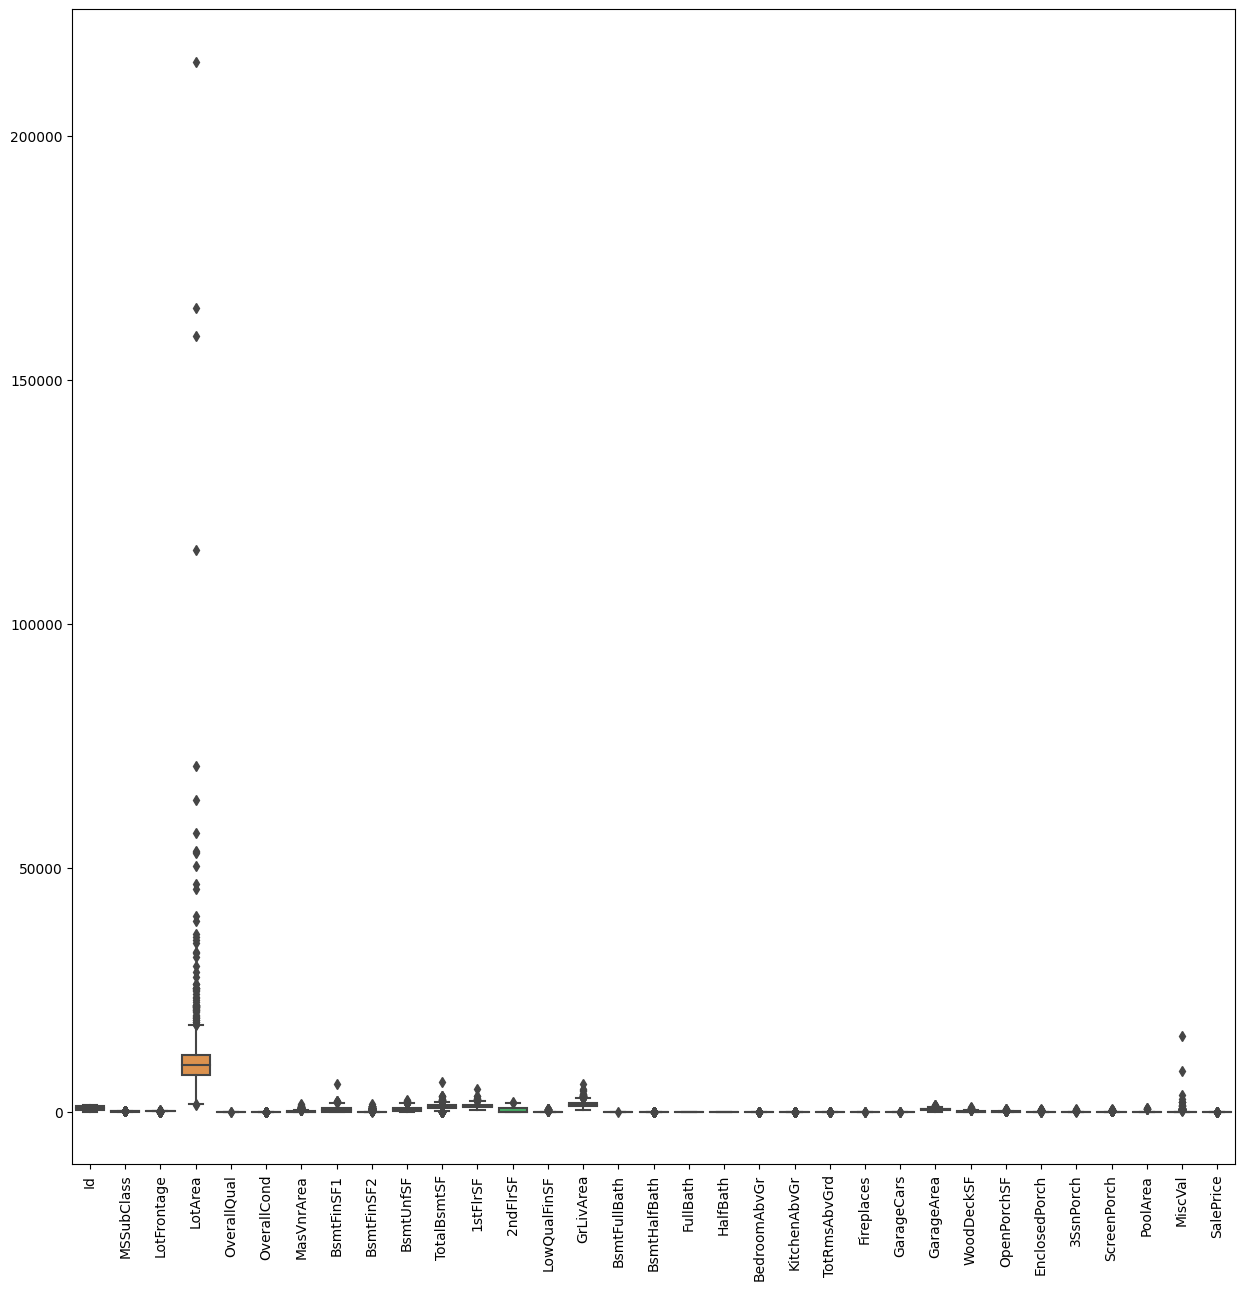

In [47]:
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data[numeric_columns])

<AxesSubplot:>

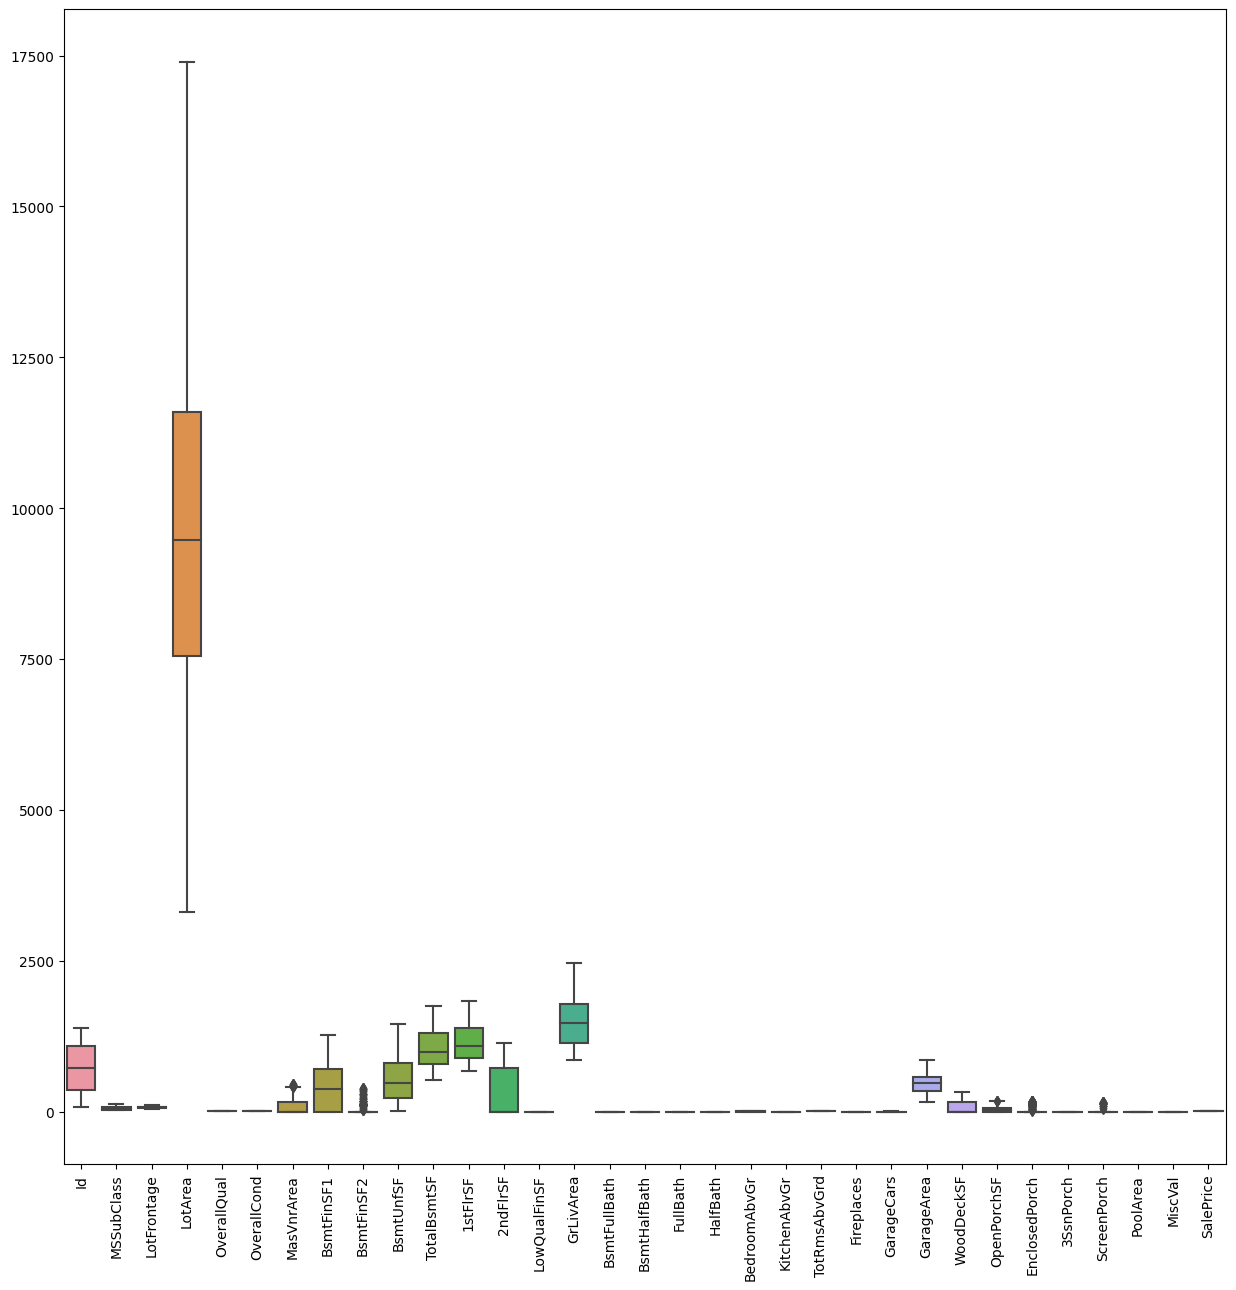

In [48]:
# cap outlier to > 10% and < 90%

for col in numeric_columns:
    data[col][data[col] <= data[col].quantile(0.05)] = data[col].quantile(0.1)
    data[col][data[col] >= data[col].quantile(0.95)] = data[col].quantile(0.9)

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data[numeric_columns])

#### Outliers have been successfully removed.

<AxesSubplot:>

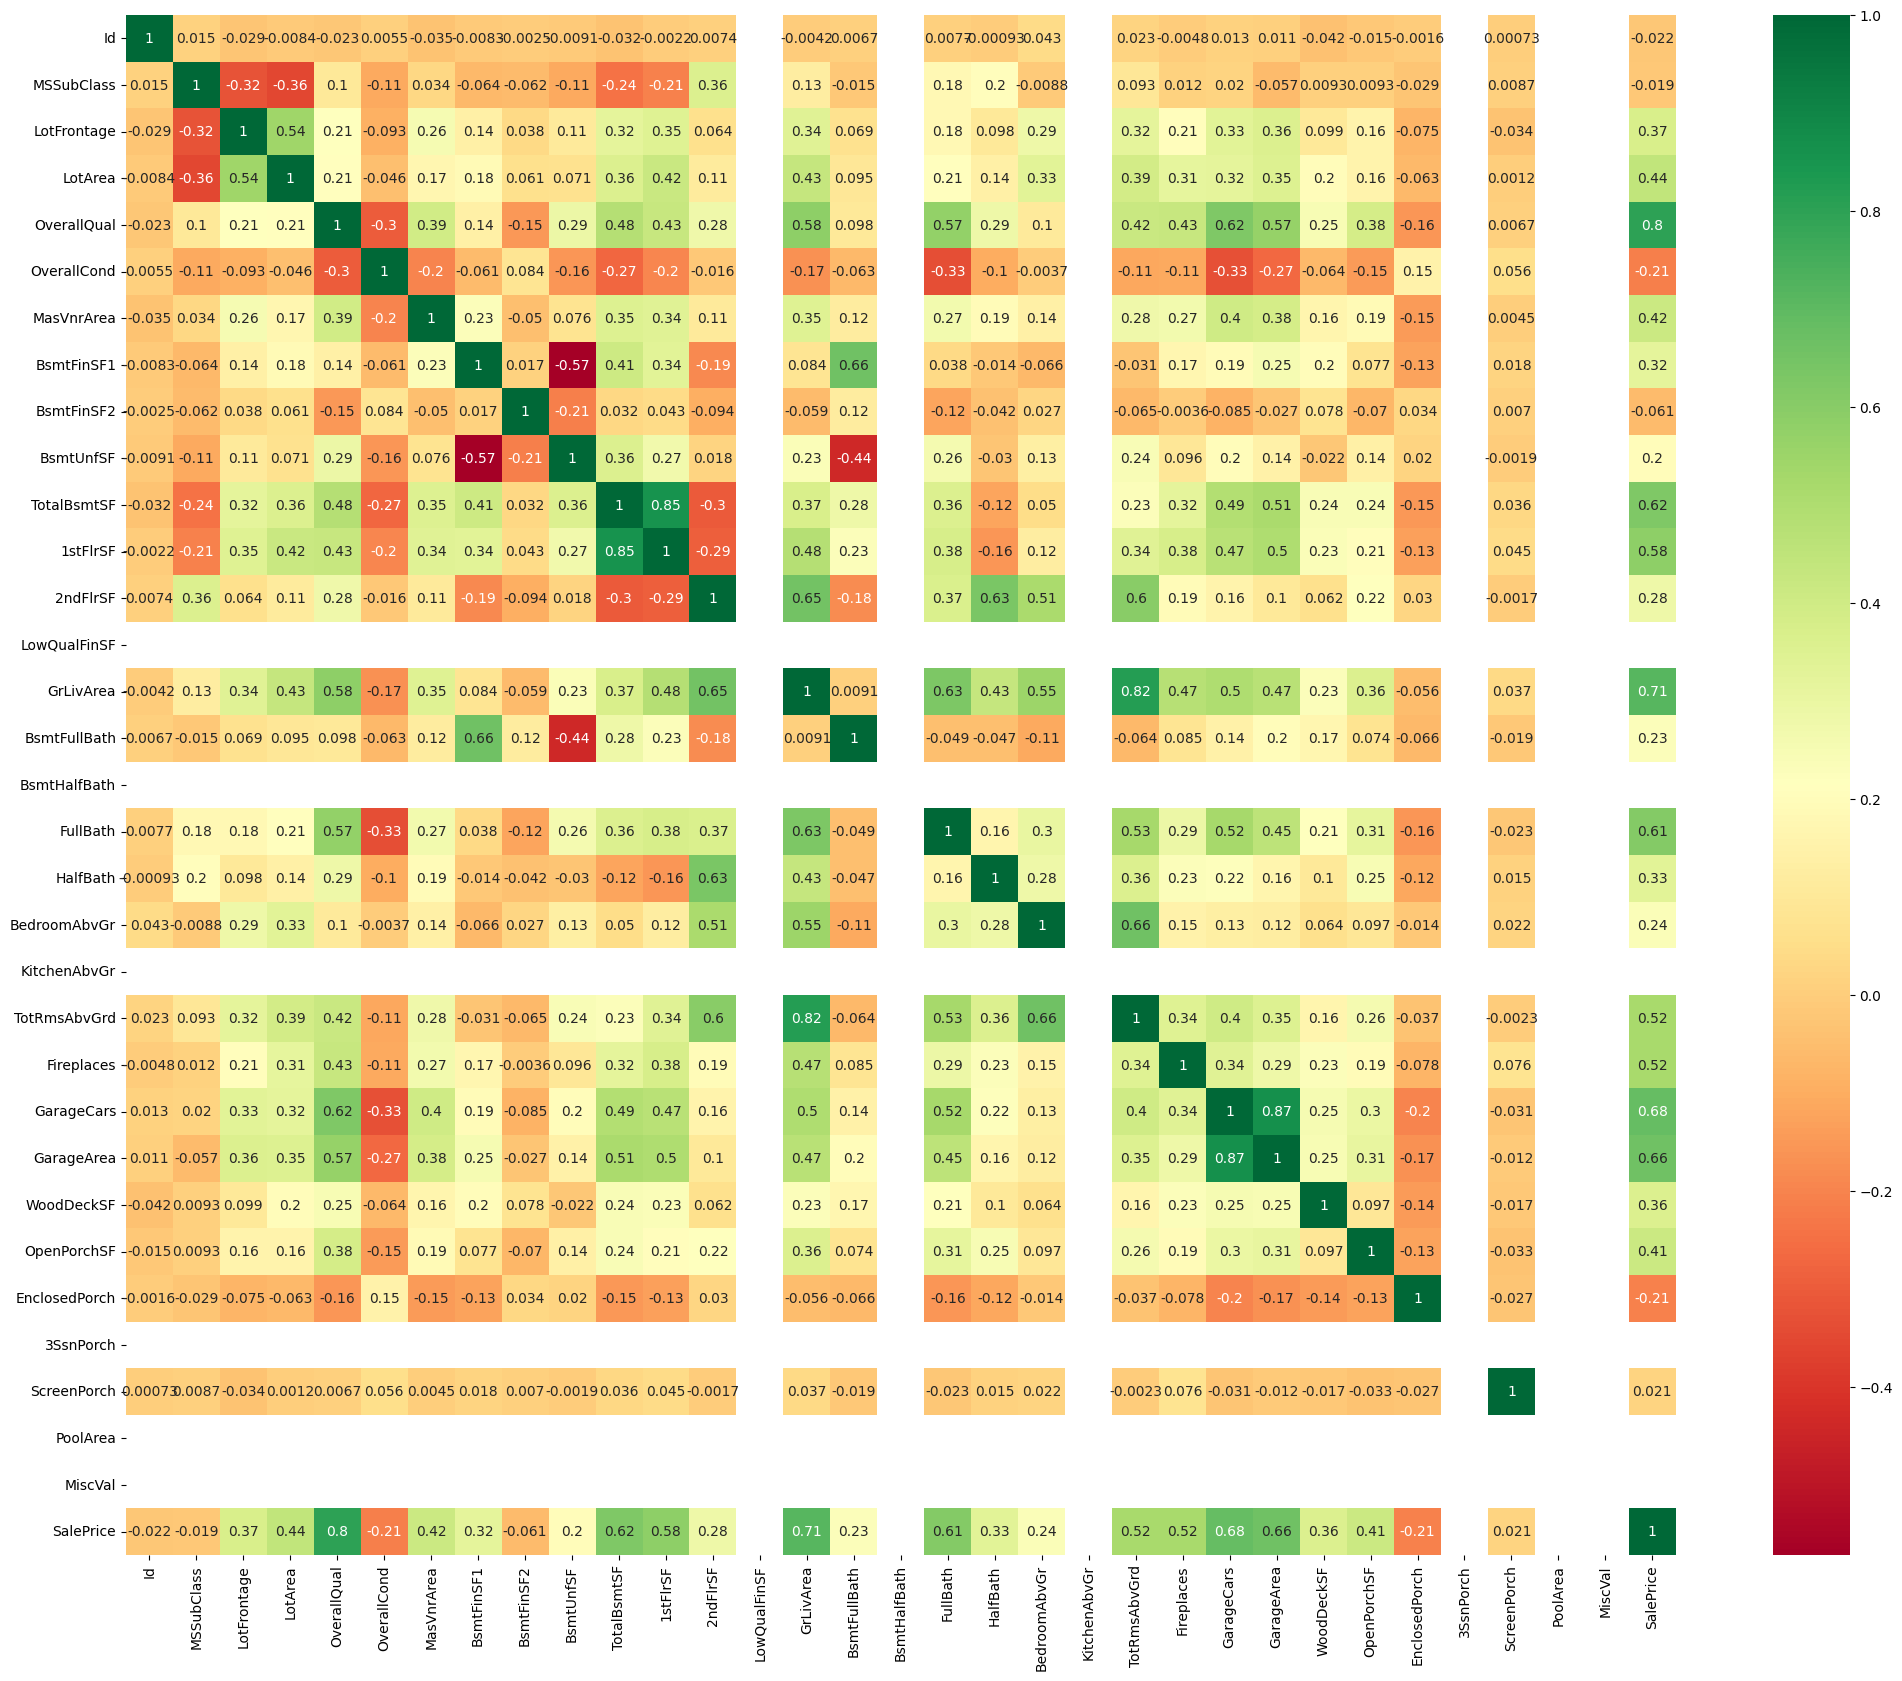

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='RdYlGn')

In [50]:
data.drop(['MiscVal', 'PoolArea', '3SsnPorch', 'KitchenAbvGr', 'LowQualFinSF', 'BsmtHalfBath'],axis=1,inplace=True)
data.shape


(1460, 157)

<AxesSubplot:>

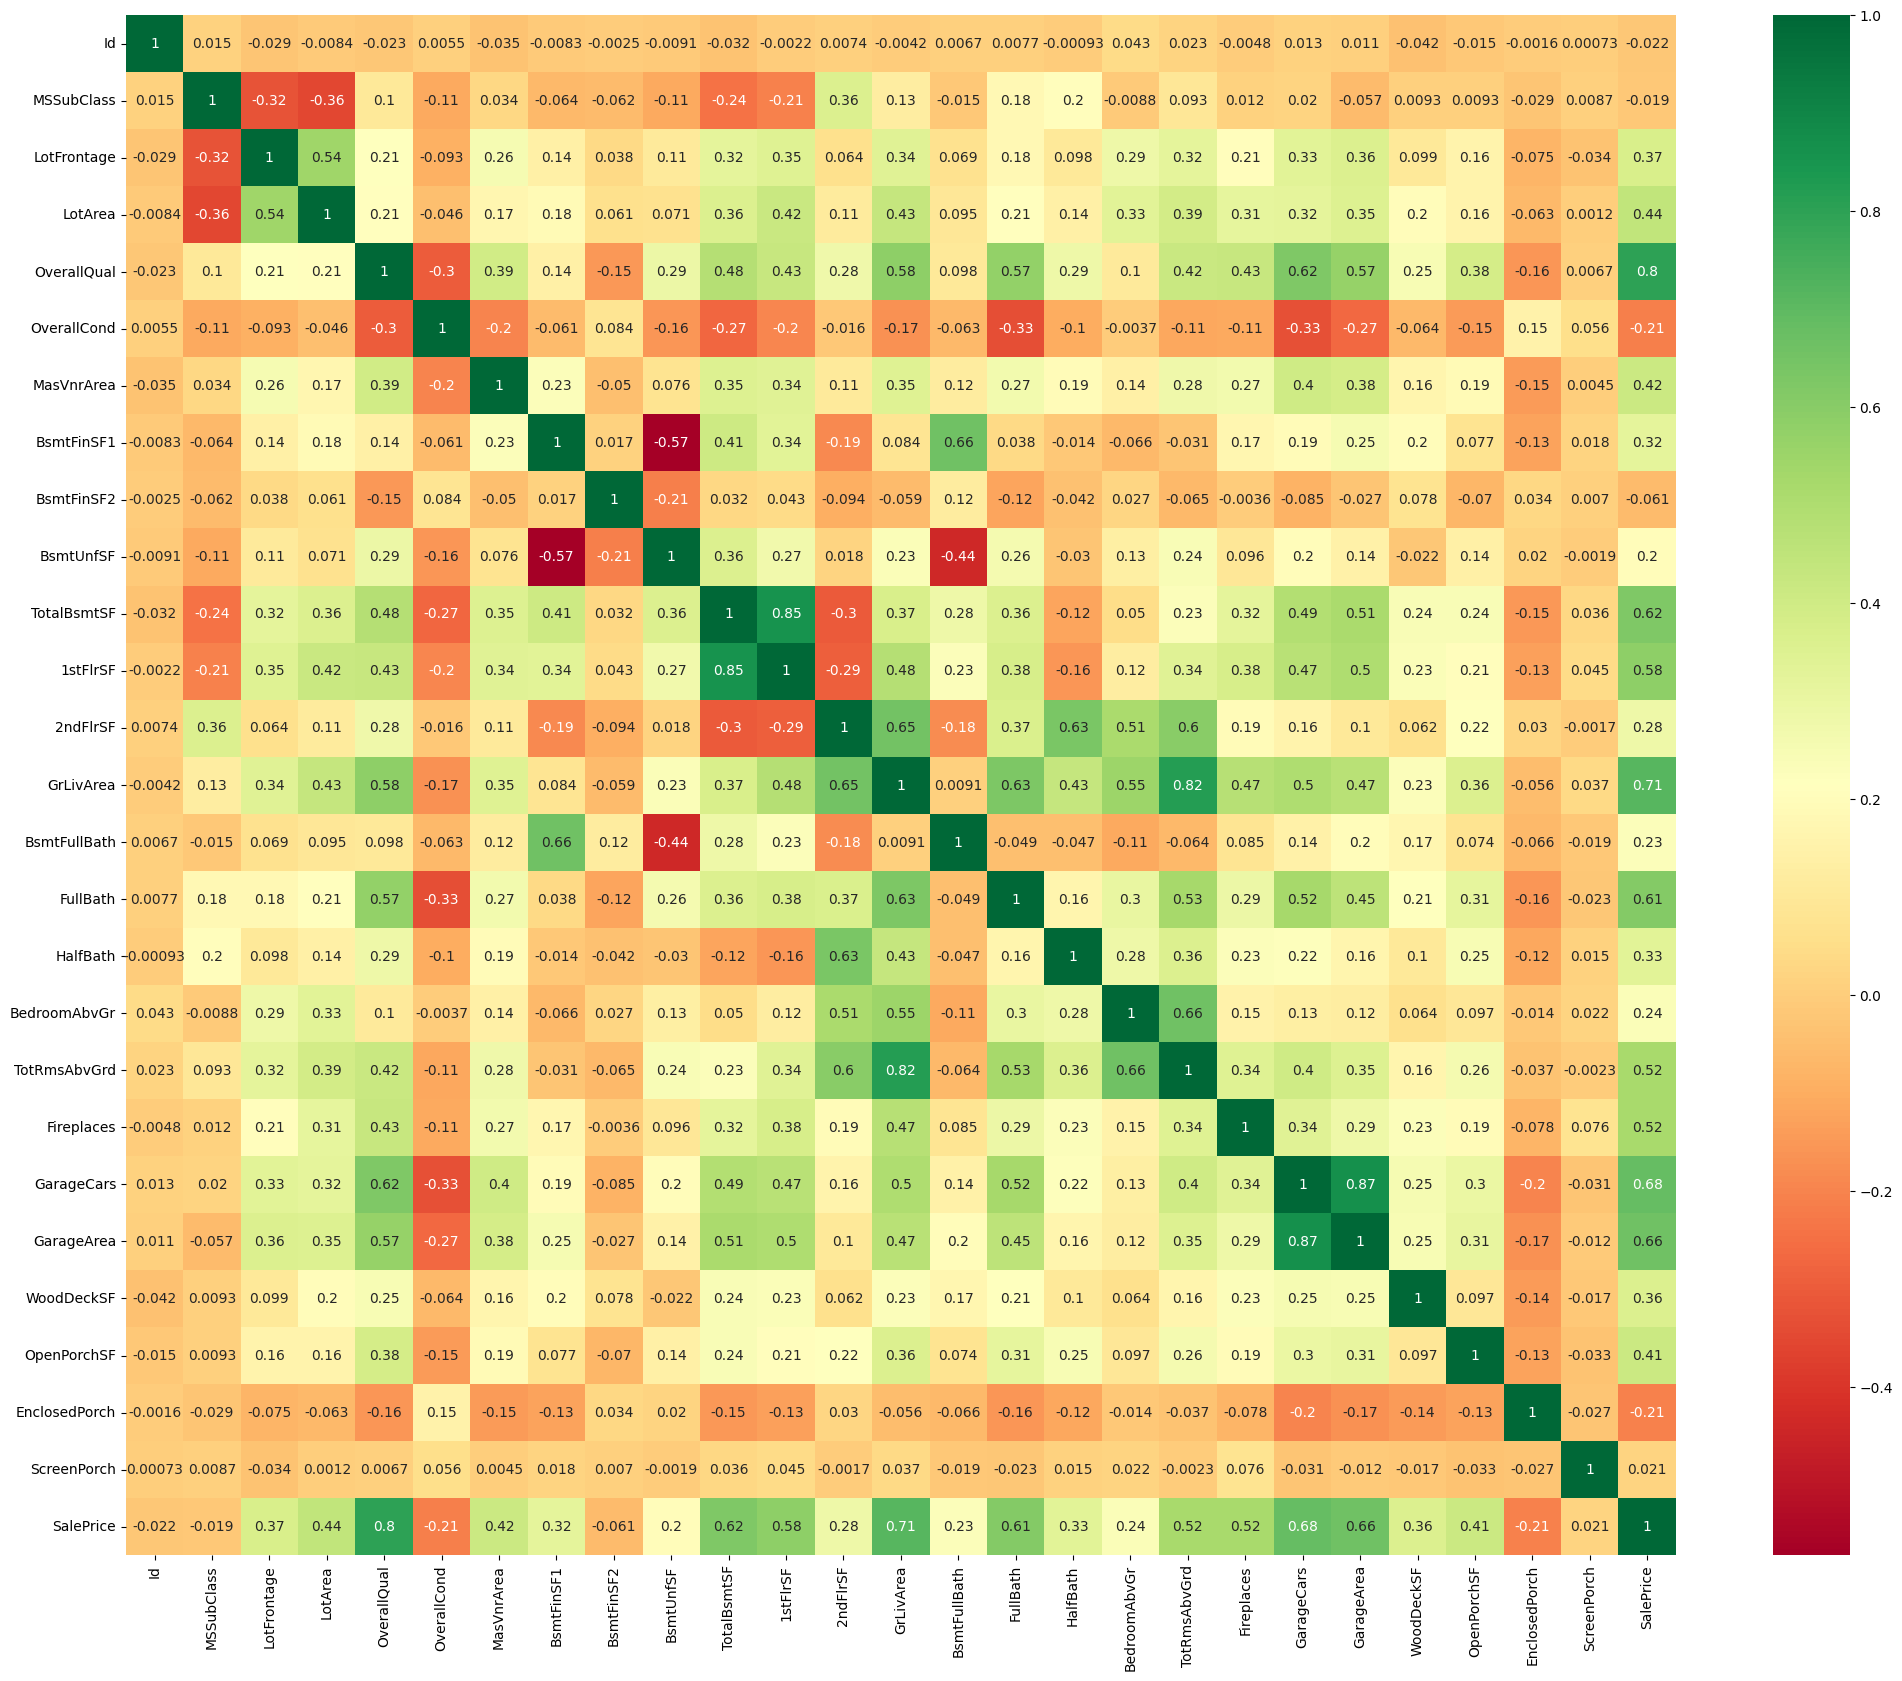

In [51]:
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns
plt.figure(figsize=(25,20))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='RdYlGn')

In [52]:
# data split

X = data.drop(['SalePrice', 'Id'], axis=1)
X.shape

(1460, 155)

In [53]:
y = data['SalePrice']

In [54]:
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns.remove('Id')
numeric_columns.remove('SalePrice')

# scale input
scaler = StandardScaler()

X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


In [55]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [56]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    metric = []
    
    ## R-squared of train and test data
    metric.append(r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)  

    return metric

# Model building(Linear Regression)

In [57]:
lm = LinearRegression()

lm.fit(X_train, y_train)

print('linear regression intercept => ', lm.intercept_)
print('linear regression coefficients => ', lm.coef_)

linear regression intercept =>  12.300134175338581
linear regression coefficients =>  [ 8.67766350e-03  1.83651378e-02  2.02068448e-02  6.25100579e-02
  3.43715086e-02  3.85822577e-02 -5.17060010e-02 -2.11985532e-02
 -4.78049148e-02  1.42286986e-01 -5.81667159e-02 -1.50547653e-02
  9.39101968e-02  1.43743563e-02  5.82609874e-03  2.67489461e-03
 -5.09614608e-03  1.04273998e-02  1.34348586e-02  1.79015803e-02
  1.12768543e-02  1.18805606e-02  2.46966090e-03 -1.89015646e-03
  6.50102812e-03 -1.04847180e-02  1.39757548e-01  4.44892825e-02
  3.28205348e-02 -1.35311413e-01  6.22737271e-02 -1.19694820e-01
  2.03843724e-02  7.02096255e-02 -8.27998851e-02  3.07787078e-02
 -1.42077638e-05 -3.34761775e-01 -3.78035716e-01 -2.45804334e-01
 -7.80245667e-02 -1.75874076e-01 -1.28210444e-01 -3.64804347e-01
 -1.35638647e-01 -2.01136998e-01 -3.40149277e-01 -2.75521747e-01
 -3.10550300e-01 -3.40767080e-01 -1.82986580e-01 -2.12635242e-01
 -1.68048899e-01 -3.24529221e-01 -2.01945472e-01 -2.87921617e-01
 -1.

In [58]:
# training data model performance evaluation

y_pred_train = lm.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = mse ** 0.5

print("Training data metrics for linear model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for linear model are 
r2 =>  0.8486555983694614
mse =>  0.01592601811879751
rmse =>  0.1261983285103155


In [59]:
# test data model performance evaluation

y_pred_test = lm.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print("Training data metrics for linear model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for linear model are 
r2 =>  -5.120890068708678e+23
mse =>  5.2085558612471834e+22
rmse =>  228222607584.06876


### Huge difference in metrics values between train and test models

# Model Building(Ridge)

In [60]:
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1
)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# getting best hyperparameter
model_cv.best_params_

{'alpha': 10.0}

In [62]:
# performing ridge with hyperparameter value 100

ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train, y_train)

Ridge(alpha=10)

In [63]:
# evaluating ridge 100 model on training data
y_pred_train_ridge = ridge_10.predict(X_train)

r2 = r2_score(y_train, y_pred_train_ridge)
mse = mean_squared_error(y_train, y_pred_train_ridge)
rmse = mse ** 0.5

print("Training data metrics for ridge model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for ridge model are 
r2 =>  0.916641157319534
mse =>  0.00877187675651169
rmse =>  0.09365829785188118


In [64]:
# evaluating ridge 100 model on test data
y_pred_test_ridge = ridge_10.predict(X_test)

r2 = r2_score(y_test, y_pred_test_ridge)
mse = mean_squared_error(y_test, y_pred_test_ridge)
rmse = mse ** 0.5

print("Test data metrics for ridge model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Test data metrics for ridge model are 
r2 =>  0.8788351175793362
mse =>  0.012323913422117569
rmse =>  0.11101312274734716


In [65]:
ridge_metrics = show_metrics(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)
ridge_metrics

[0.916641157319534,
 0.8788351175793362,
 8.956086168398436,
 5.3978740788874955,
 0.00877187675651169,
 0.012323913422117569,
 0.09365829785188118,
 0.11101312274734716]

# Model building(Lasso)

In [66]:
lasso = Lasso()
model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1
)

In [67]:
# finding best lambda
model_cv.fit(X_train, y_train)
model_cv.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.001}

In [68]:
# performing lasso with hyperparameter value 0.001

lasso_point_zero_one = Lasso(alpha=0.001)
lasso_point_zero_one.fit(X_train, y_train)

Lasso(alpha=0.001)

In [69]:
# evaluating lasso 100 model on training data
y_pred_train_lasso = lasso_point_zero_one.predict(X_train)

r2 = r2_score(y_train, y_pred_train_lasso)
mse = mean_squared_error(y_train, y_pred_train_lasso)
rmse = mse ** 0.5

print("Training data metrics for lasso model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for lasso model are 
r2 =>  0.9050808980402643
mse =>  0.009988366410282258
rmse =>  0.09994181512401232


In [70]:
# evaluating lasso 100 model on test data
y_pred_test_lasso = lasso_point_zero_one.predict(X_test)

r2 = r2_score(y_test, y_pred_test_lasso)
mse = mean_squared_error(y_test, y_pred_test_lasso)
rmse = mse ** 0.5

print("Test data metrics for lasso model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Test data metrics for lasso model are 
r2 =>  0.8738159627394089
mse =>  0.012834421322292096
rmse =>  0.11328910504674355


In [71]:
lasso_metrics = show_metrics(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)
lasso_metrics

[0.9050808980402643,
 0.8738159627394089,
 10.198122104898186,
 5.621476539163938,
 0.009988366410282258,
 0.012834421322292096,
 0.09994181512401232,
 0.11328910504674355]

## Printing Ridge parameters

In [72]:
# Ridge model parameters
ridge_model_parameters = list(sorted(ridge_10.coef_))
ridge_model_parameters.insert(0, ridge_10.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('constant', 12.002),
 ('MSSubClass', -0.06),
 ('LotFrontage', -0.053),
 ('LotArea', -0.052),
 ('OverallQual', -0.04),
 ('OverallCond', -0.036),
 ('MasVnrArea', -0.036),
 ('BsmtFinSF1', -0.035),
 ('BsmtFinSF2', -0.035),
 ('BsmtUnfSF', -0.035),
 ('TotalBsmtSF', -0.033),
 ('1stFlrSF', -0.032),
 ('2ndFlrSF', -0.03),
 ('GrLivArea', -0.03),
 ('BsmtFullBath', -0.03),
 ('FullBath', -0.029),
 ('HalfBath', -0.024),
 ('BedroomAbvGr', -0.024),
 ('TotRmsAbvGrd', -0.024),
 ('Fireplaces', -0.023),
 ('GarageCars', -0.023),
 ('GarageArea', -0.021),
 ('WoodDeckSF', -0.021),
 ('OpenPorchSF', -0.02),
 ('EnclosedPorch', -0.02),
 ('ScreenPorch', -0.02),
 ('MSZoning_FV', -0.019),
 ('MSZoning_RH', -0.019),
 ('MSZoning_RL', -0.018),
 ('MSZoning_RM', -0.018),
 ('Street_Pave', -0.018),
 ('LotShape_IR2', -0.017),
 ('LotShape_IR3', -0.016),
 ('LotShape_Reg', -0.014),
 ('LotConfig_CulDSac', -0.014),
 ('LotConfig_FR2', -0.014),
 ('LotConfig_FR3', -0.014),
 ('LotConfig_Inside', -0.013),
 ('Neighborhood_Blueste', -0

## Printing Lasso corfficients

In [73]:
# lasso model parameters
lasso_model_parameters = list(sorted(lasso_point_zero_one.coef_))
lasso_model_parameters.insert(0, lasso_point_zero_one.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, lasso_model_parameters)))

[('constant', 11.985),
 ('MSSubClass', -0.046),
 ('LotFrontage', -0.045),
 ('LotArea', -0.042),
 ('OverallQual', -0.038),
 ('OverallCond', -0.028),
 ('MasVnrArea', -0.016),
 ('BsmtFinSF1', -0.015),
 ('BsmtFinSF2', -0.014),
 ('BsmtUnfSF', -0.012),
 ('TotalBsmtSF', -0.011),
 ('1stFlrSF', -0.011),
 ('2ndFlrSF', -0.01),
 ('GrLivArea', -0.009),
 ('BsmtFullBath', -0.009),
 ('FullBath', -0.007),
 ('HalfBath', -0.005),
 ('BedroomAbvGr', -0.005),
 ('TotRmsAbvGrd', -0.003),
 ('Fireplaces', -0.002),
 ('GarageCars', -0.002),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', -0.0),

### Compiling metrics into single dataframe

In [74]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.916641          0.905081
R2 Score (Test)           0.878835          0.873816
RSS (Train)               8.956086         10.198122
RSS (Test)                5.397874          5.621477
MSE (Train)               0.008772          0.009988
MSE (Test)                0.012324          0.012834
RMSE (Train)              0.093658          0.099942
RMSE (Test)               0.111013          0.113289

## Showing betas for both models


In [75]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge_10.coef_
betas['Lasso'] = lasso_point_zero_one.coef_

In [76]:
betas.head(15)

Ridge     Lasso
MSSubClass   -0.008875 -0.010097
LotFrontage   0.007648  0.007437
LotArea       0.014707  0.015189
OverallQual   0.070901  0.081509
OverallCond   0.036706  0.036049
MasVnrArea    0.002310  0.002262
BsmtFinSF1    0.003561  0.014271
BsmtFinSF2   -0.003160  0.000000
BsmtUnfSF    -0.014279 -0.007141
TotalBsmtSF   0.065205  0.062499
1stFlrSF     -0.003310 -0.000000
2ndFlrSF      0.022966  0.006235
GrLivArea     0.069532  0.069698
BsmtFullBath  0.010587  0.012137
FullBath      0.017805  0.016933

### We see Lasso has removed some features. Listing them below

In [77]:
betas[betas['Lasso']==0]

Ridge  Lasso
BsmtFinSF2           -0.003160    0.0
1stFlrSF             -0.003310   -0.0
BedroomAbvGr          0.002900    0.0
TotRmsAbvGrd         -0.000284   -0.0
MSZoning_FV           0.025933    0.0
MSZoning_RH           0.023428    0.0
MSZoning_RL           0.014813    0.0
Street_Pave          -0.017576   -0.0
LotShape_IR2          0.014515    0.0
LotShape_IR3         -0.011007   -0.0
LotConfig_FR2        -0.022714   -0.0
LotConfig_FR3        -0.004206   -0.0
LotConfig_Inside      0.006683    0.0
Neighborhood_Blueste  0.003750    0.0
Neighborhood_BrDale  -0.036439   -0.0
Neighborhood_BrkSide  0.003700   -0.0
Neighborhood_CollgCr -0.002427    0.0
Neighborhood_IDOTRR  -0.016479   -0.0
Neighborhood_MeadowV -0.033354   -0.0
Neighborhood_Mitchel -0.006936    0.0
Neighborhood_NPkVill -0.013654   -0.0
Neighborhood_NWAmes  -0.021271   -0.0
Neighborhood_NoRidge -0.004015   -0.0
Neighborhood_SWISU   -0.018186   -0.0
Neighborhood_SawyerW -0.001097   -0.0
Neighborhood_StoneBr  0.024296    0.0
Neighborhood_Timber   0.029523    0.0
Neighborhood_Veenker  0.029109    0.0
BldgType_2fmCon      -0.034946   -0.0
HouseStyle_1.5Unf     0.004623   -0.0
HouseStyle_1Story     0.030423    0.0
HouseStyle_2.5Fin     0.014063    0.0
HouseStyle_2.5Unf     0.000512   -0.0
HouseStyle_2Story    -0.001712    0.0
HouseStyle_SFoyer     0.025875    0.0
HouseStyle_SLvl       0.025372    0.0
RoofStyle_Gable      -0.013929   -0.0
RoofStyle_Gambrel     0.001885    0.0
RoofStyle_Hip        -0.014364   -0.0
RoofStyle_Mansard     0.018346    0.0
RoofStyle_Shed        0.005804    0.0
Exterior1st_AsphShn  -0.003535   -0.0
Exterior1st_BrkComm  -0.002872   -0.0
Exterior1st_CBlock   -0.013167   -0.0
Exterior1st_CemntBd   0.004944    0.0
Exterior1st_HdBoard  -0.005699   -0.0
Exterior1st_ImStucc   0.005585    0.0
Exterior1st_MetalSd  -0.003157    0.0
Exterior1st_Plywood  -0.001955   -0.0
Exterior1st_Stone     0.014715    0.0
Exterior1st_Stucco   -0.011599   -0.0
Exterior1st_WdShing  -0.007187   -0.0
Exterior2nd_AsphShn  -0.003535   -0.0
Exterior2nd_Brk Cmn  -0.004996   -0.0
Exterior2nd_BrkFace   0.018429    0.0
Exterior2nd_CBlock   -0.013167   -0.0
Exterior2nd_CmentBd   0.012122    0.0
Exterior2nd_HdBoard  -0.008625   -0.0
Exterior2nd_ImStucc  -0.009423   -0.0
Exterior2nd_MetalSd   0.001239    0.0
Exterior2nd_Other     0.000000    0.0
Exterior2nd_Plywood  -0.005774   -0.0
Exterior2nd_Stone    -0.005665   -0.0
Exterior2nd_Stucco    0.004248   -0.0
Exterior2nd_Wd Sdng   0.019263   -0.0
Exterior2nd_Wd Shng  -0.020214   -0.0
MasVnrType_None       0.008432   -0.0
MasVnrType_Stone      0.017538    0.0
ExterQual_Fa          0.002660   -0.0
ExterQual_TA          0.008151   -0.0
Foundation_CBlock     0.011607    0.0
Foundation_Slab       0.007239   -0.0
Foundation_Stone      0.016665    0.0
Foundation_Wood       0.007433    0.0
BsmtQual_Fa          -0.023470   -0.0
BsmtQual_NA          -0.024451   -0.0
BsmtExposure_Mn      -0.010921   -0.0
BsmtExposure_NA      -0.030159   -0.0
BsmtFinType1_LwQ     -0.030088   -0.0
BsmtFinType1_NA      -0.024451   -0.0
BsmtFinType1_Unf     -0.017944   -0.0
HeatingQC_Fa         -0.003903   -0.0
HeatingQC_Po          0.002315    0.0
Electrical_FuseF     -0.005124   -0.0
Electrical_FuseP      0.021478    0.0
Electrical_Mix        0.000000    0.0
GarageQual_Gd         0.045756    0.0
GarageQual_NA         0.000092   -0.0
GarageQual_Po        -0.008787   -0.0
GarageQual_TA        -0.005781    0.0
GarageCond_Fa        -0.004274   -0.0
GarageCond_Gd        -0.002596    0.0
GarageCond_NA         0.000092   -0.0
GarageCond_Po        -0.019456   -0.0
PavedDrive_P         -0.002071   -0.0
PavedDrive_Y         -0.001325    0.0

In [78]:
betas[betas['Lasso']==0].shape

(96, 2)

### 96 features removed by Lasso

# Inferences

## Analyzing Ridge regression results

In [79]:
# top 10 features in Ridge regression
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.074017
OverallQual             0.070901
GrLivArea               0.069532
TotalBsmtSF             0.065205
Neighborhood_Somerst    0.059821
Neighborhood_NridgHt    0.048137
Neighborhood_ClearCr    0.047903
GarageQual_Gd           0.045756
OverallCond             0.036706
Exterior1st_BrkFace     0.031979
Name: Ridge, dtype: float64

In [80]:
# taking inverse log as we had done log transformation on target
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor    1.076825
OverallQual             1.073475
GrLivArea               1.072007
TotalBsmtSF             1.067377
Neighborhood_Somerst    1.061647
Neighborhood_NridgHt    1.049314
Neighborhood_ClearCr    1.049069
GarageQual_Gd           1.046819
OverallCond             1.037388
Exterior1st_BrkFace     1.032496
Name: Ridge, dtype: float64

In [81]:
# repeating above step for Lasso cofficients
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.084923
GrLivArea               1.072185
Neighborhood_Crawfor    1.070568
TotalBsmtSF             1.064493
Neighborhood_Somerst    1.059298
OverallCond             1.036707
Neighborhood_ClearCr    1.034338
GarageArea              1.029328
Foundation_PConc        1.028393
Neighborhood_NridgHt    1.027792
Name: Lasso, dtype: float64

# Play area to answer questions

In [82]:
# performing ridge with hyperparameter value 200

ridge_20 = Ridge(alpha=20)
ridge_20.fit(X_train, y_train)

Ridge(alpha=20)

In [83]:
# evaluating ridge 200 model on training data
y_pred_train_ridge_20 = ridge_20.predict(X_train)

r2 = r2_score(y_train, y_pred_train_ridge_20)
mse = mean_squared_error(y_train, y_pred_train_ridge_20)
rmse = mse ** 0.5

print("Training data metrics for ridge 200 model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for ridge 200 model are 
r2 =>  0.9131817962962839
mse =>  0.009135906385240464
rmse =>  0.09558193545456413


In [84]:
# evaluating ridge 200 model on test data
y_pred_test_ridge_20 = ridge_20.predict(X_test)

r2 = r2_score(y_test, y_pred_test_ridge_20)
mse = mean_squared_error(y_test, y_pred_test_ridge_20)
rmse = mse ** 0.5

print("Test data metrics for ridge 200 model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Test data metrics for ridge 200 model are 
r2 =>  0.8790066351260052
mse =>  0.012306468042290566
rmse =>  0.11093452141822475


In [85]:
ridge_20_metrics = show_metrics(y_train, y_pred_train_ridge_20, y_test, y_pred_test_ridge_20)

In [86]:
# performing lasso with hyperparameter value 0.002

lasso_point_zero_two = Lasso(alpha=0.002)
lasso_point_zero_two.fit(X_train, y_train)

Lasso(alpha=0.002)

In [87]:
# evaluating lasso 200 model on training data
y_pred_train_lasso_200 = lasso_point_zero_two.predict(X_train)

r2 = r2_score(y_train, y_pred_train_lasso_200)
mse = mean_squared_error(y_train, y_pred_train_lasso_200)
rmse = mse ** 0.5

print("Training data metrics for lasso 200 model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Training data metrics for lasso 200 model are 
r2 =>  0.8963192238197976
mse =>  0.010910360094110715
rmse =>  0.10445266915742611


In [88]:
# evaluating lasso 200 model on test data
y_pred_test_lasso_200 = lasso_point_zero_two.predict(X_test)

r2 = r2_score(y_test, y_pred_test_lasso_200)
mse = mean_squared_error(y_test, y_pred_test_lasso_200)
rmse = mse ** 0.5

print("Test data metrics for lasso 200 model are ")
print('r2 => ', r2)
print('mse => ', mse)
print('rmse => ', rmse)

Test data metrics for lasso 200 model are 
r2 =>  0.8684222116034355
mse =>  0.013383030132800445
rmse =>  0.11568504714439307


In [89]:
lasso_200_metrics = show_metrics(y_train, y_pred_train_lasso_200, y_test, y_pred_test_lasso_200)

In [90]:
lr_table_double = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression(double)' : ridge_20_metrics,
            'Ridge 10': ridge_metrics,
            'Lasso Regression(double)' : lasso_200_metrics,            
            'Lasso 0.001': lasso_metrics
        }

final_metric_double = pd.DataFrame(lr_table_double, columns = ['Metric', 'Ridge Regression(double)', 'Lasso Regression(double)', 'Ridge 10', 'Lasso 0.001'] )
final_metric_double.set_index('Metric')

Ridge Regression(double)  Lasso Regression(double)  \
Metric                                                                 
R2 Score (Train)                  0.913182                  0.896319   
R2 Score (Test)                   0.879007                  0.868422   
RSS (Train)                       9.327760                 11.139478   
RSS (Test)                        5.390233                  5.861767   
MSE (Train)                       0.009136                  0.010910   
MSE (Test)                        0.012306                  0.013383   
RMSE (Train)                      0.095582                  0.104453   
RMSE (Test)                       0.110935                  0.115685   

                  Ridge 10  Lasso 0.001  
Metric                                   
R2 Score (Train)  0.916641     0.905081  
R2 Score (Test)   0.878835     0.873816  
RSS (Train)       8.956086    10.198122  
RSS (Test)        5.397874     5.621477  
MSE (Train)       0.008772     0.009988  
MSE (Test)        0.012324     0.012834  
RMSE (Train)      0.093658     0.099942  
RMSE (Test)       0.111013     0.113289

In [91]:
betas_double = pd.DataFrame(index=X.columns)
betas_double.rows = X.columns
betas_double['Ridge'] = ridge_20.coef_
betas_double['Lasso'] = lasso_point_zero_two.coef_

In [92]:
ridge_double_coeffs = np.exp(betas_double['Ridge'])
ridge_double_coeffs.sort_values(ascending=False)[:10]
list(ridge_double_coeffs.sort_values(ascending=False).index[:5])

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst']

In [93]:
lasso_double_coeffs = np.exp(betas_double['Lasso'])
lasso_double_coeffs.sort_values(ascending=False)[:10]
list(lasso_double_coeffs.sort_values(ascending=False).index[:5])

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'Foundation_PConc']

In [94]:
# top 5 predictors of lasso 100 model

list(lasso_coeffs.sort_values(ascending=False).index[:5])

['OverallQual',
 'GrLivArea',
 'Neighborhood_Crawfor',
 'TotalBsmtSF',
 'Neighborhood_Somerst']

In [95]:
top5 = ['OverallQual', 'GrLivArea', 'Neighborhood_Crawfor', 'TotalBsmtSF', 'Neighborhood_Somerst']
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [96]:
lasso = Lasso()
model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1
)

In [97]:
# finding best lambda
model_cv.fit(X_train_dropped, y_train)
model_cv.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.0001}

In [98]:
lasso_3 = Lasso(alpha=0.0001)
lasso_3.fit(X_train_dropped, y_train)

Lasso(alpha=0.0001)

In [99]:
y_train_pred_dropped = lasso_3.predict(X_train_dropped)
y_test_pred_dropped = lasso_3.predict(X_test_dropped)

In [100]:
lasso_metrics_dropped = show_metrics(y_train, y_train_pred_dropped, y_test, y_test_pred_dropped)

In [101]:
betas_dropped = pd.DataFrame(index=X_train_dropped.columns)
betas_dropped.rows = X_train_dropped.columns

In [102]:
betas_dropped['Lasso(dropped)'] = lasso_3.coef_

In [103]:
betas_dropped['Lasso(dropped)'].sort_values(ascending=False)[:5].index

Index(['Electrical_FuseP', 'GarageQual_Gd', 'Exterior1st_Stone', '2ndFlrSF',
       'MasVnrType_Stone'],
      dtype='object')